In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Case Study of Georgia (and Scott Hersey)'s Office

In [ ]:
file = "data/combined_milas_hall/Flo2.3-A2-25.csv"
df = pd.read_csv(file)
df.head()

timestamp     DprPos  FlSpt  HwVlvPos      RmTmp  RmTmpCspt  \
0  2020-10-09 11:15:00  43.195312  594.0       0.0  64.289062  64.625000   
1  2020-10-09 11:30:00  48.929688  476.0       0.0  63.875000  64.921875   
2  2020-10-09 11:45:00  46.132812  561.0       0.0  64.164062  64.695312   
3  2020-10-09 12:00:00  48.757812  675.0       0.0  64.523438  64.375000   
4  2020-10-09 12:15:00  48.656250  601.0       0.0  64.539062  64.835938   

   RmTmpHpst   SaFl  
0  62.625000  530.0  
1  62.921875  652.0  
2  62.695312  536.0  
3  62.375000  598.0  
4  62.835938  596.0

In [ ]:
filtered_df = df[100000:300000]
filtered_df = filtered_df.copy()  # Avoid "Setting with a copy" warning
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df['date'] = filtered_df['timestamp'].dt.date

/var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/ipykernel_9352/4211136822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
/var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/ipykernel_9352/4211136822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['timestamp'].dt.date


/var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/ipykernel_9352/513020329.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


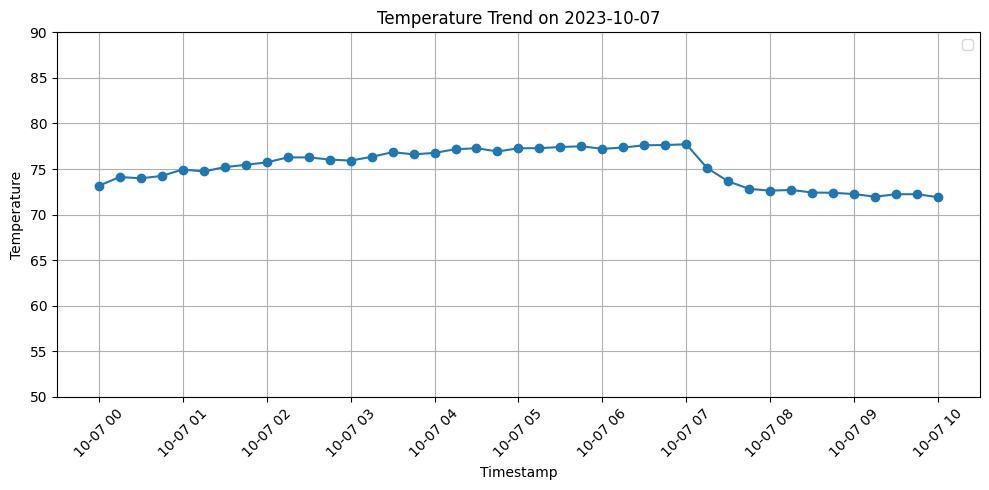

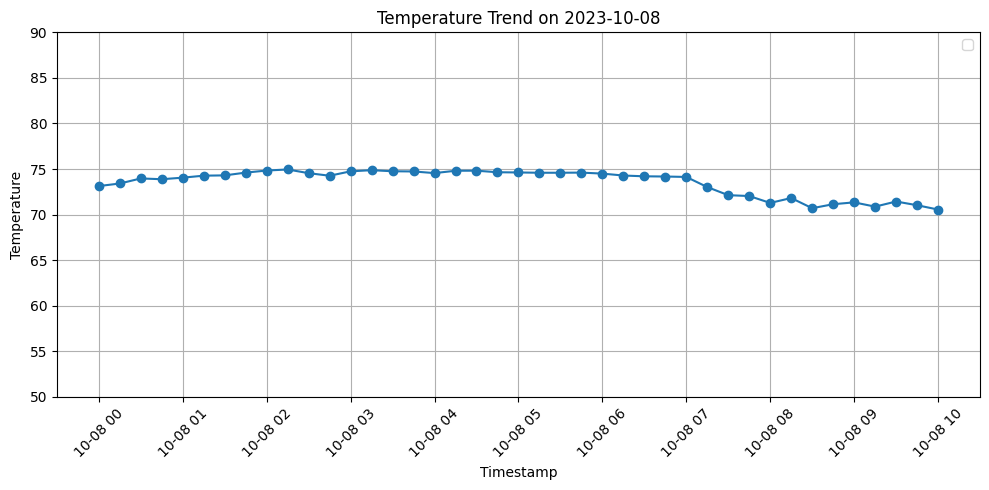

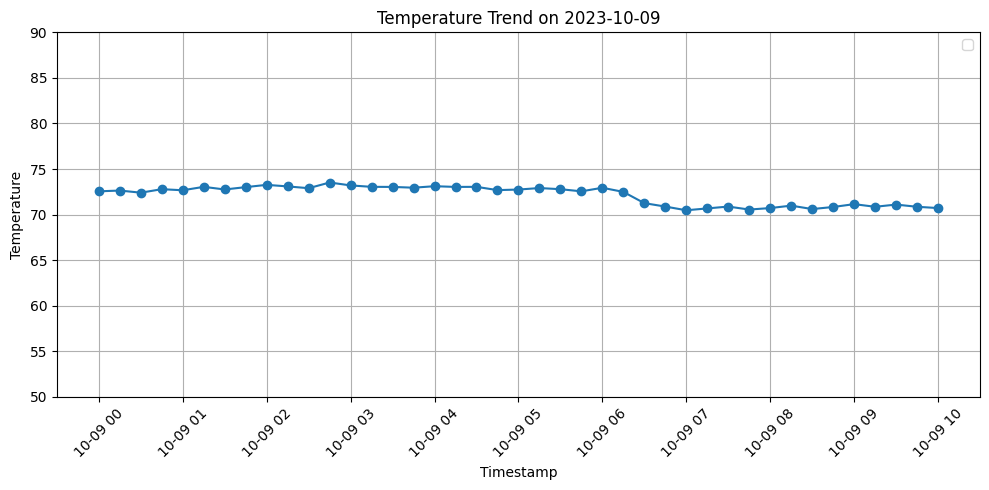

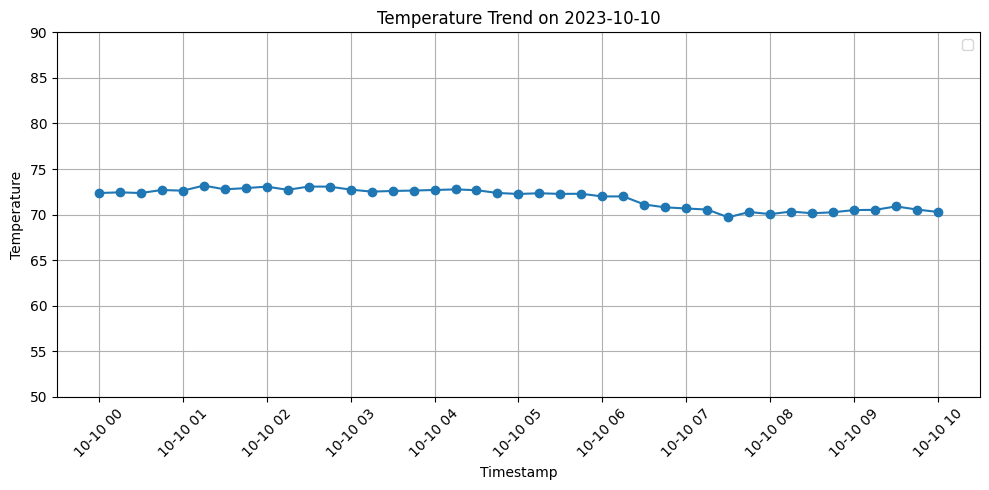

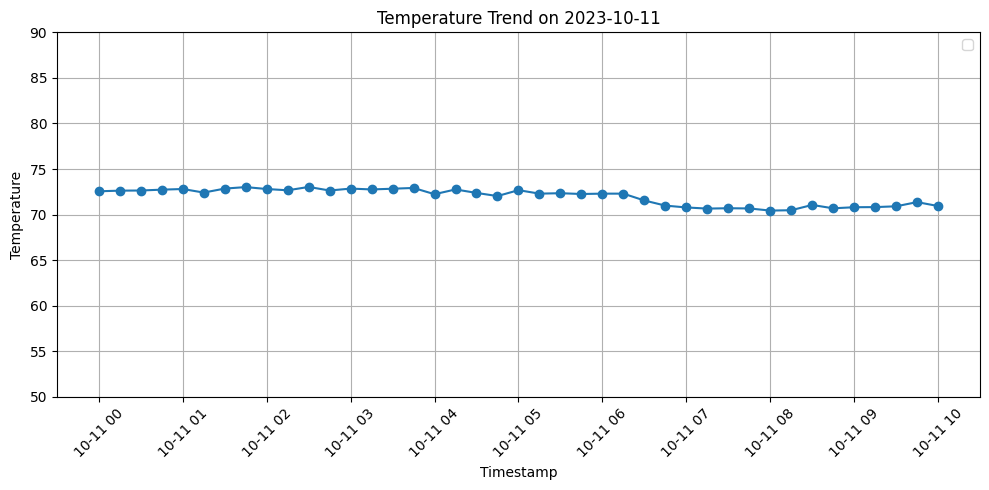

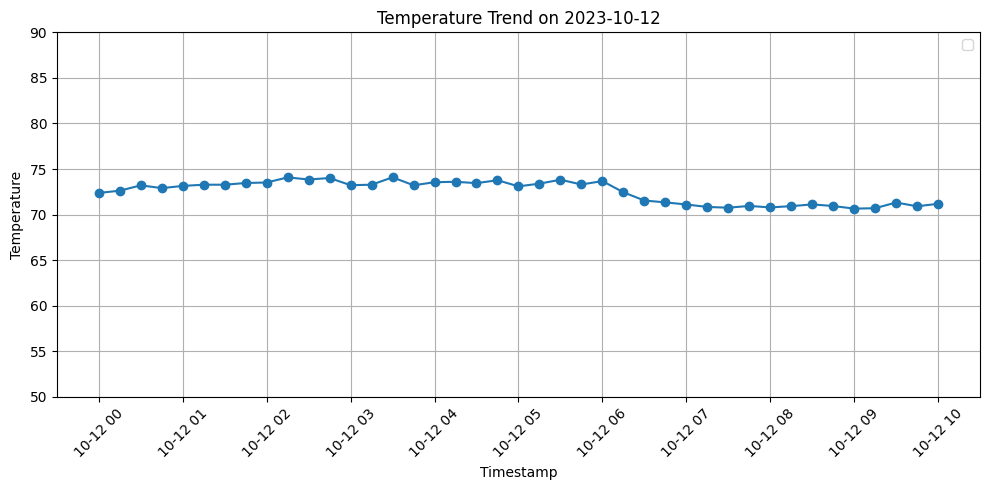

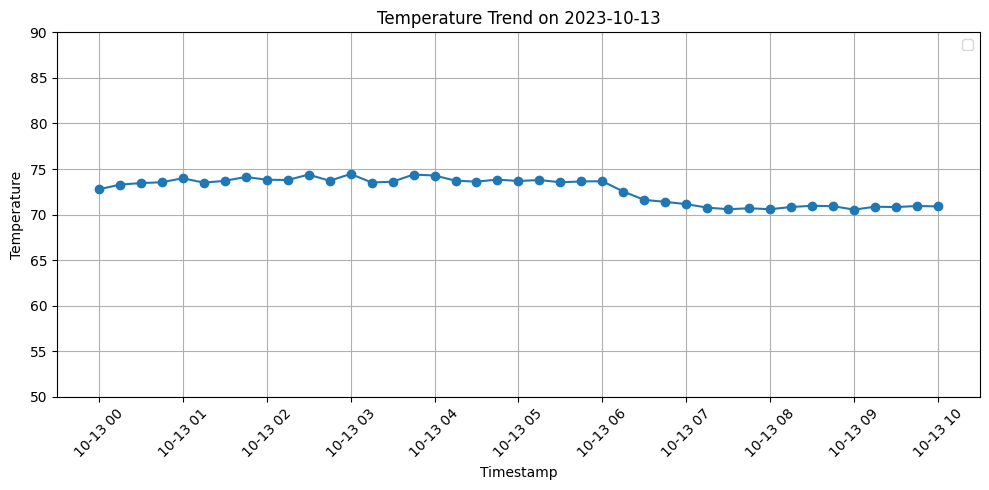

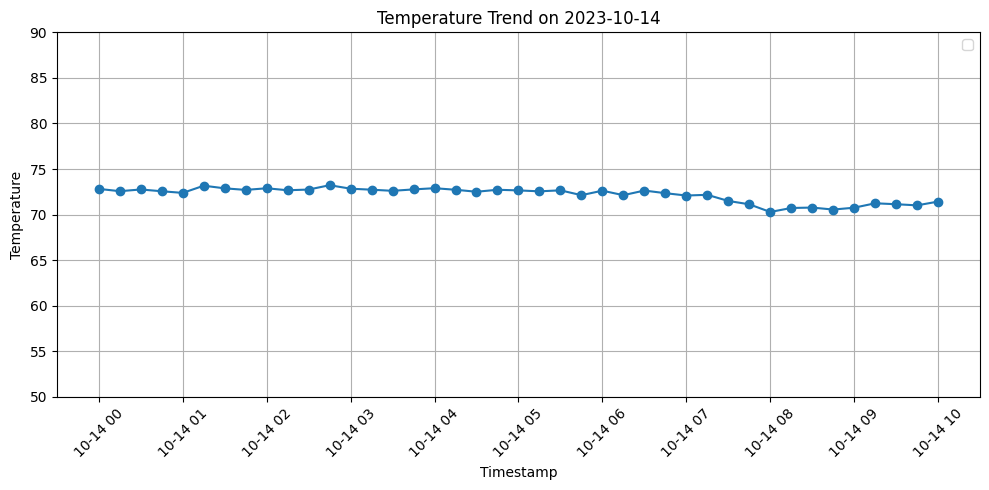

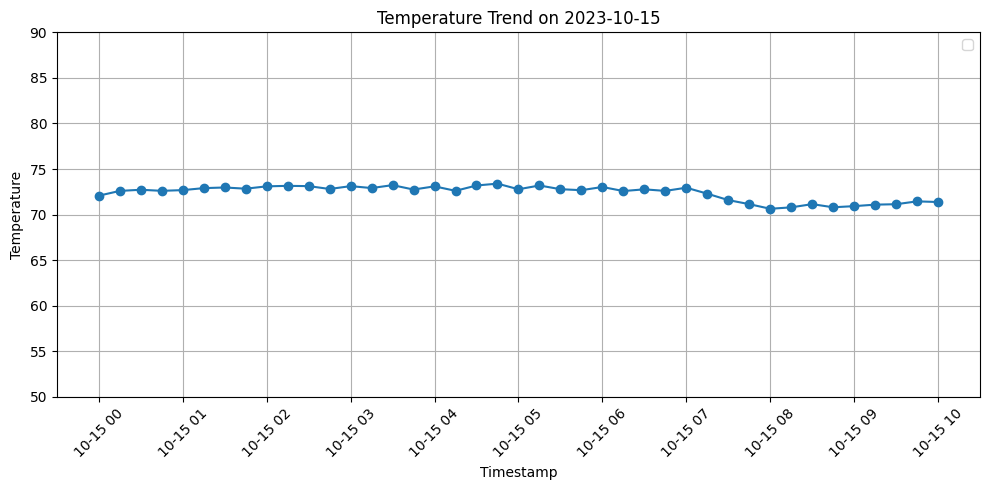

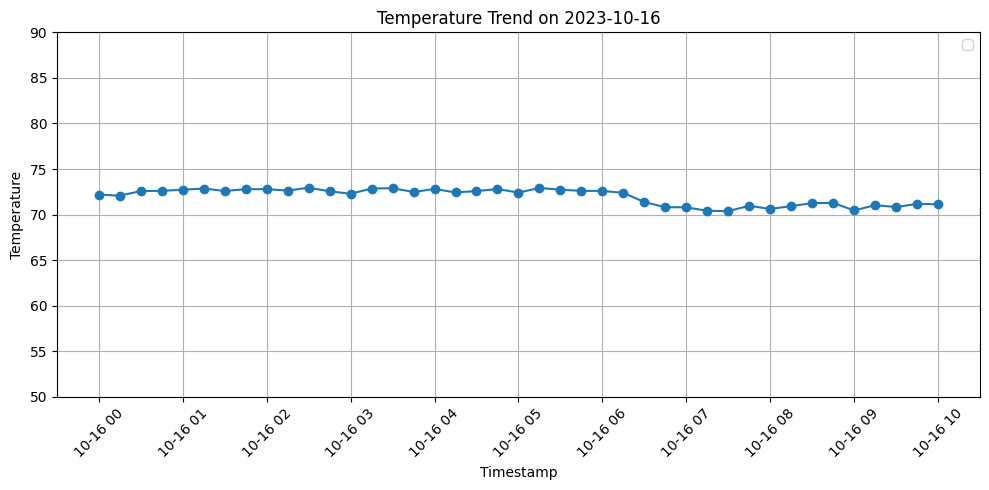

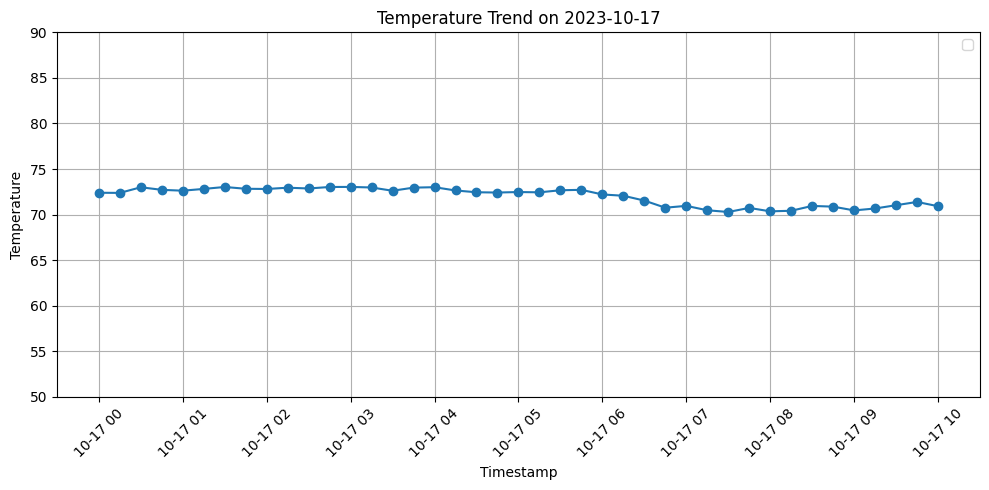

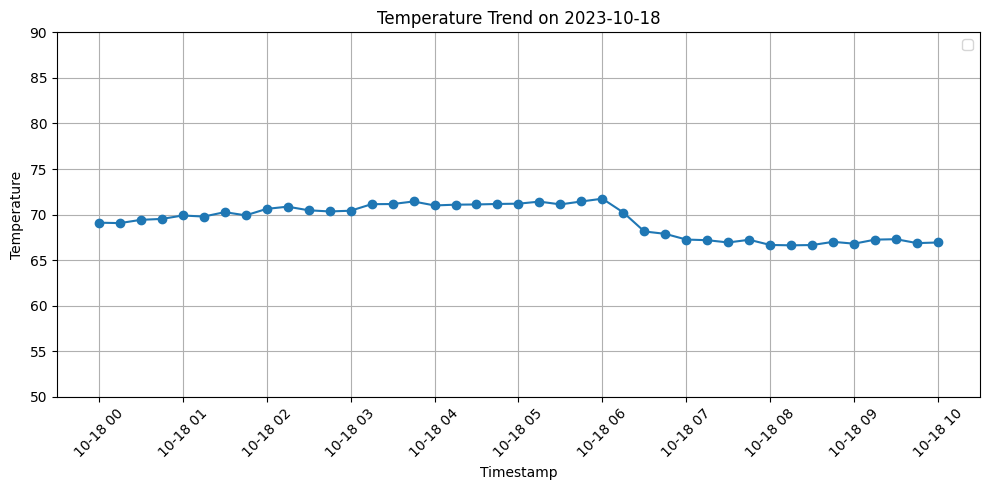

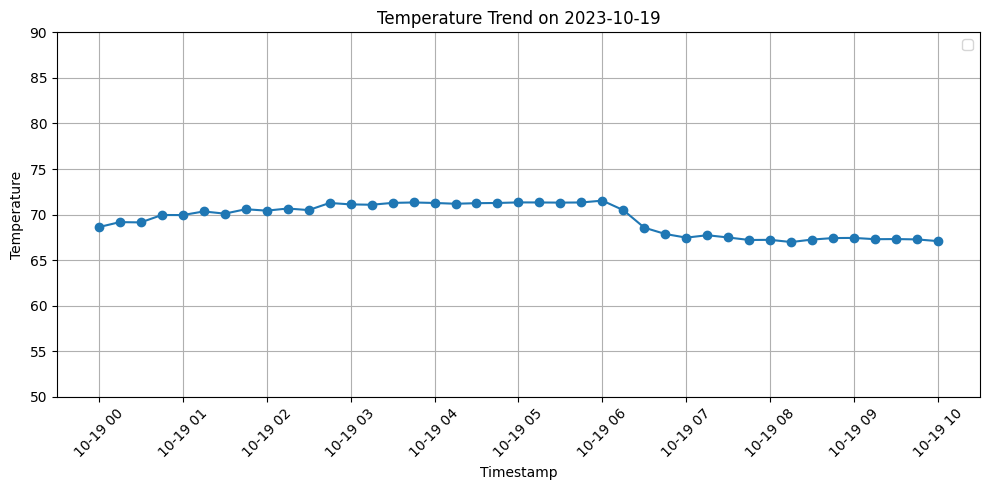

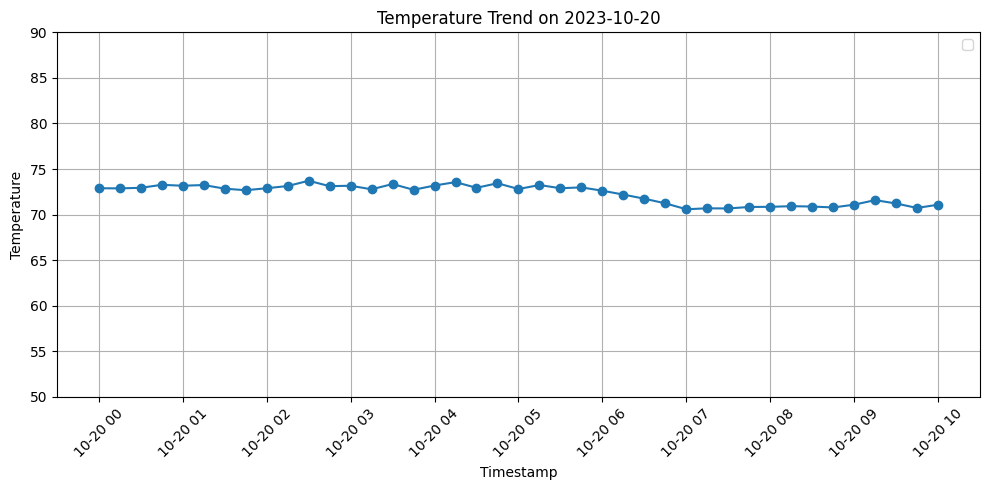

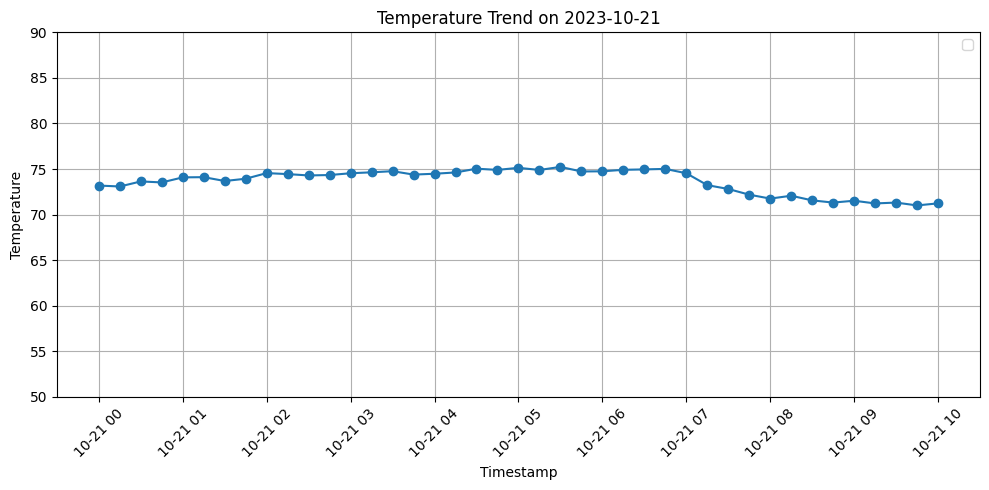

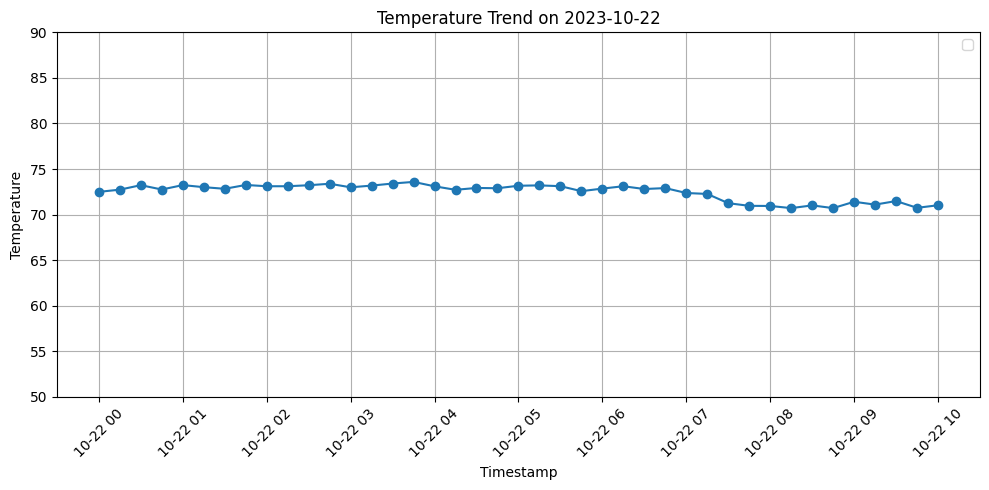

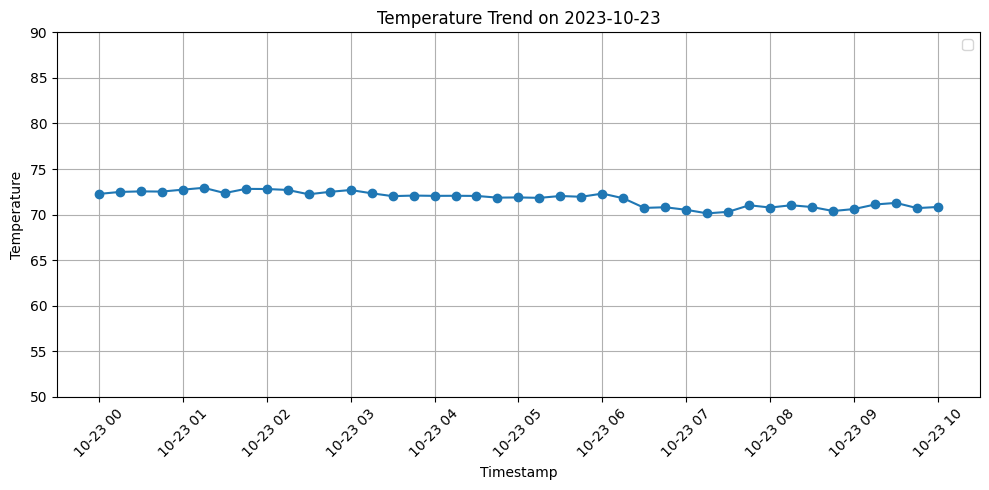

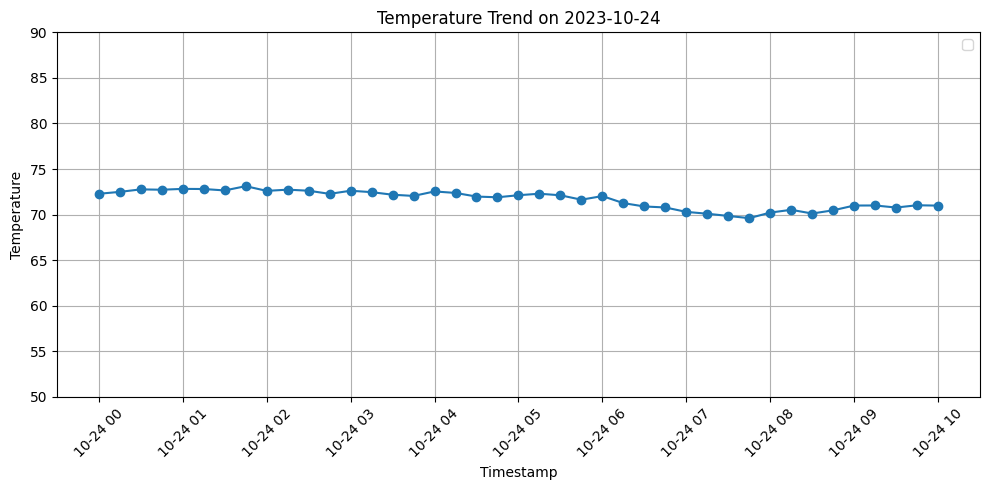

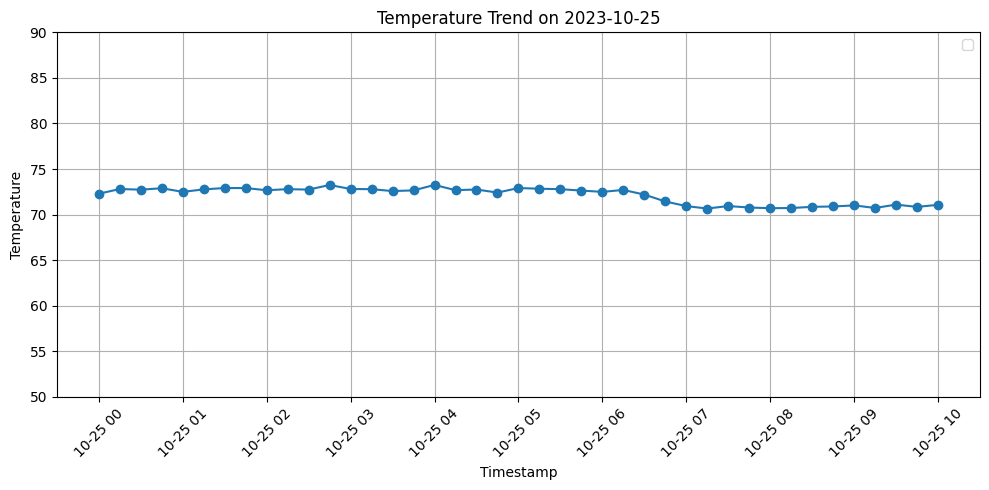

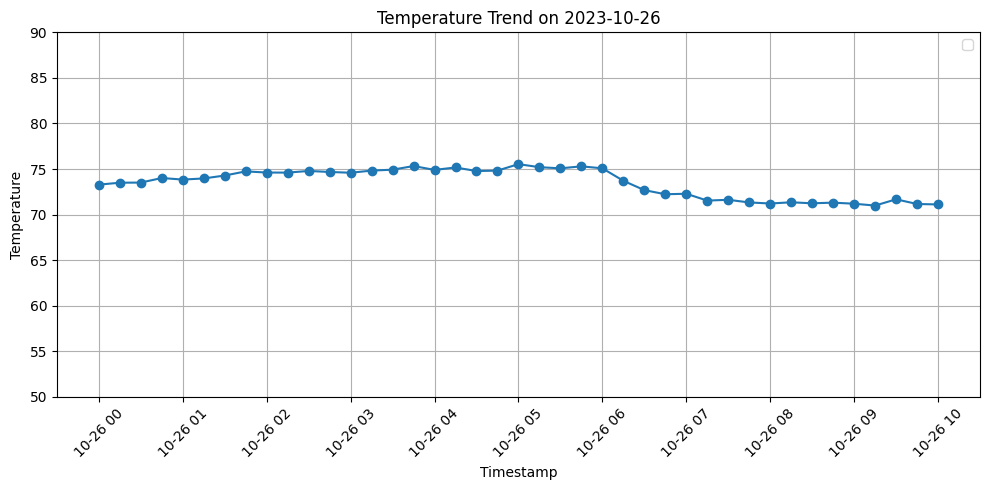

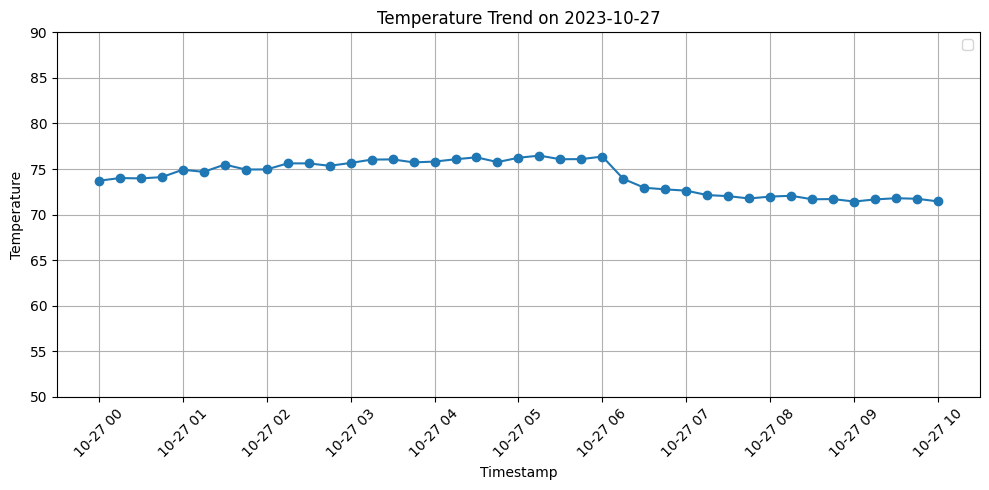

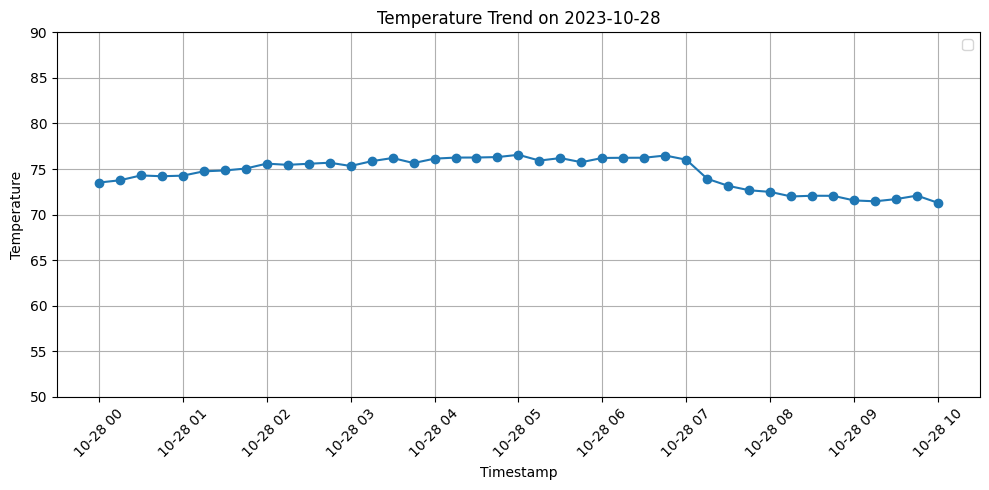

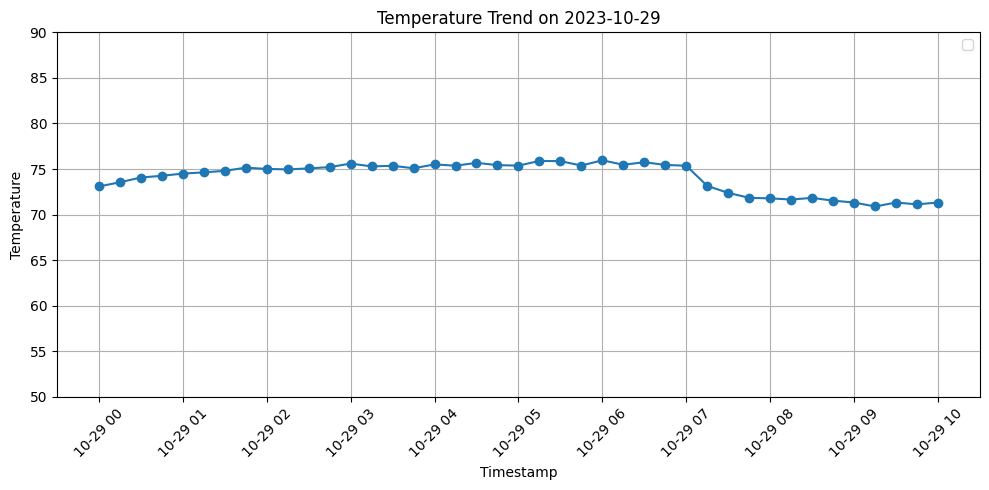

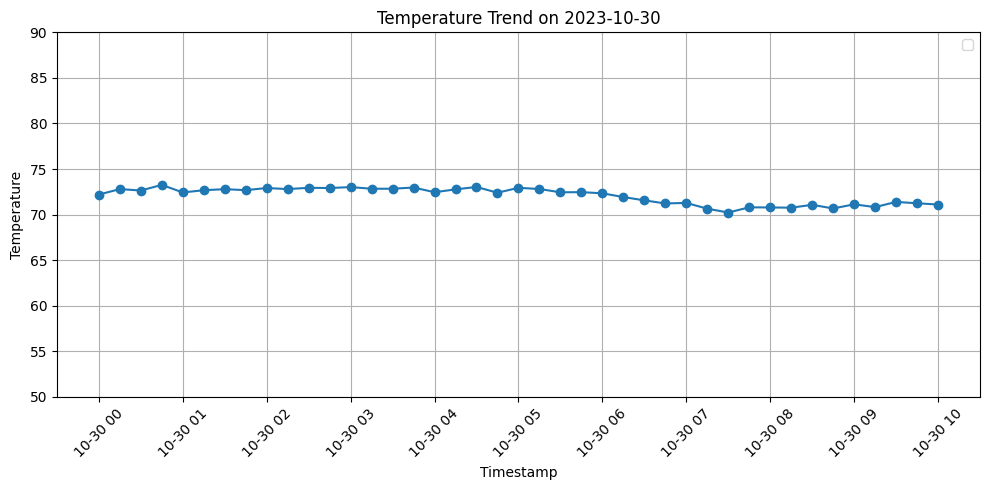

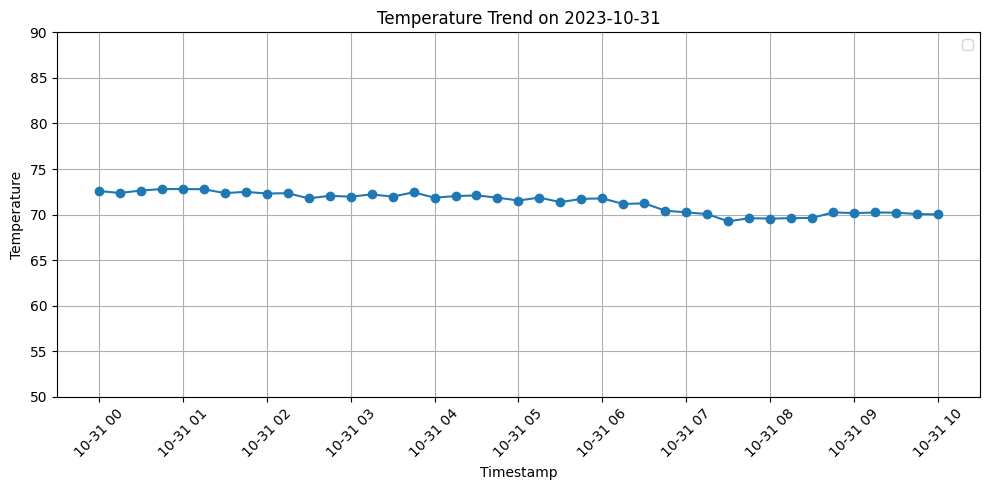

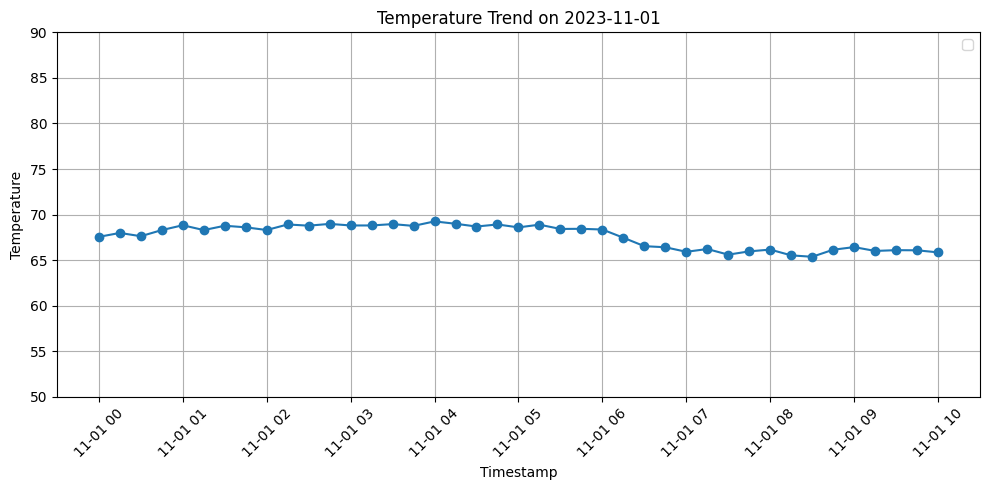

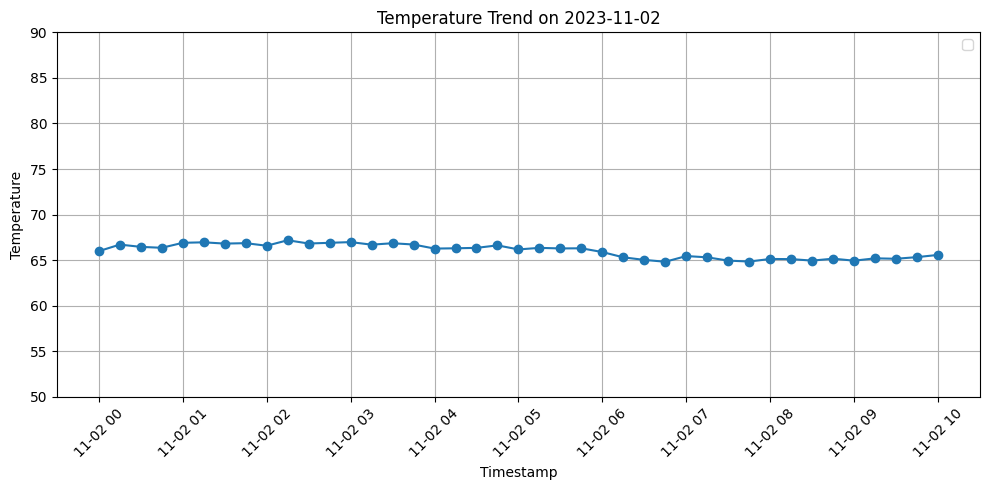

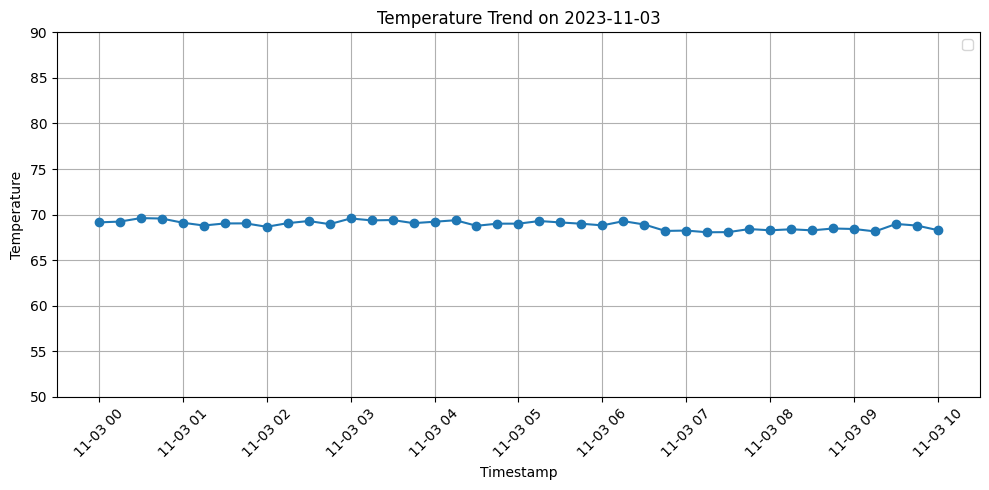

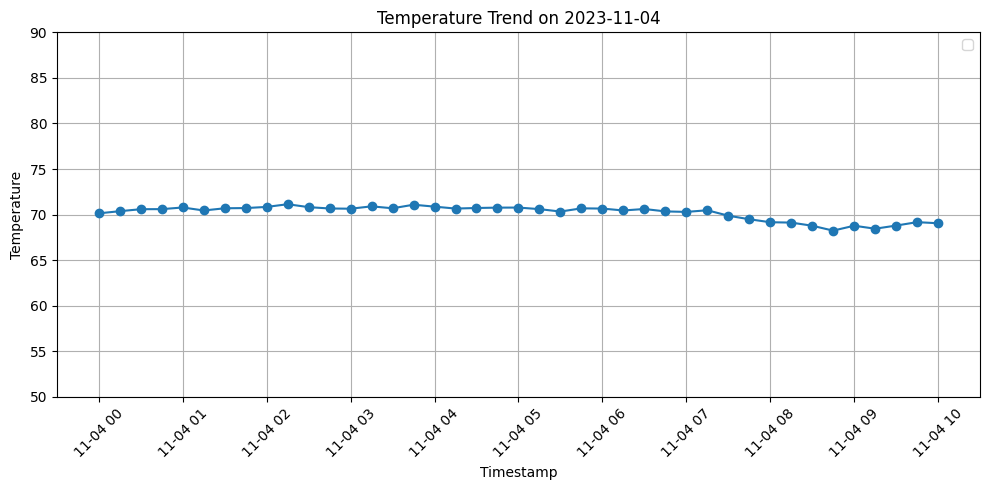

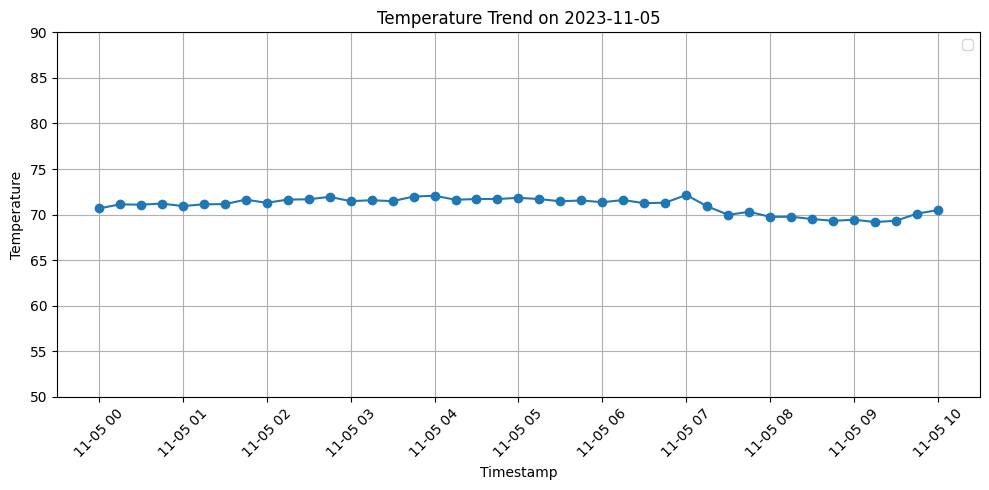

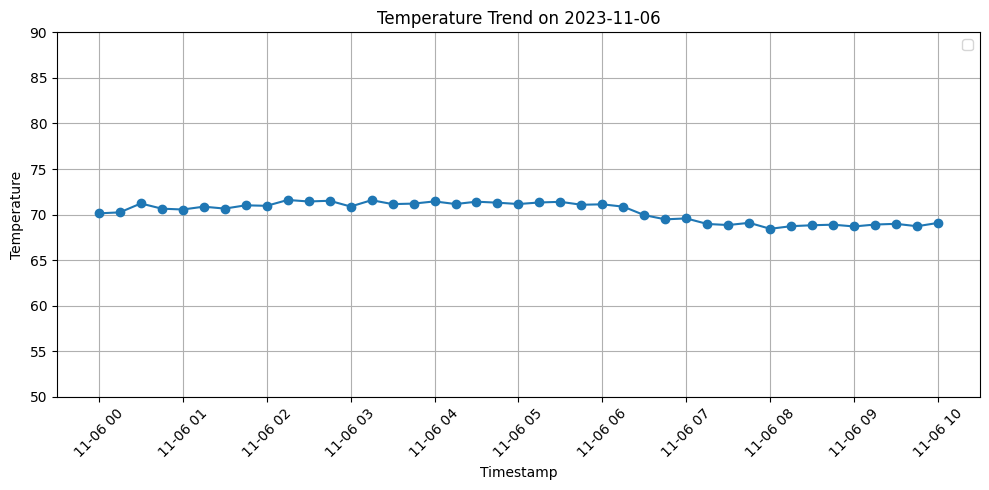

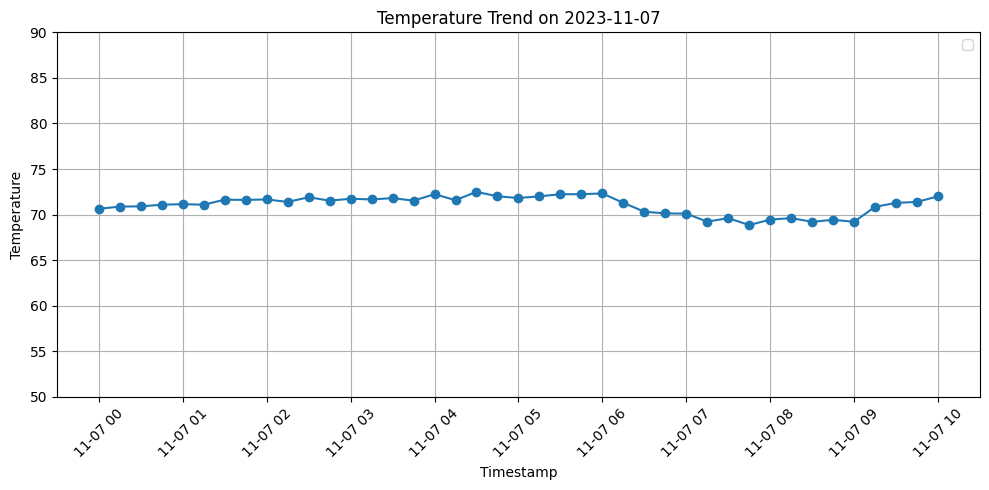

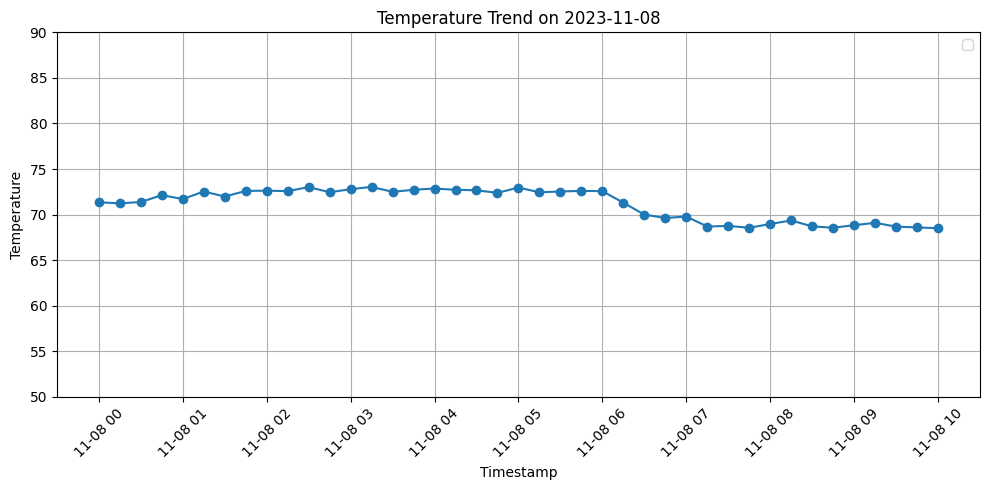

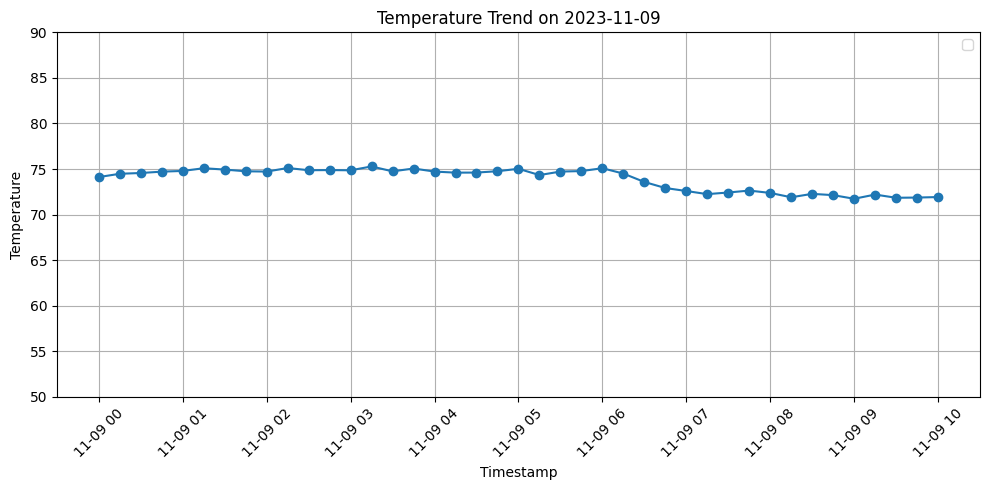

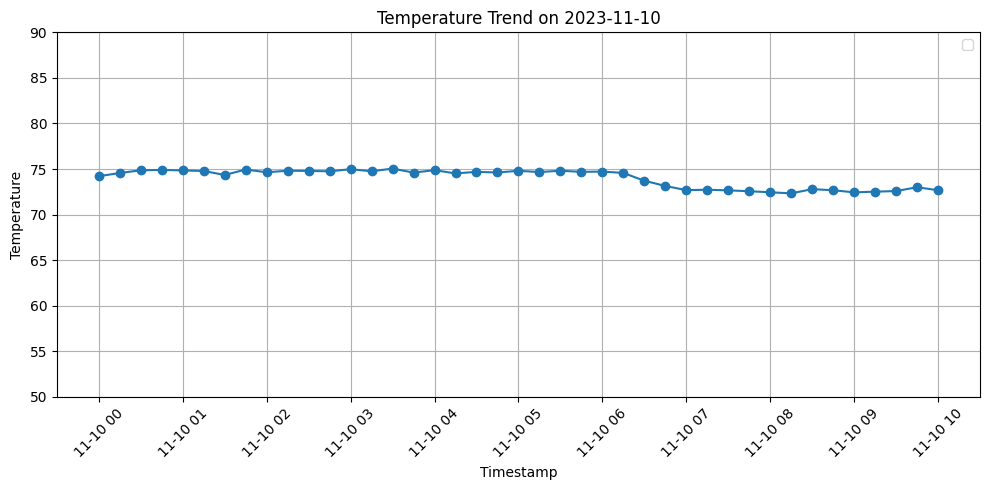

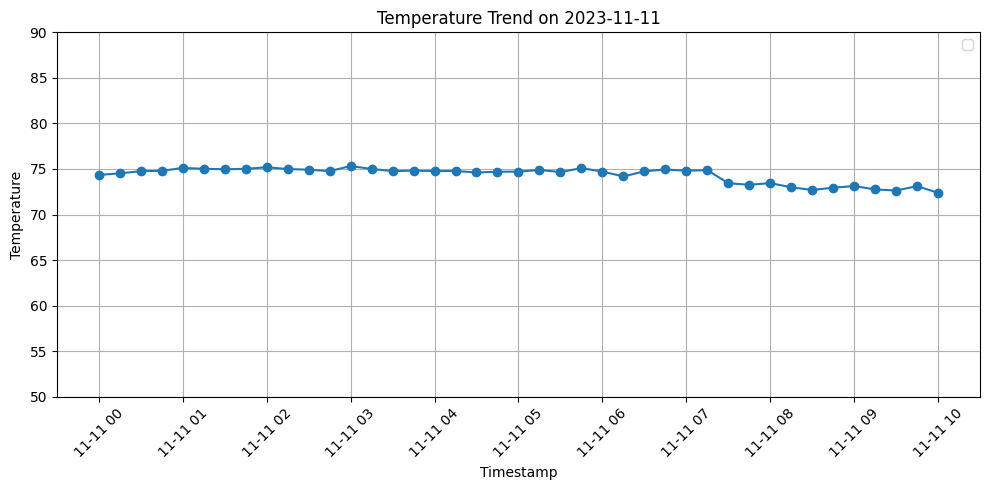

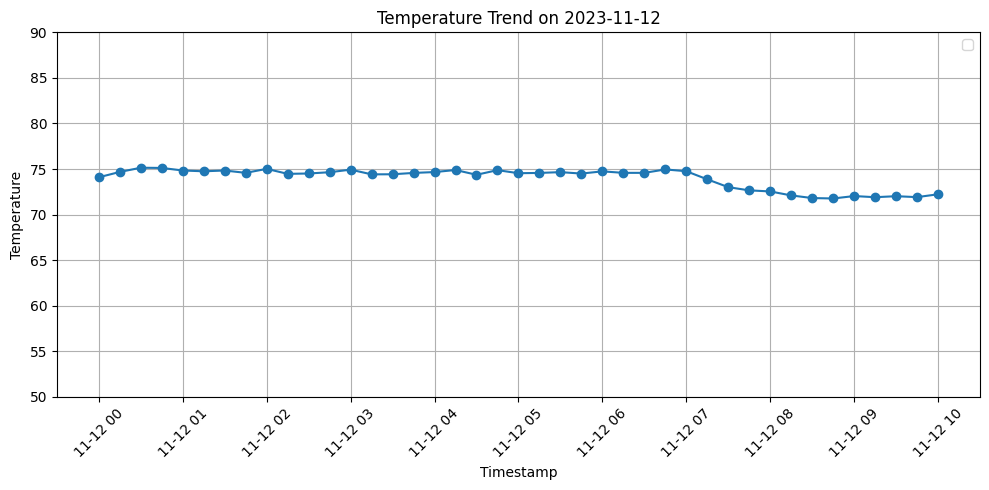

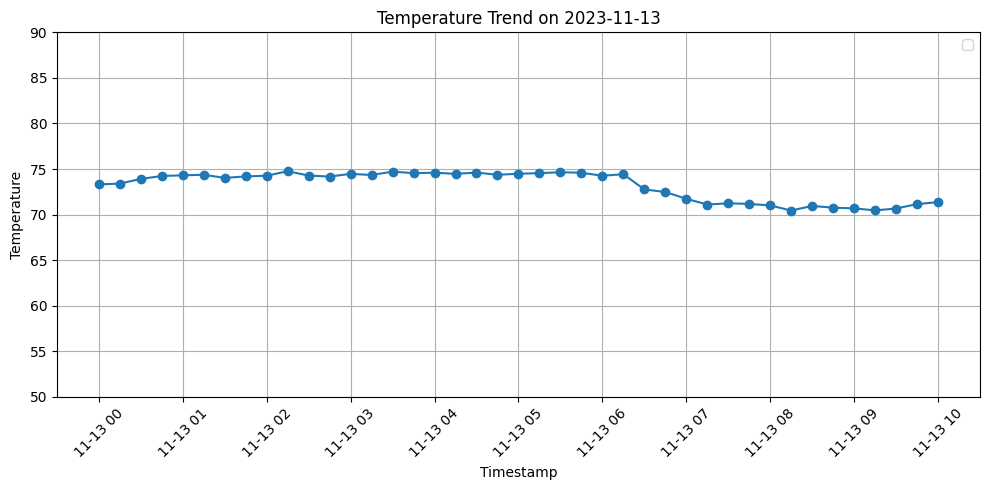

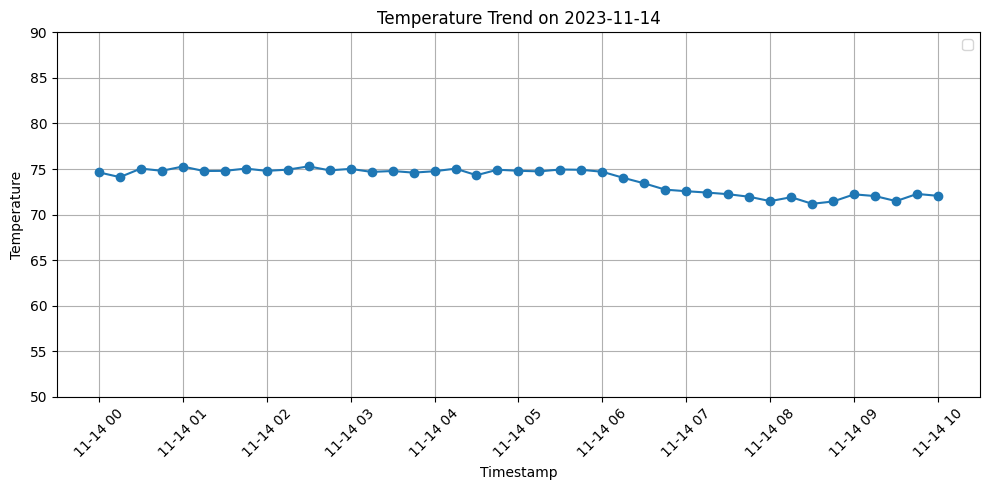

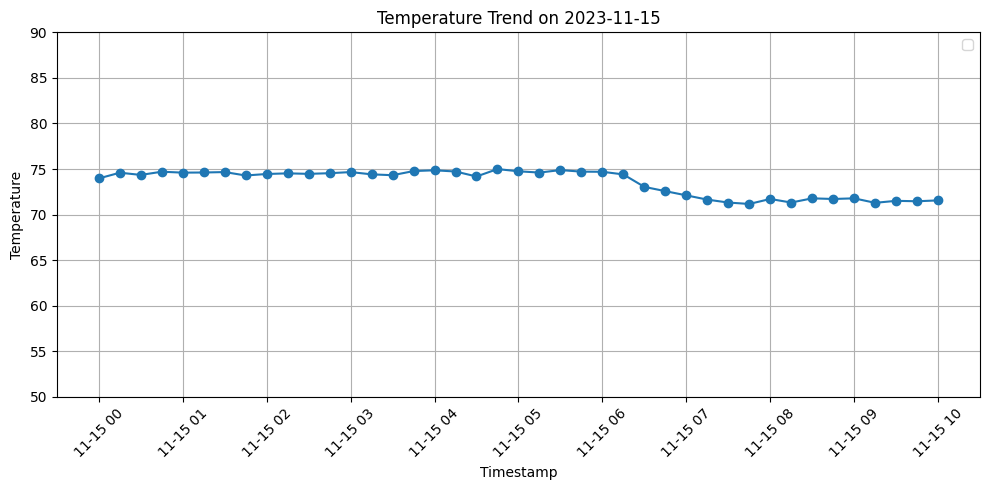

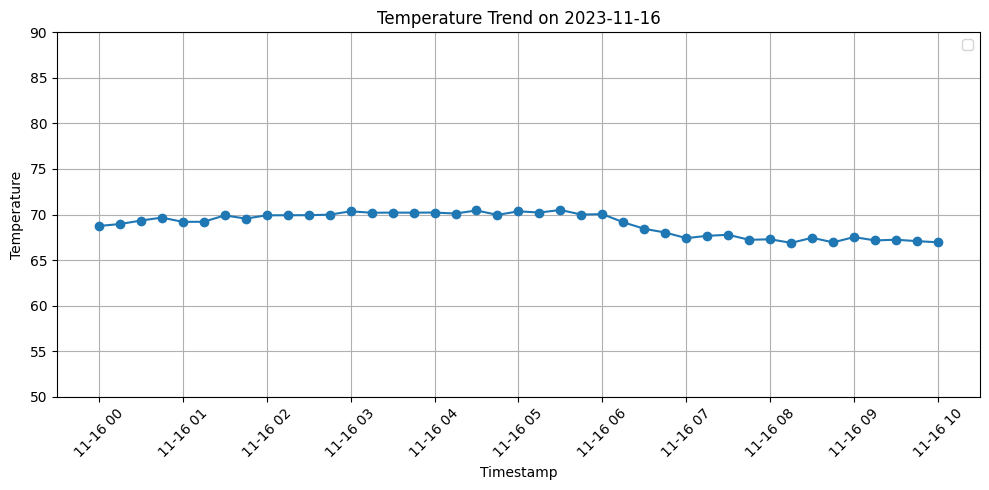

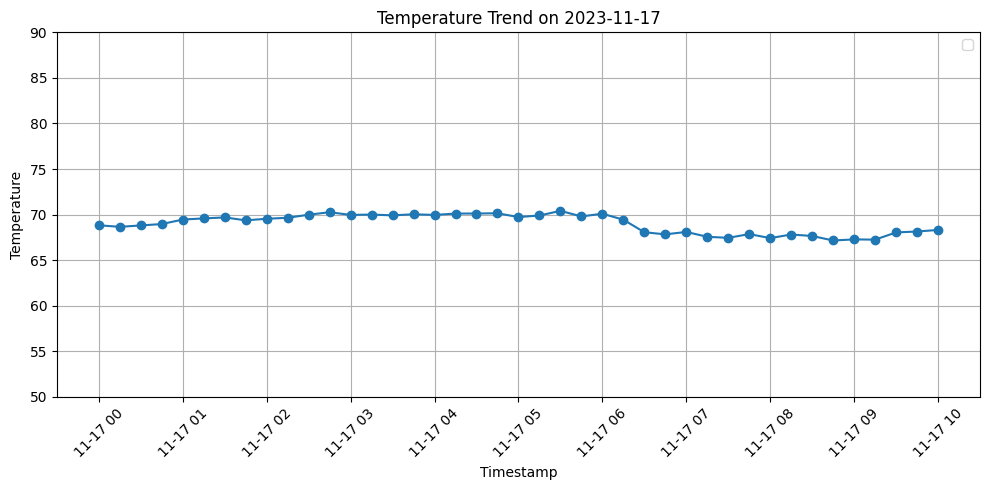

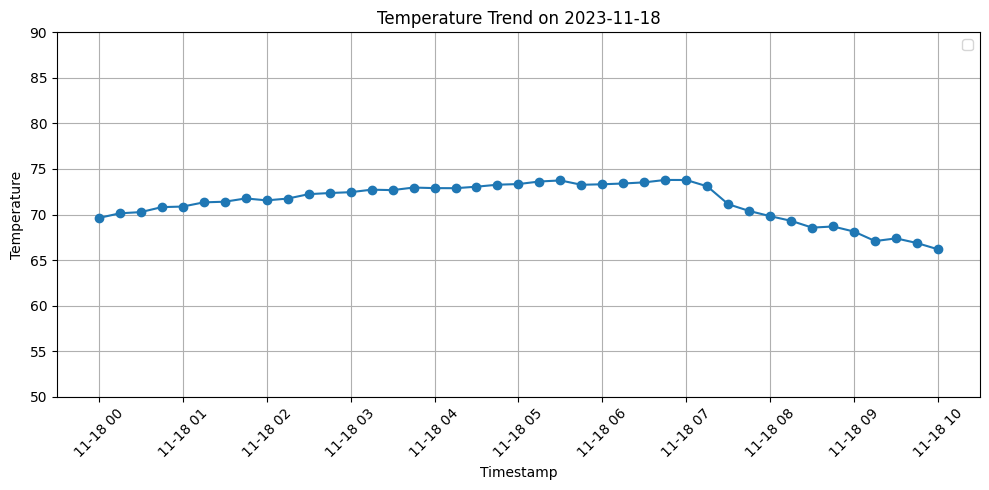

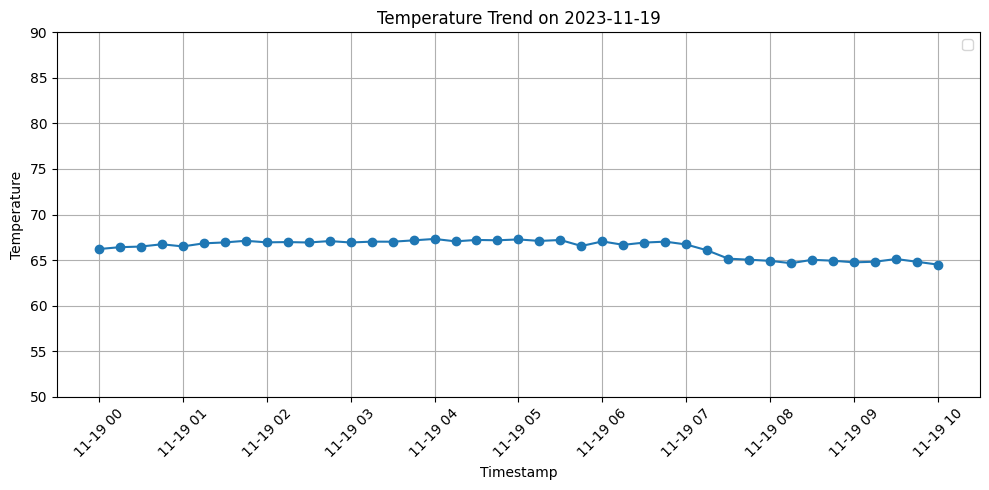

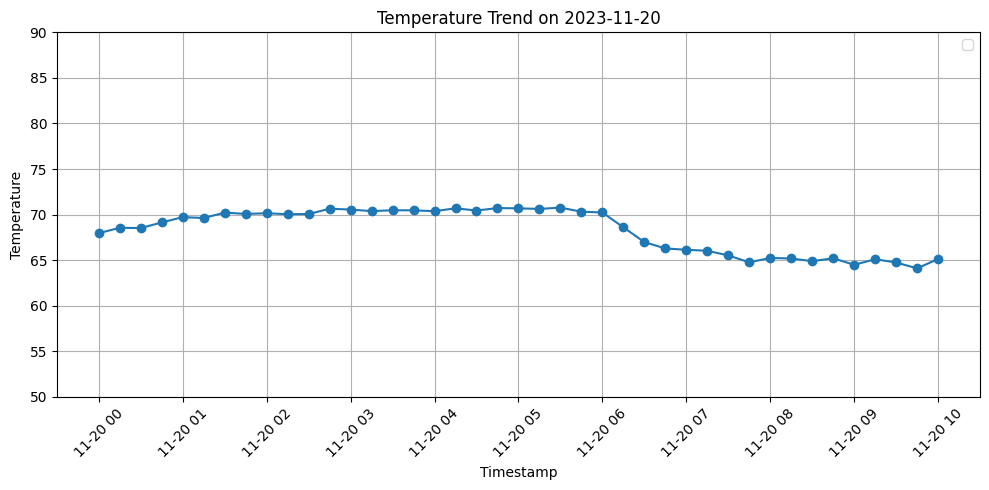

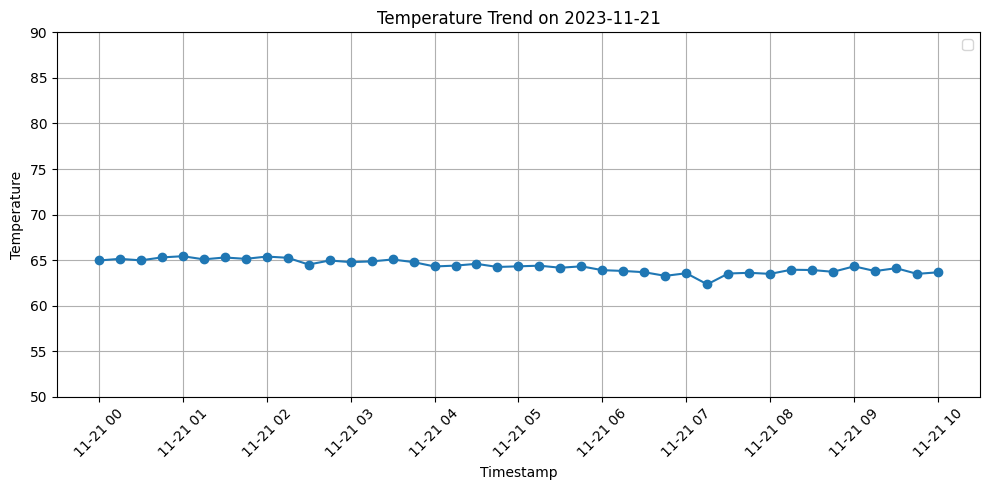

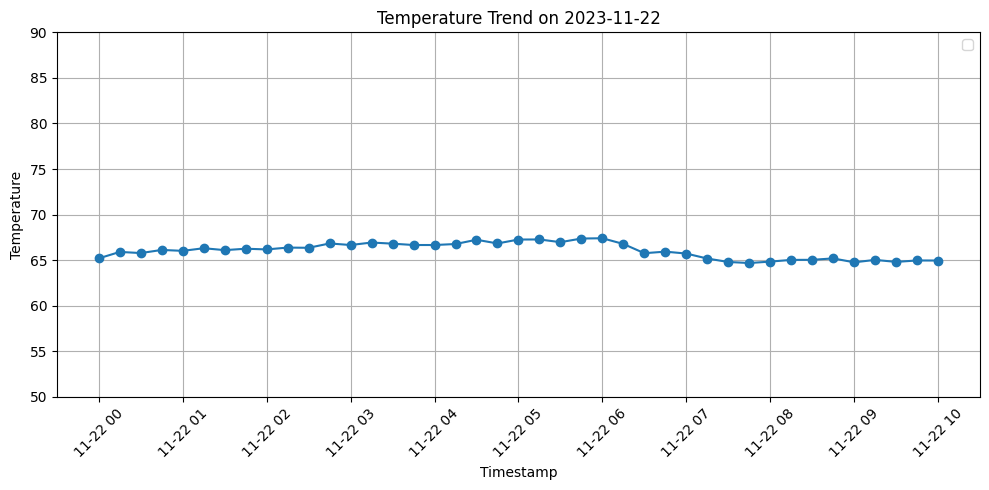

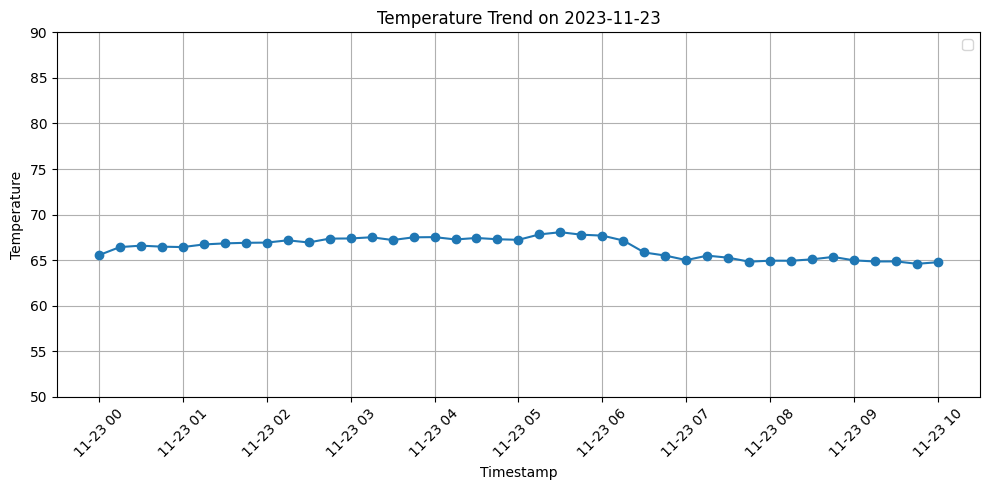

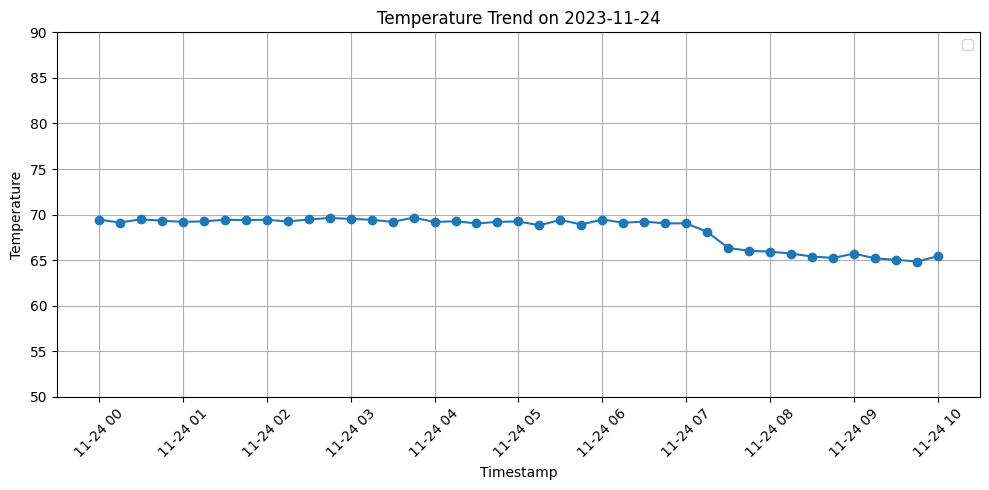

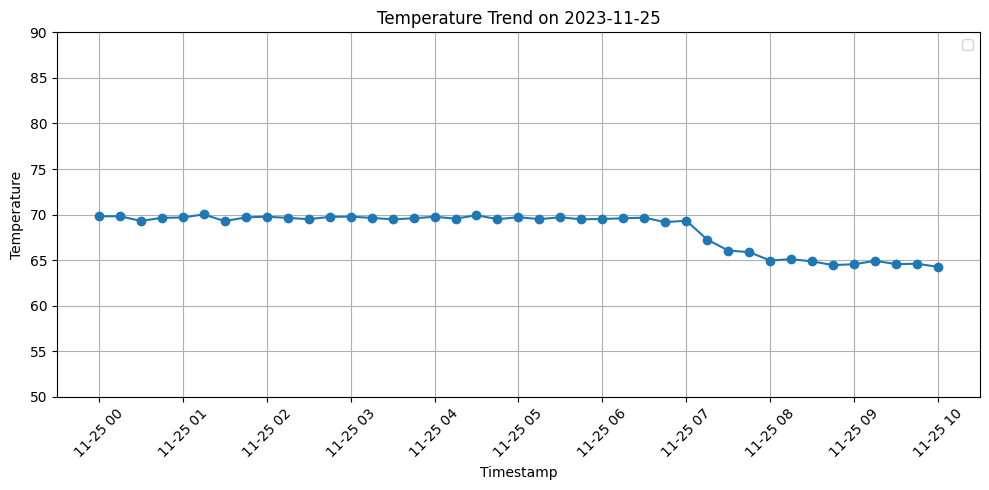

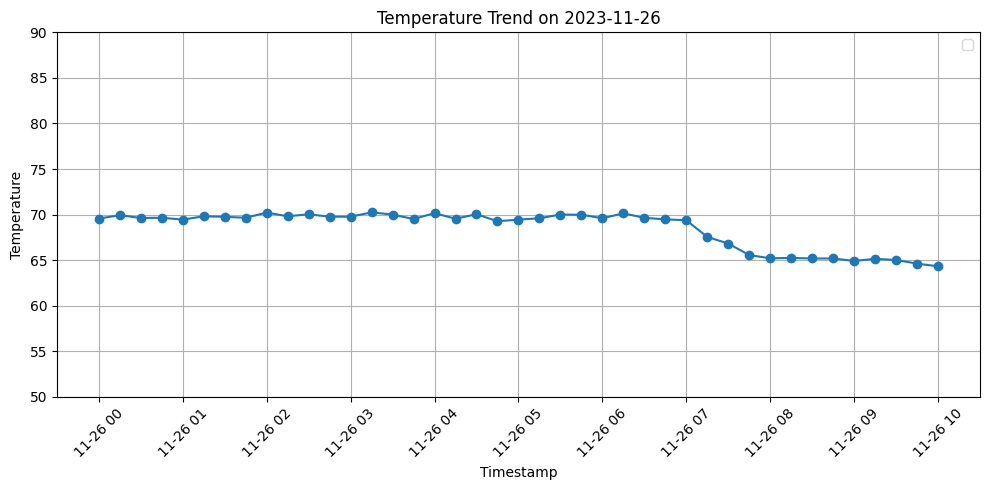

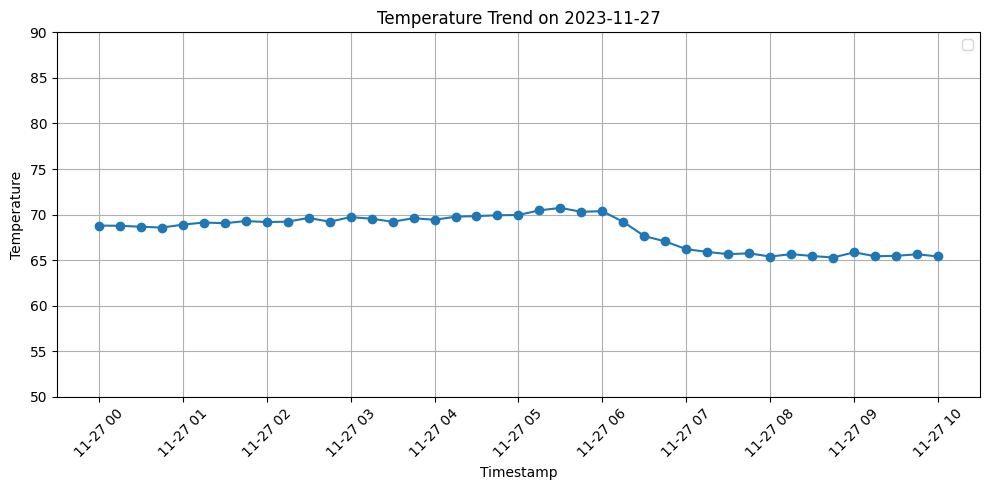

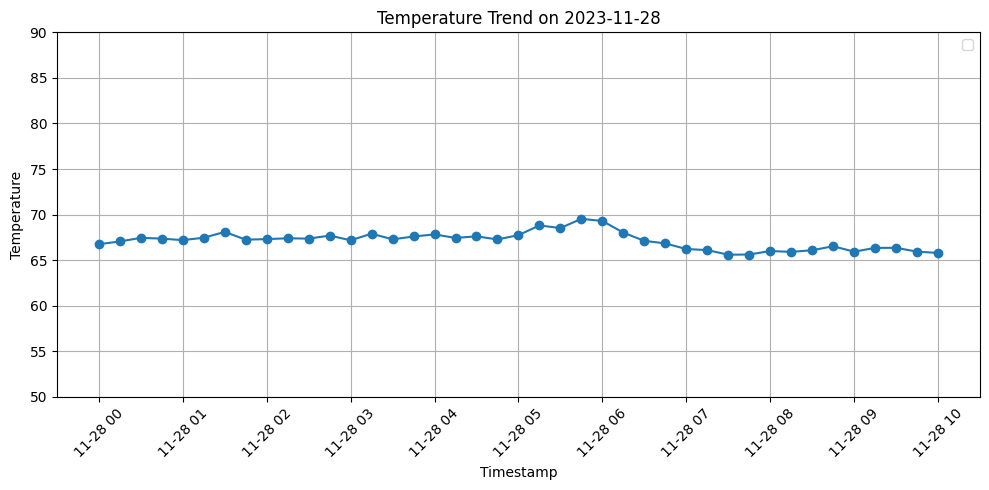

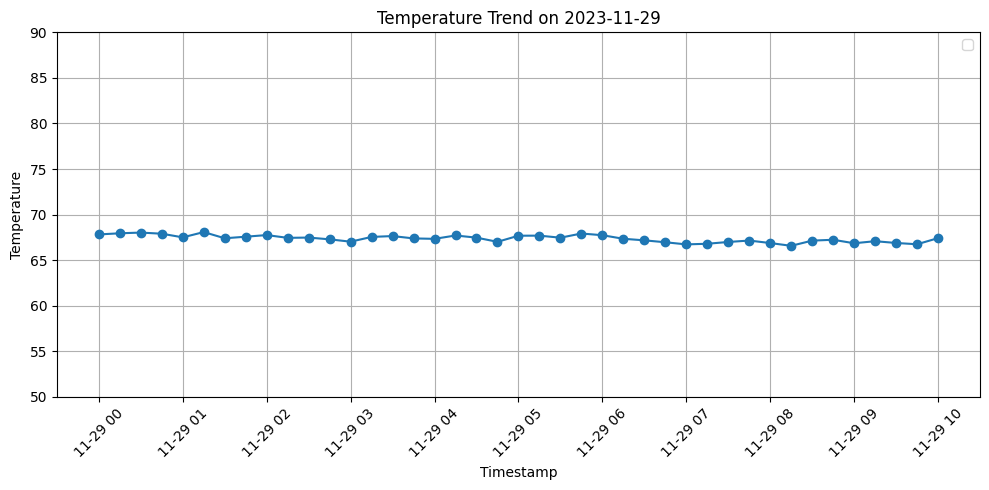

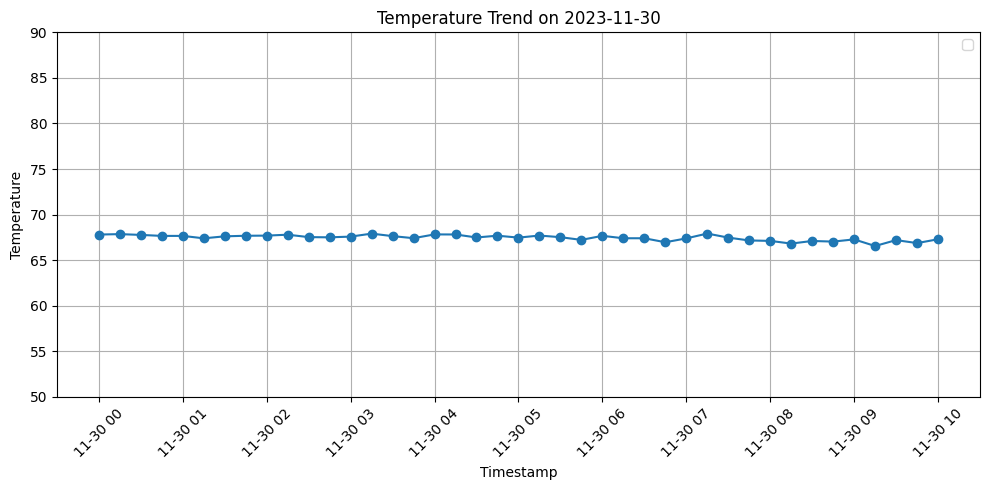

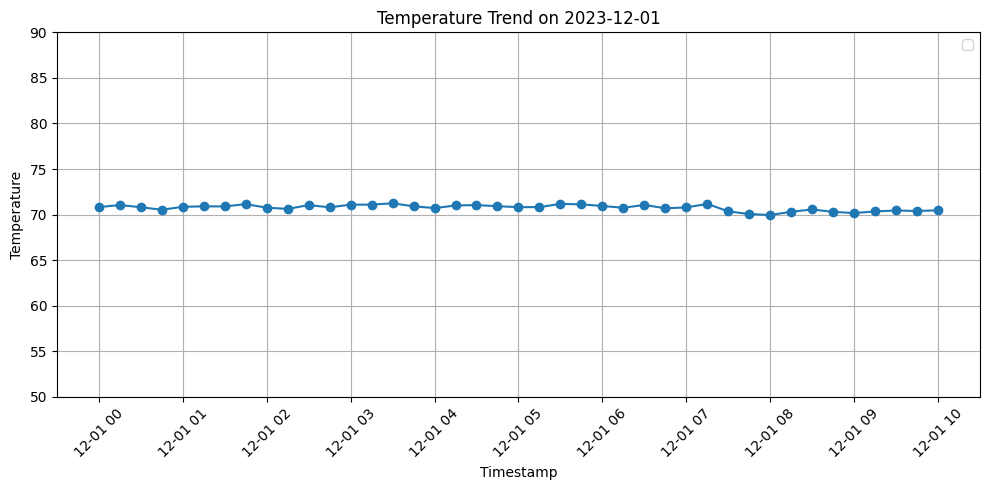

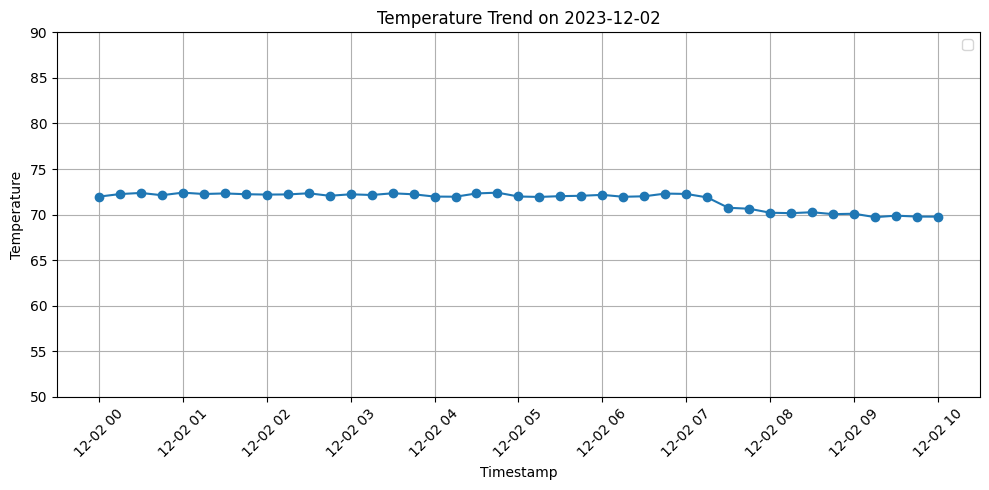

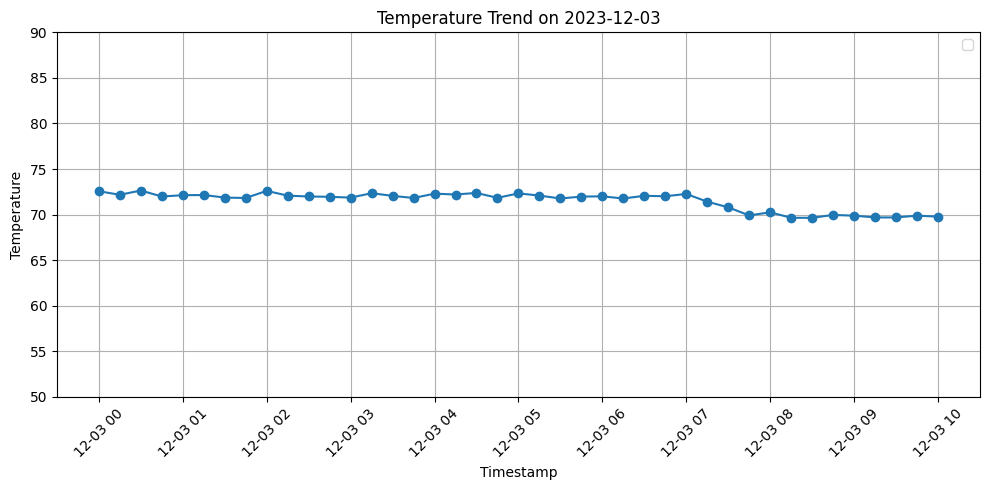

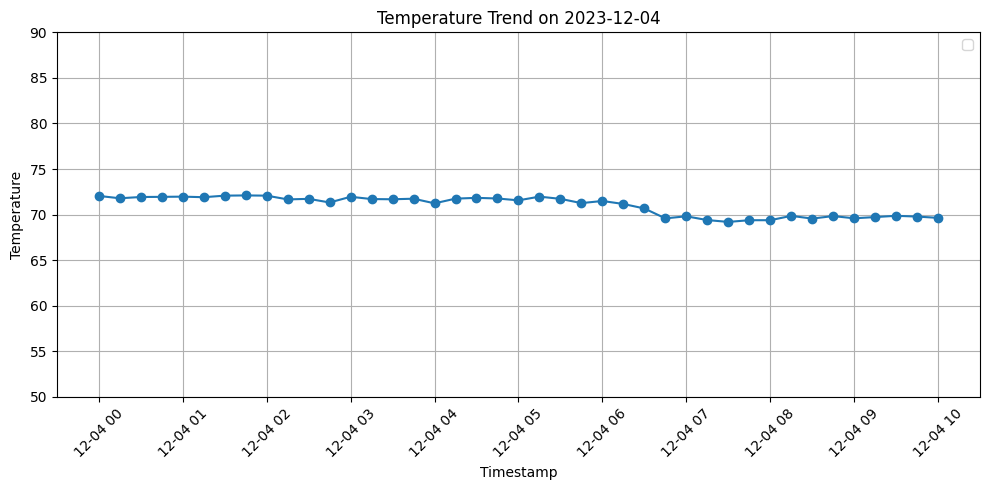

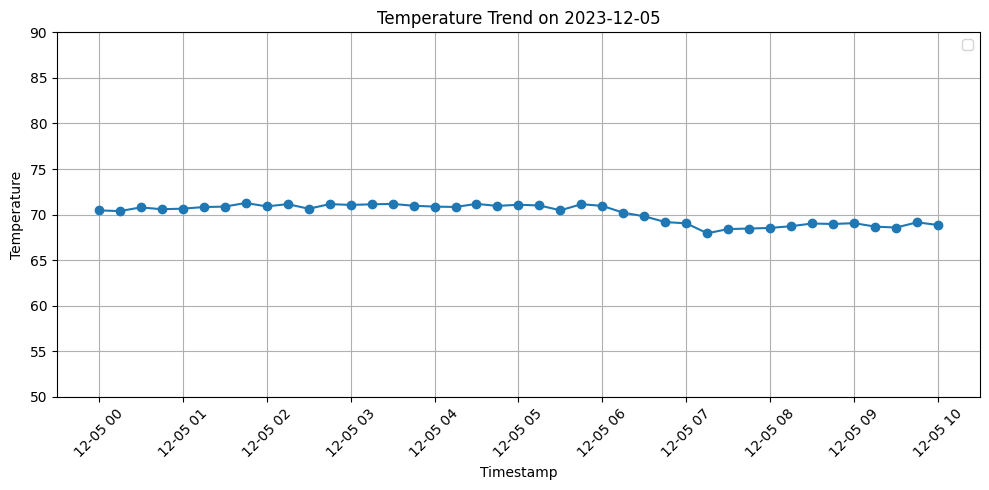

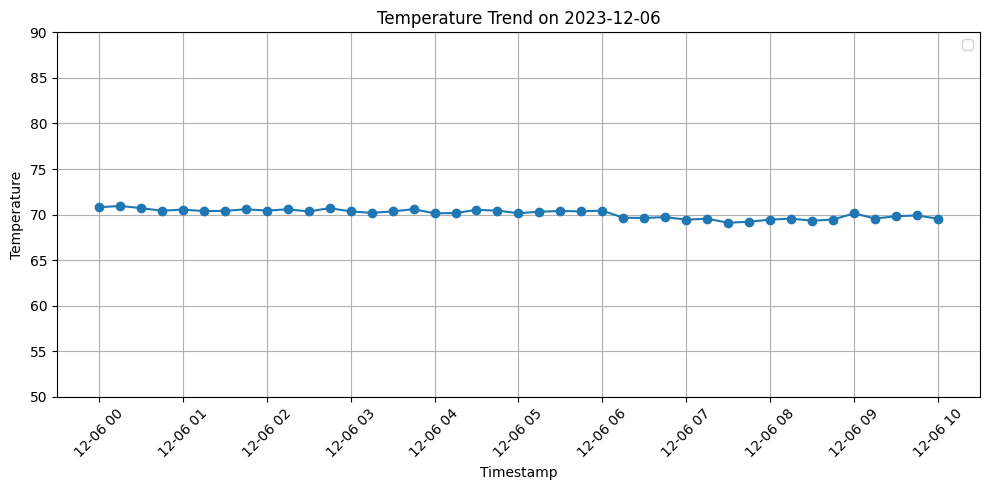

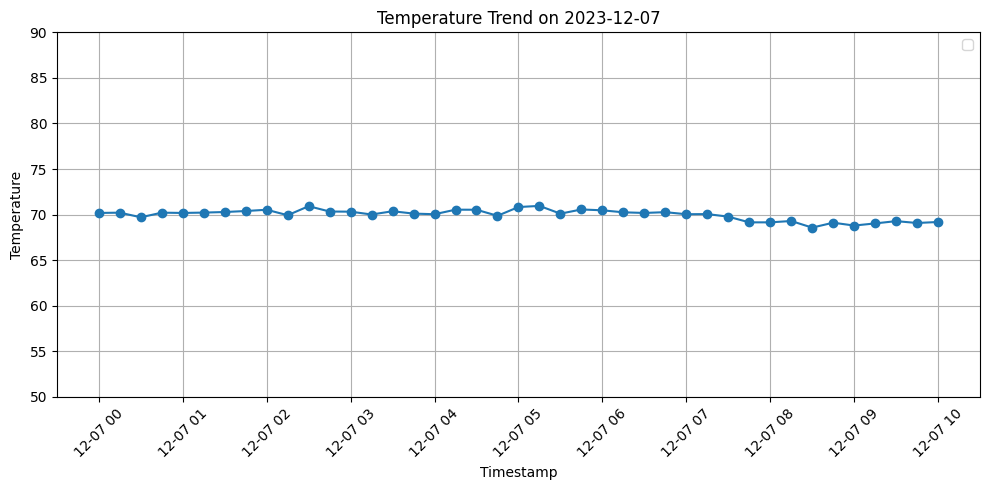

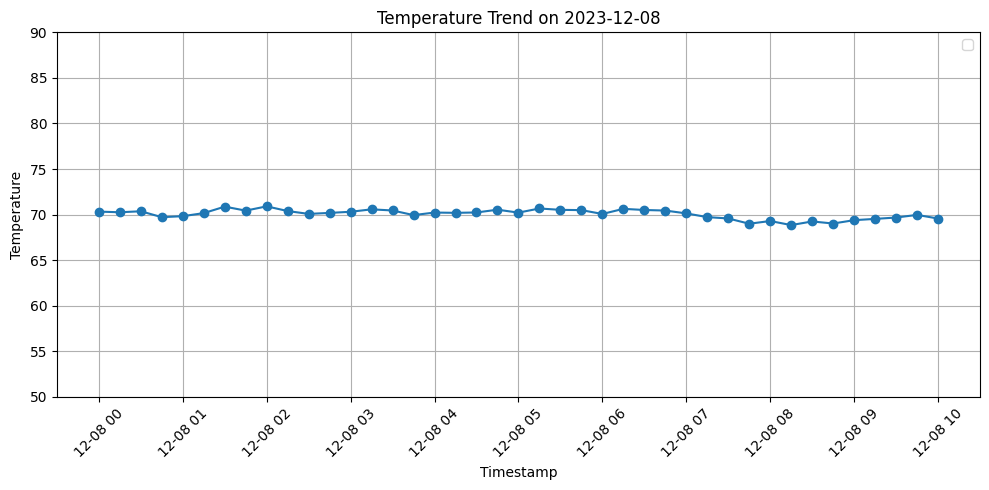

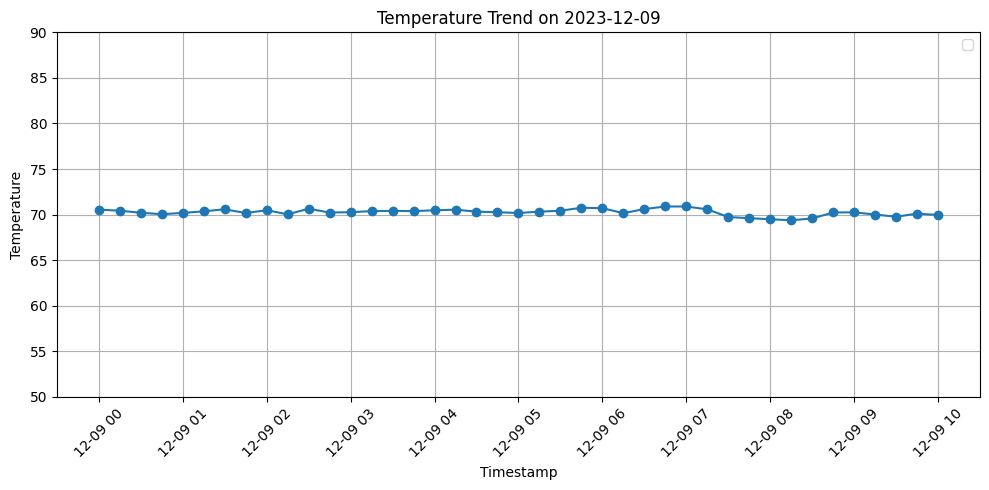

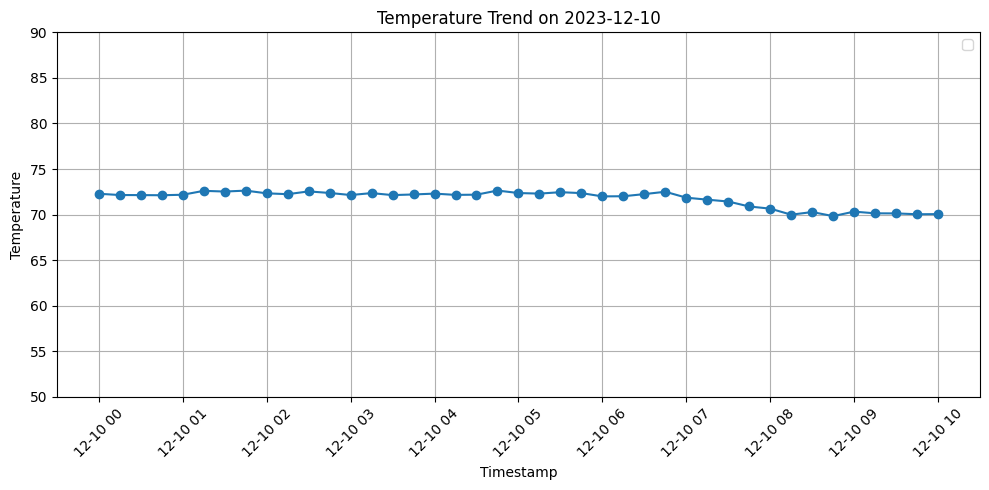

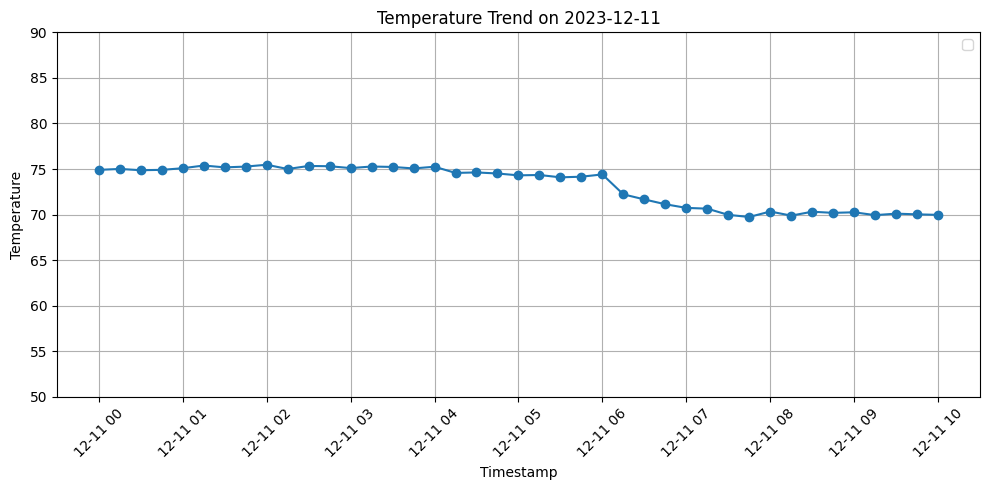

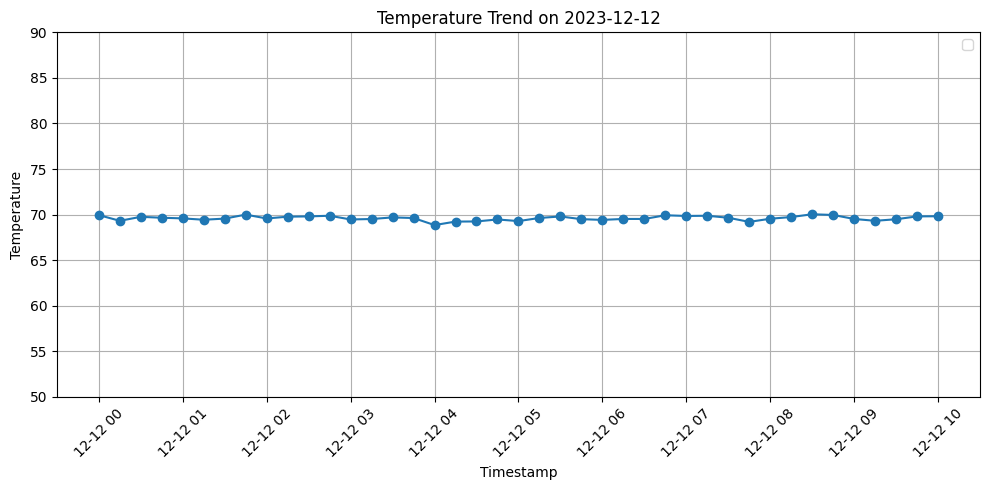

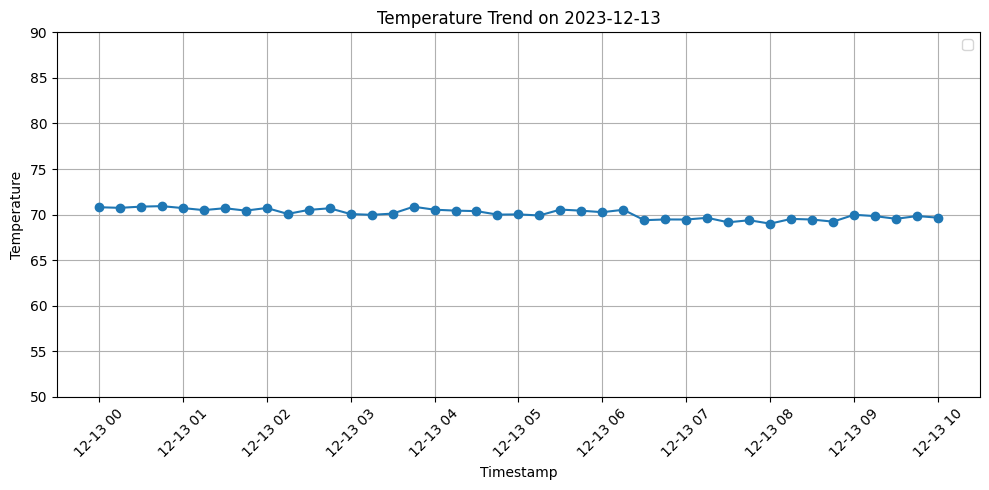

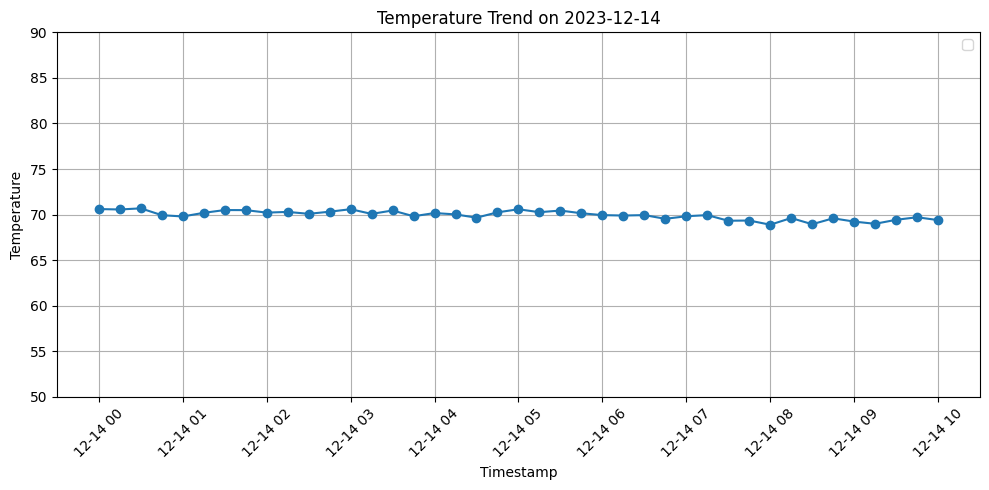

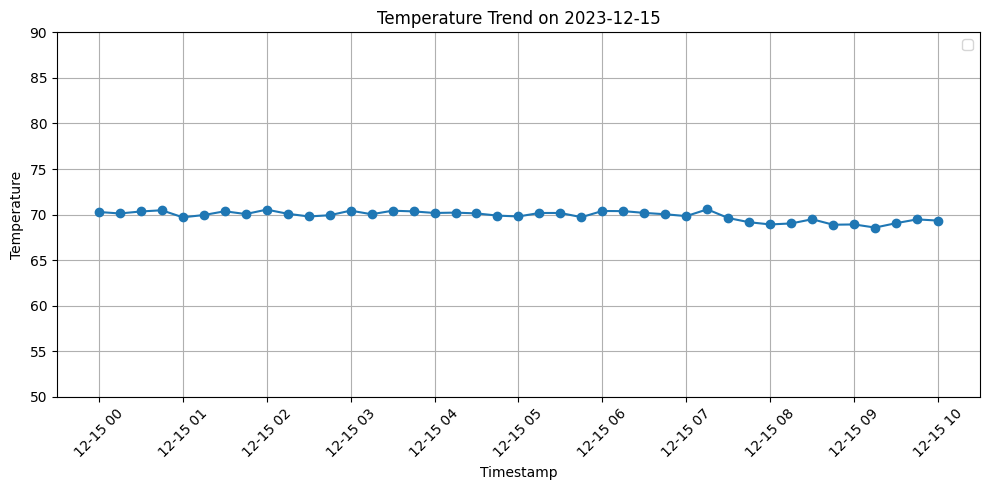

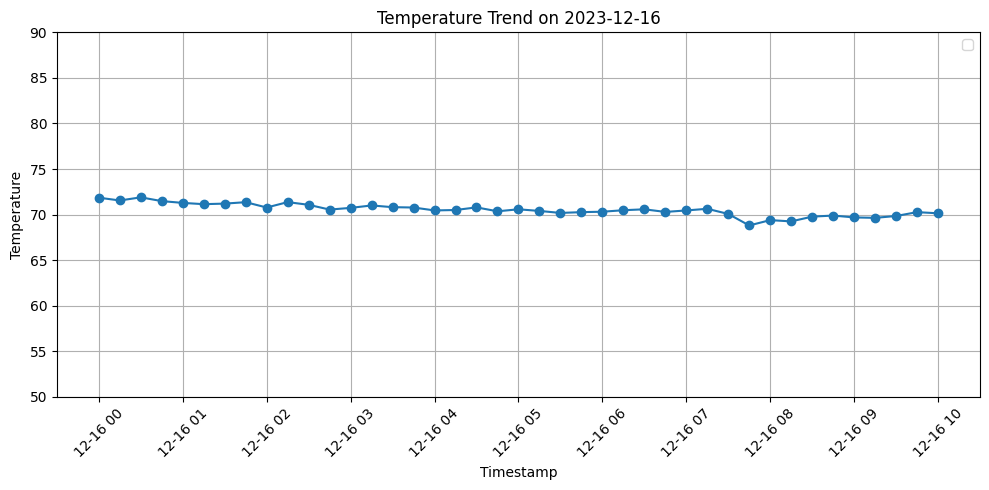

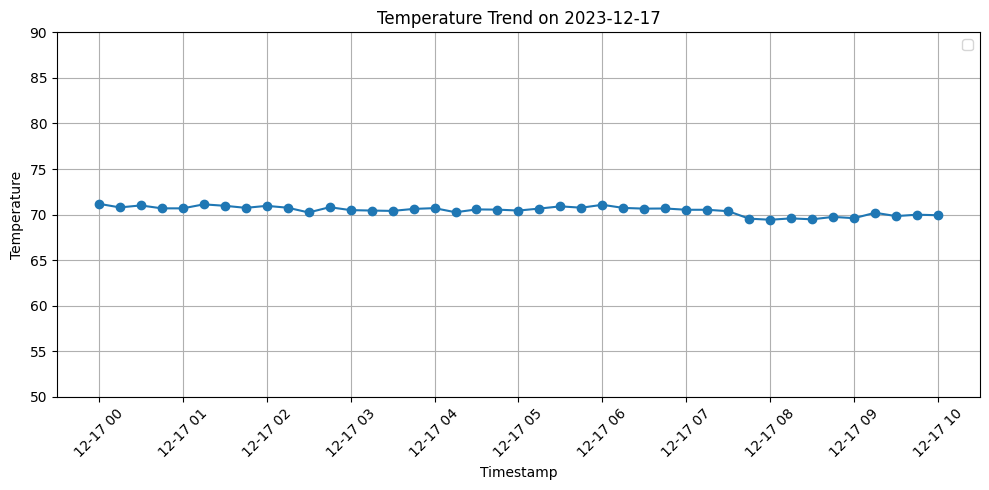

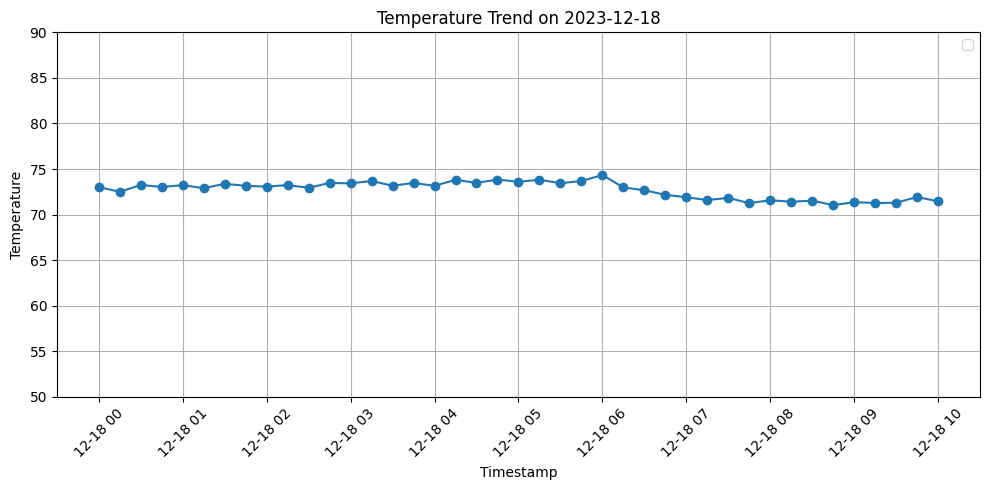

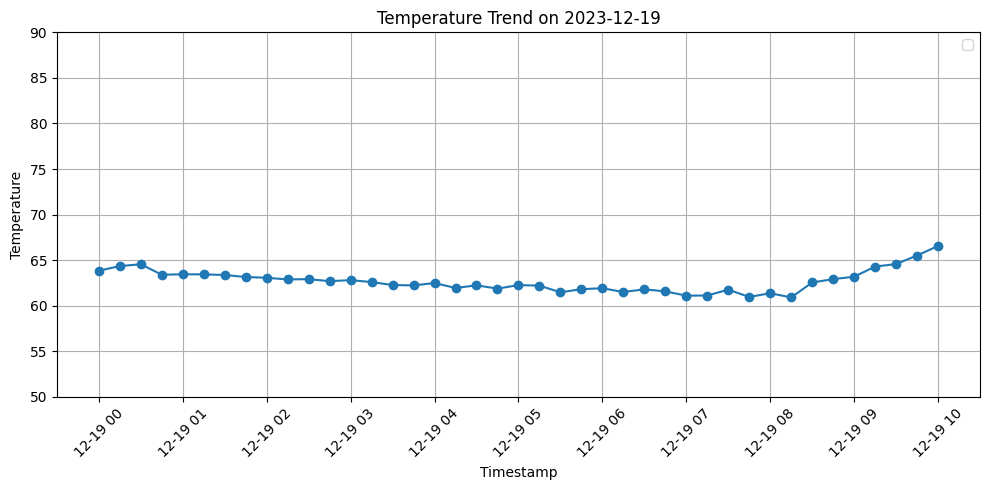

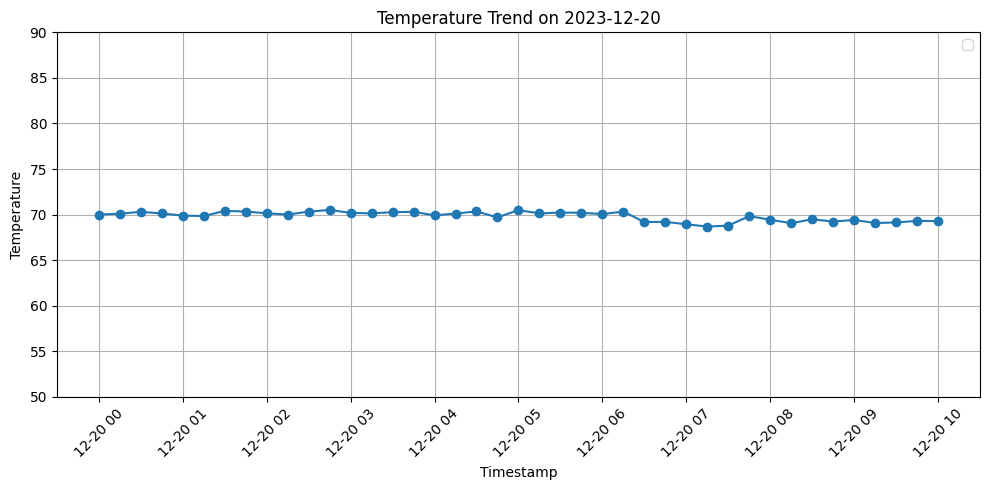

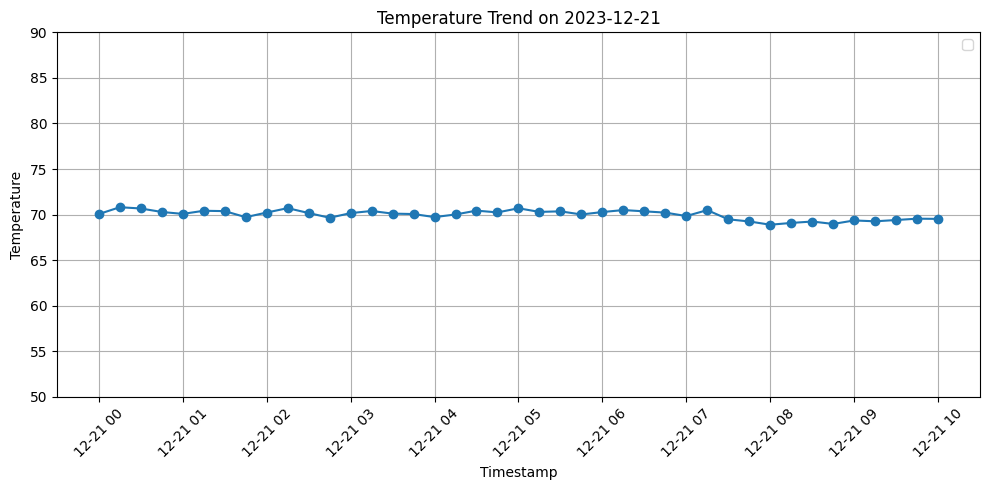

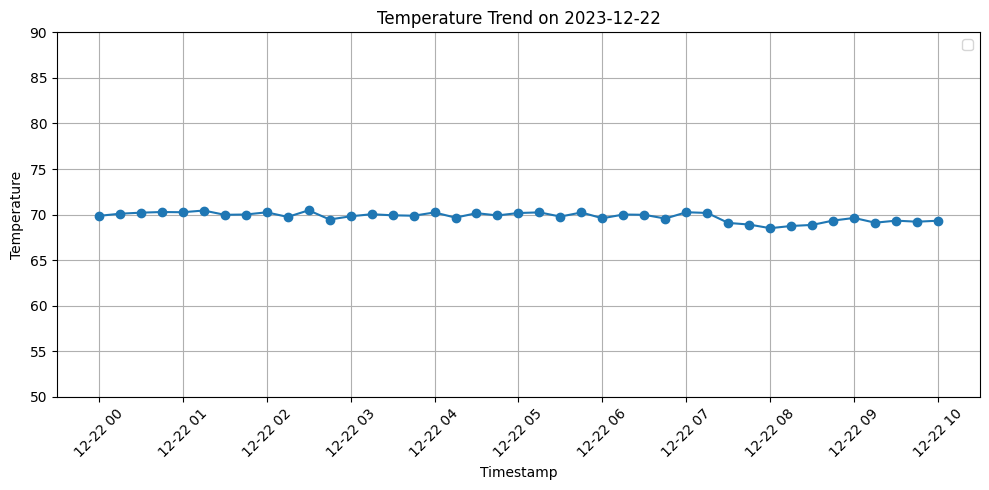

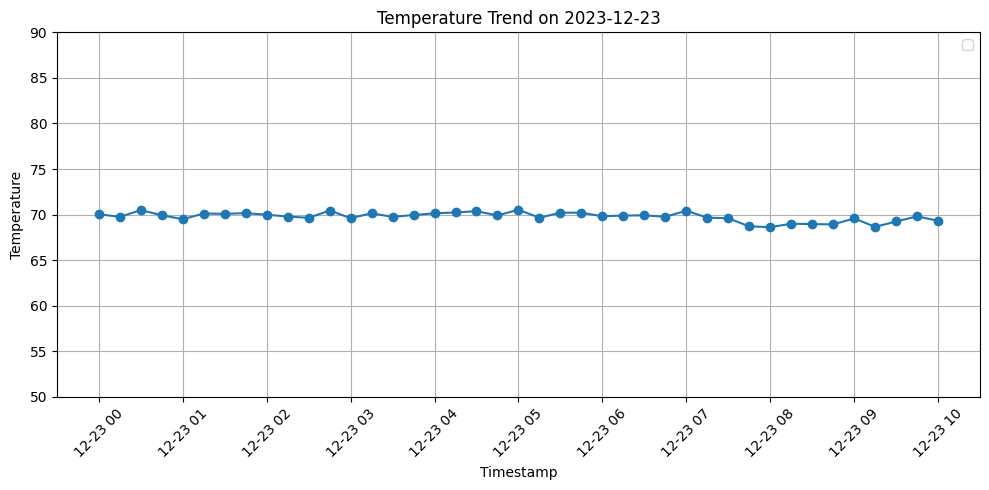

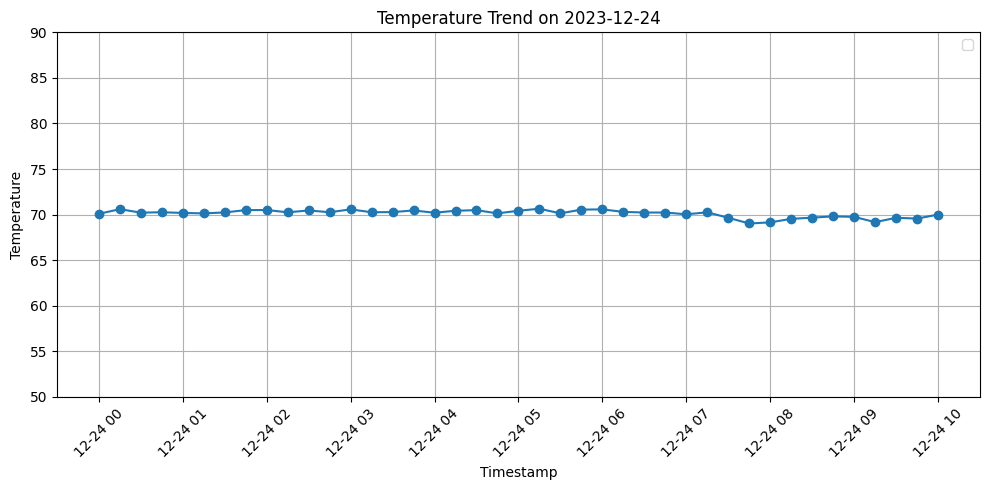

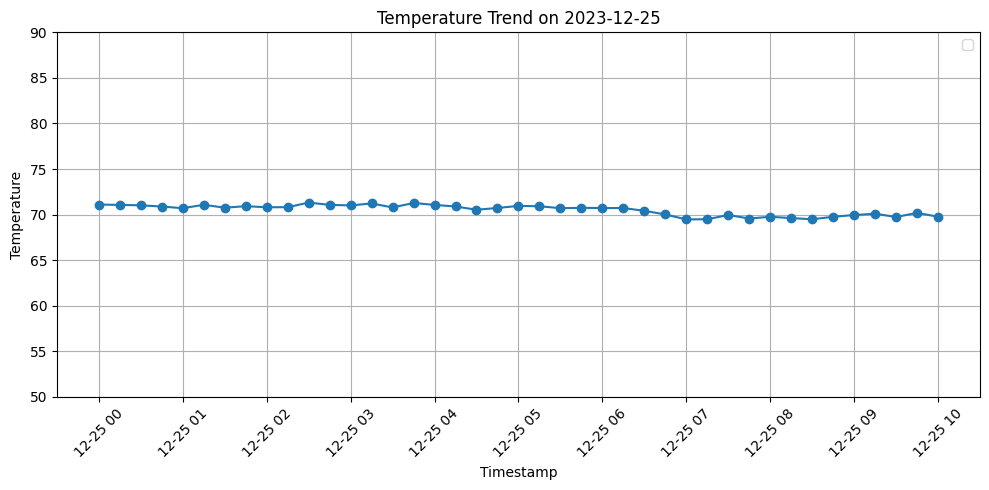

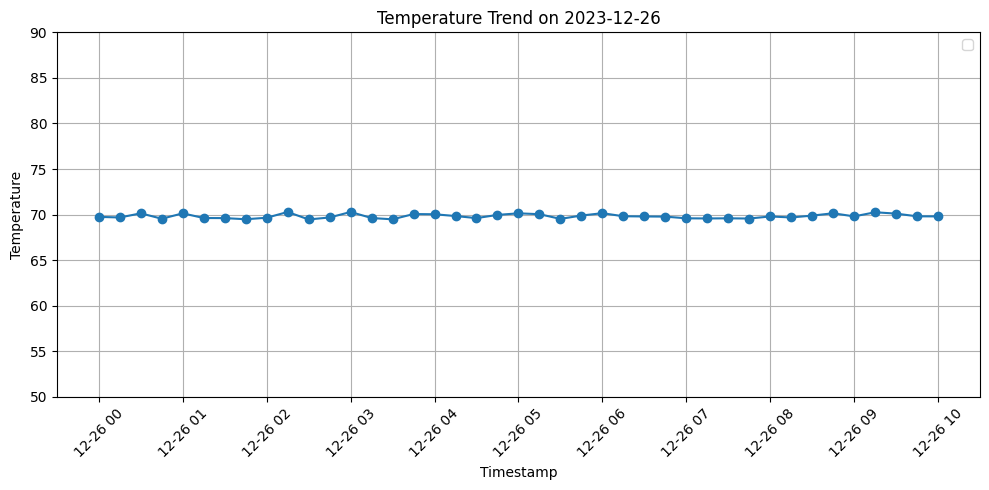

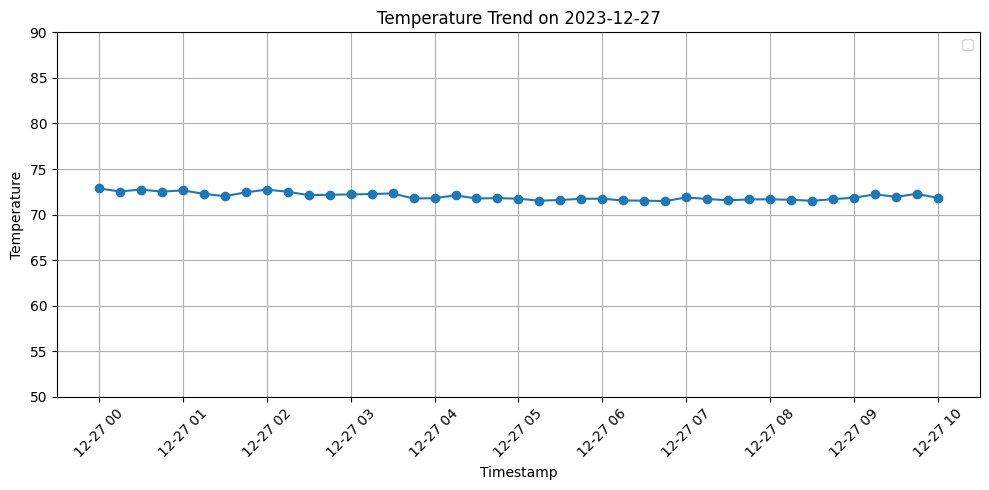

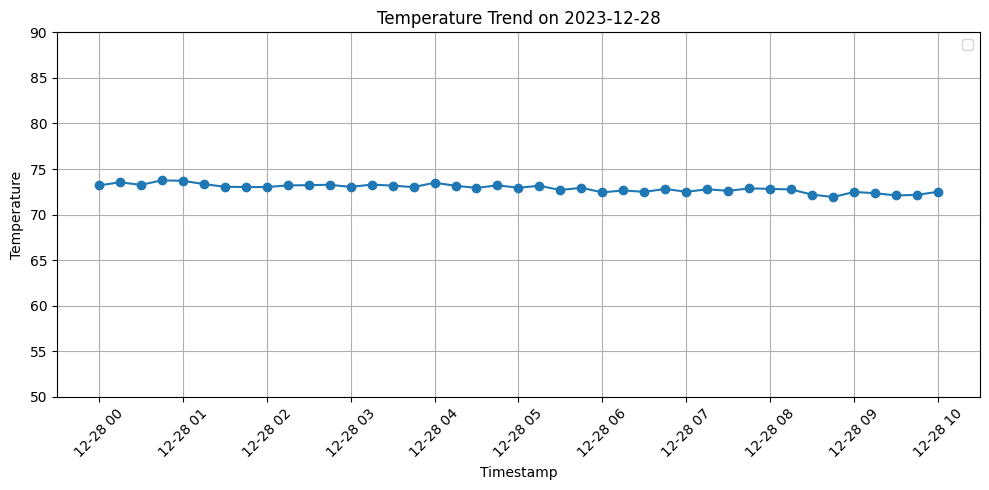

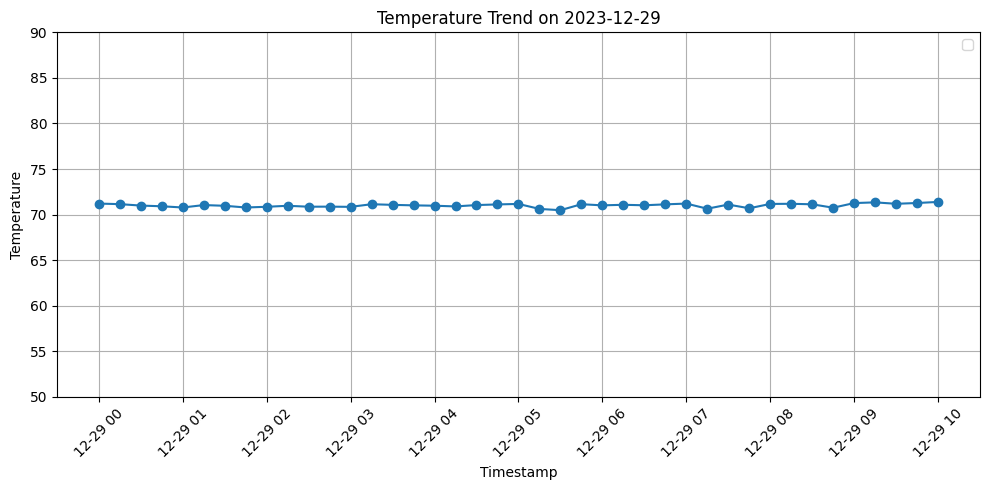

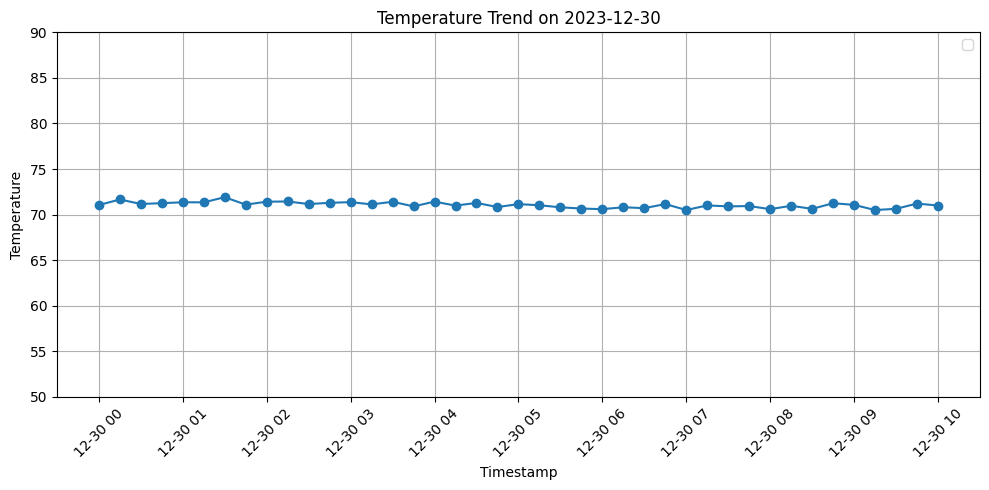

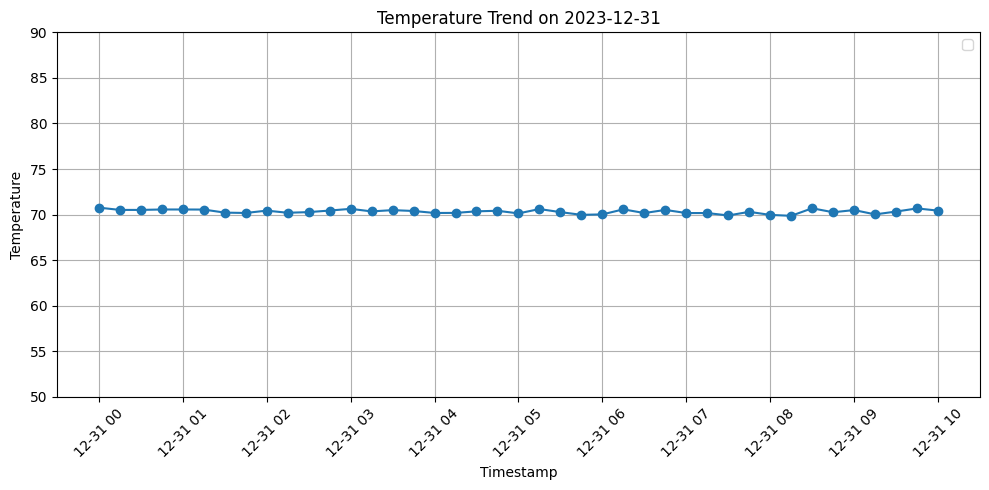

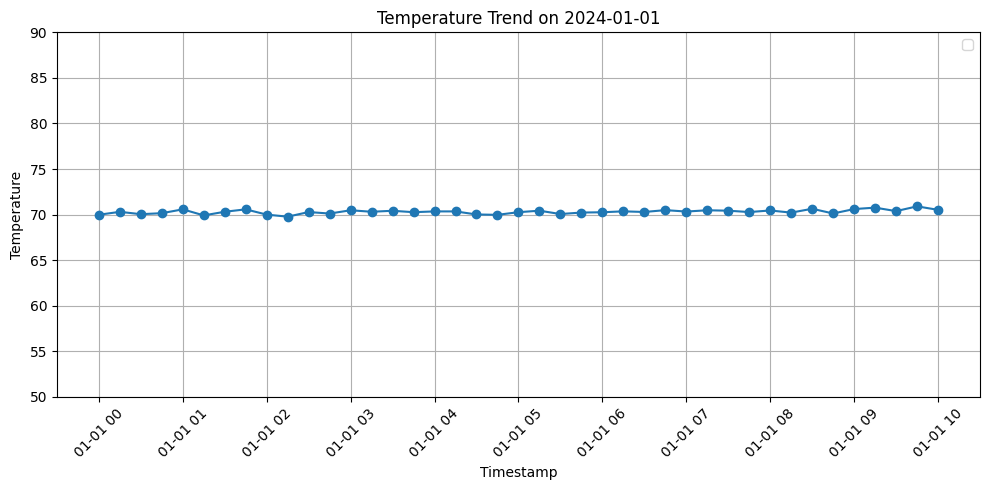

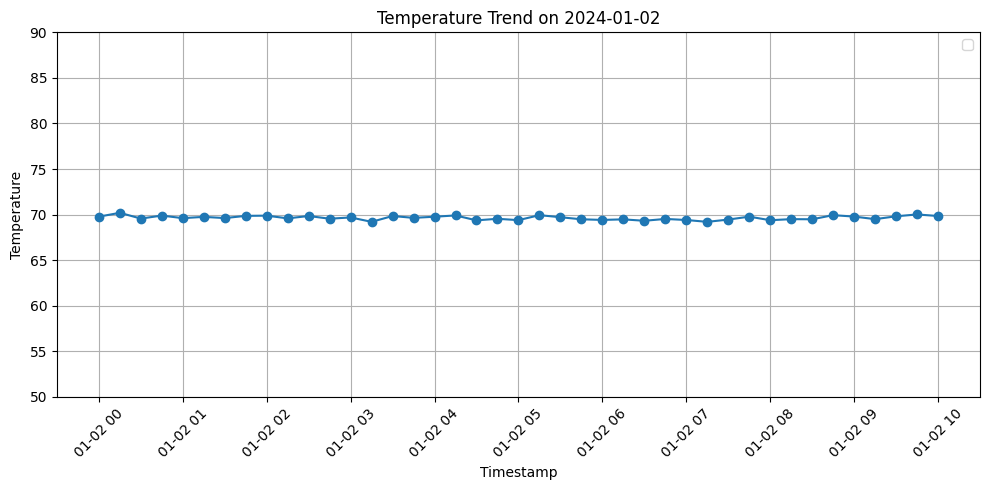

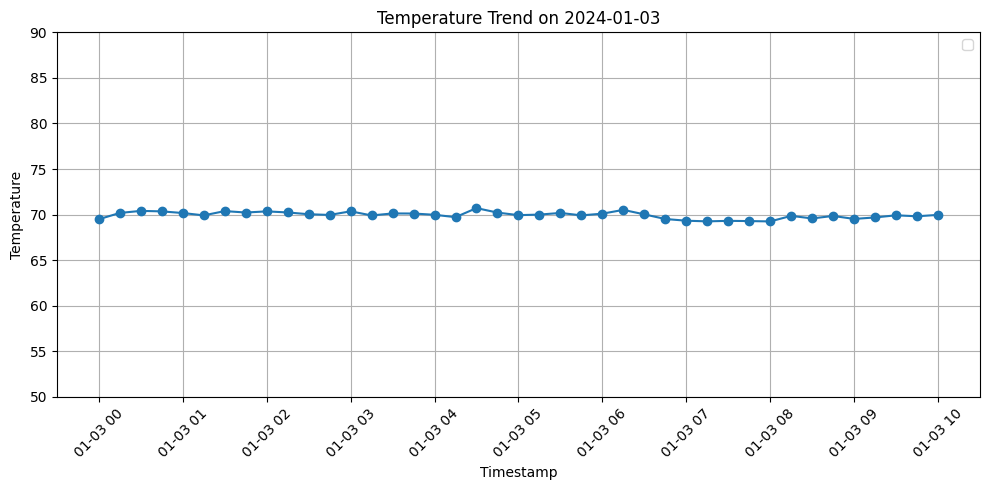

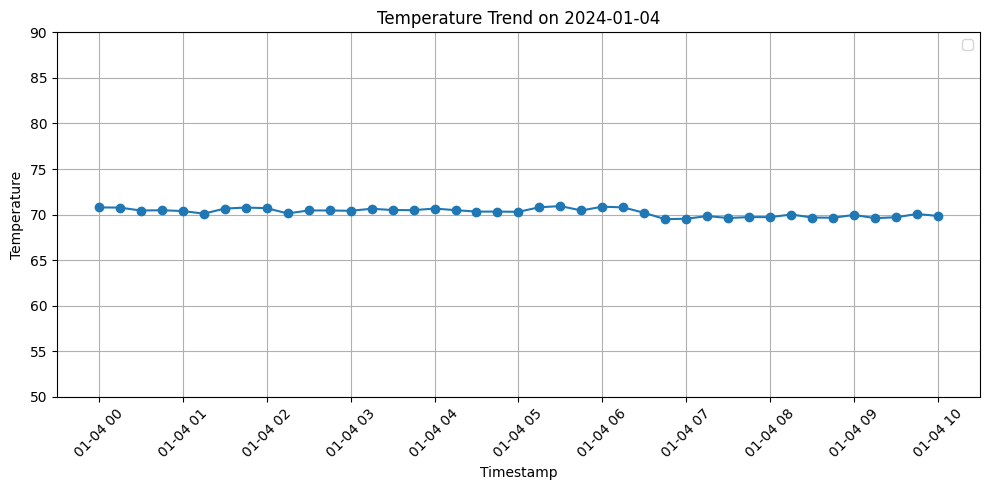

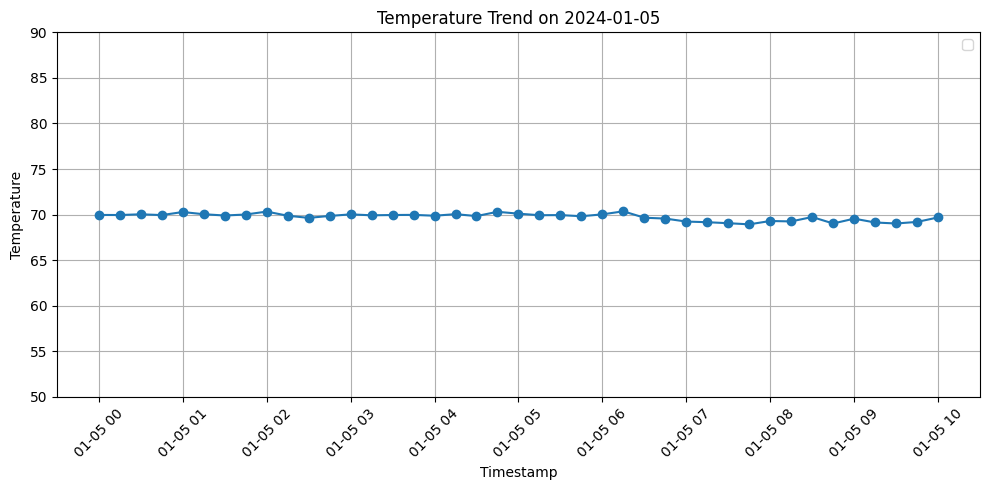

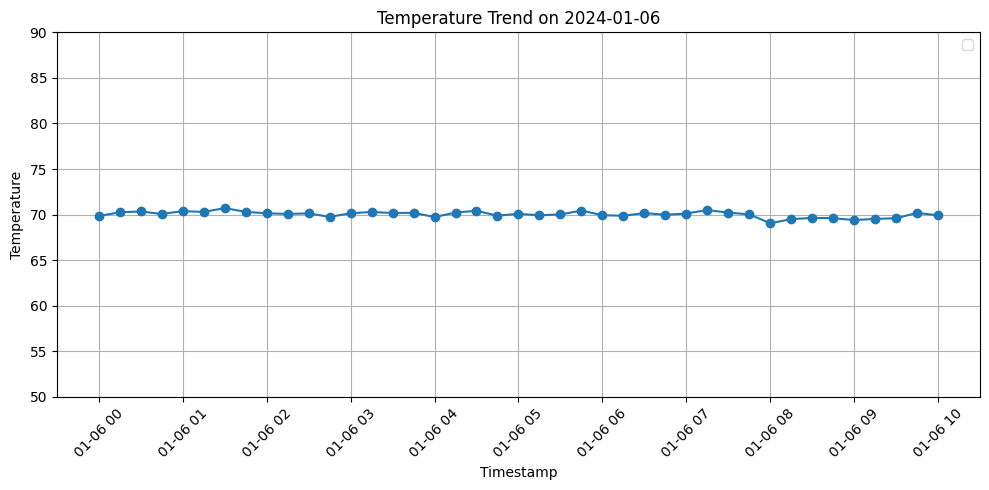

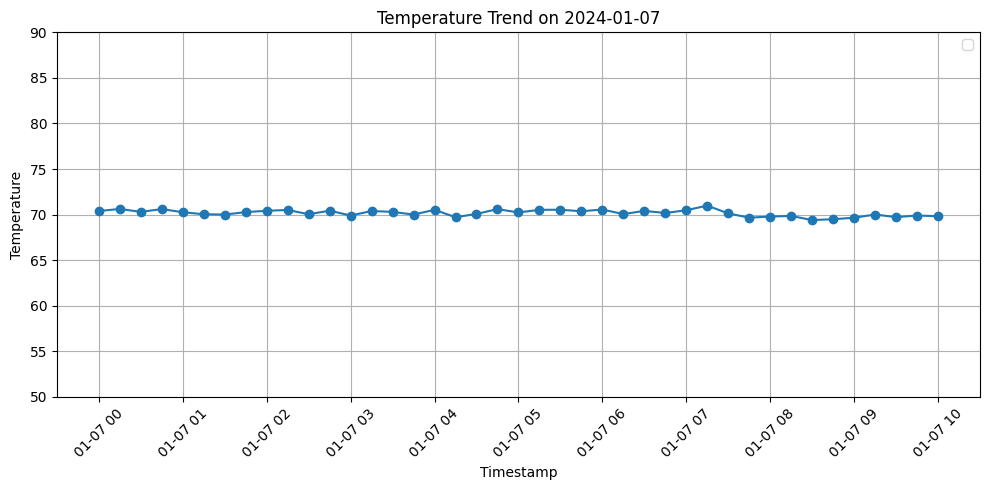

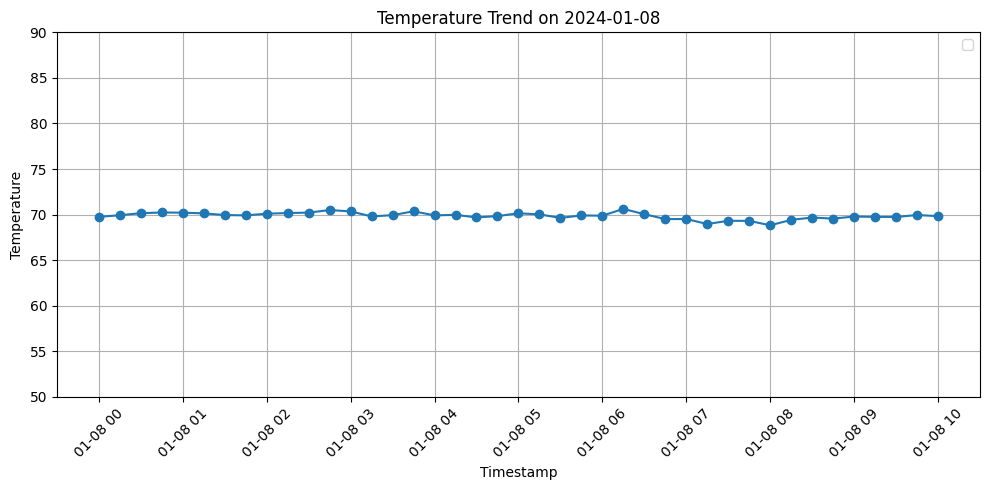

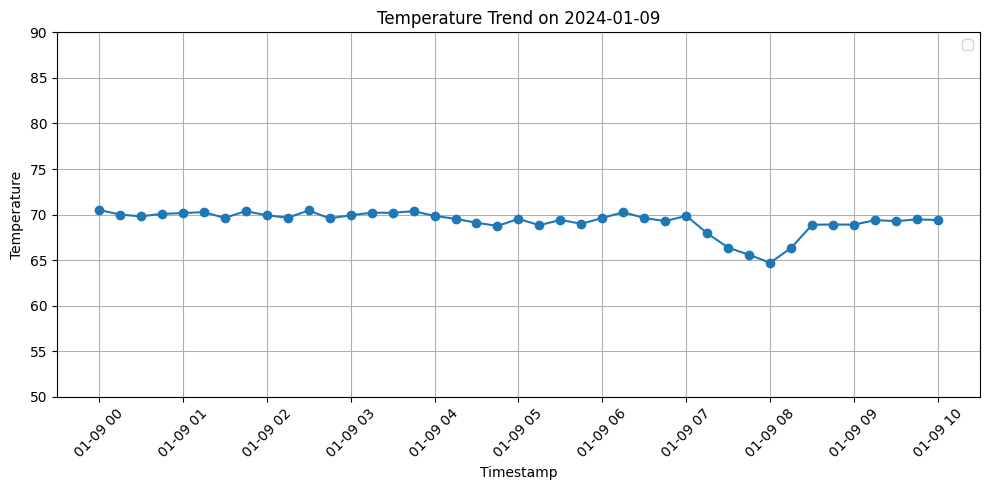

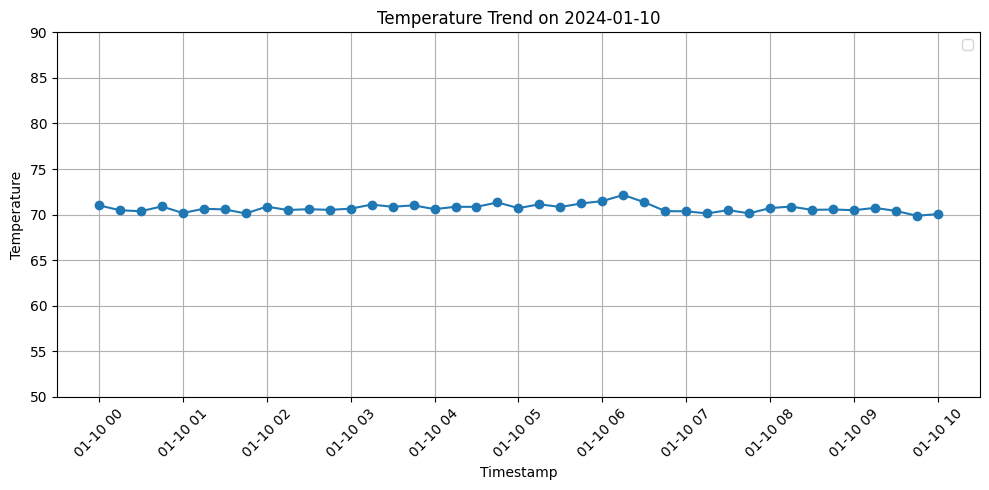

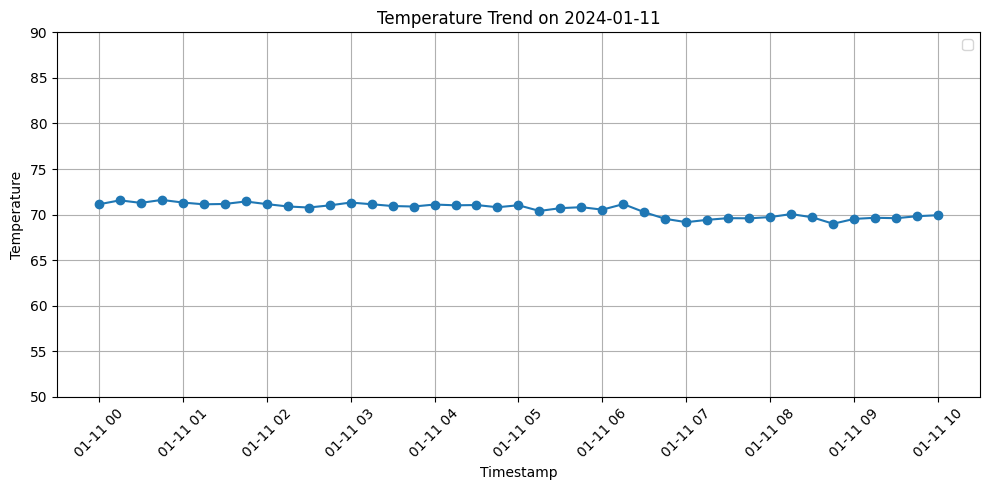

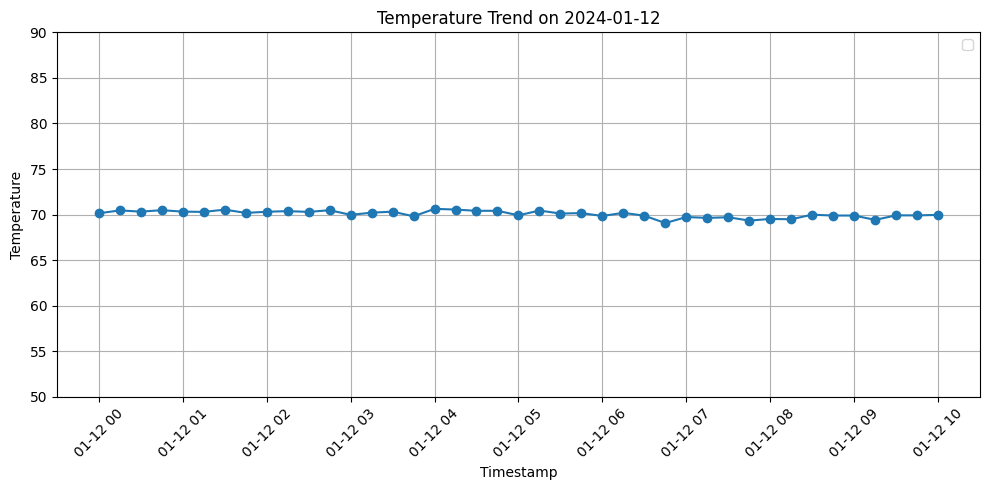

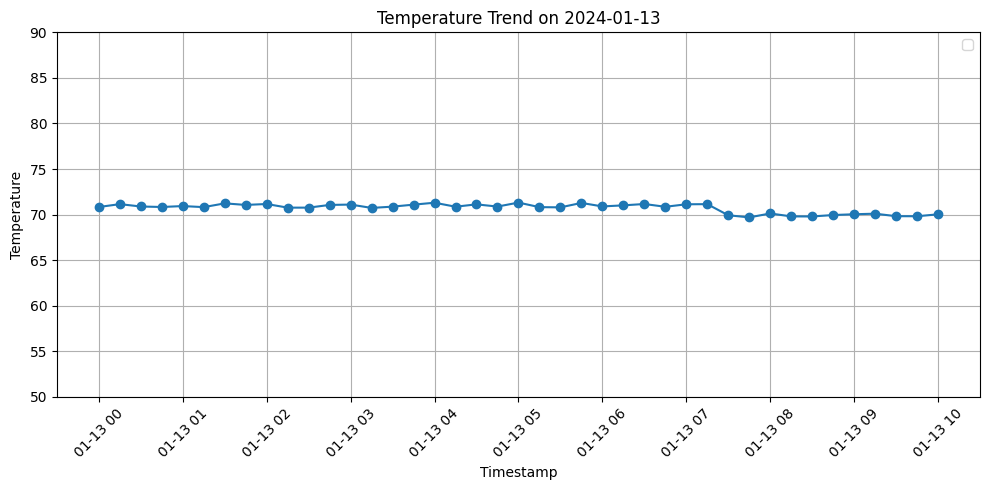

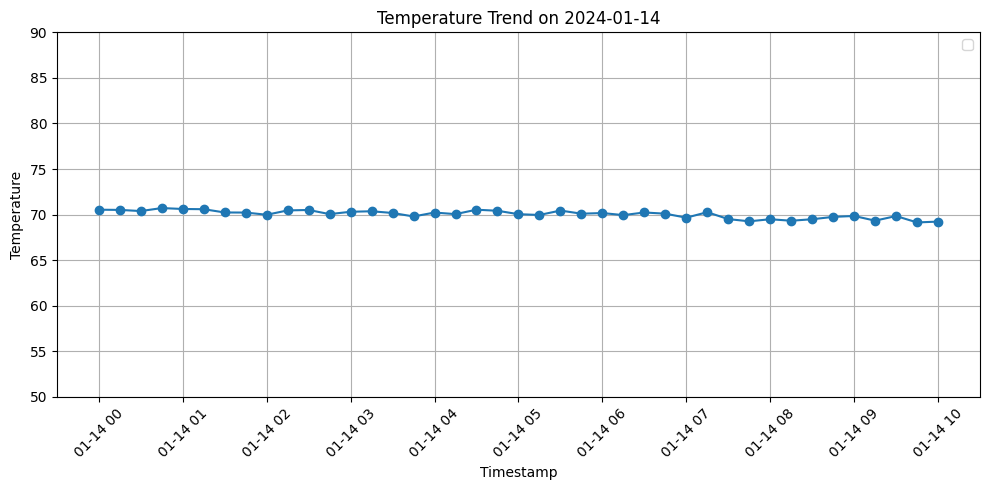

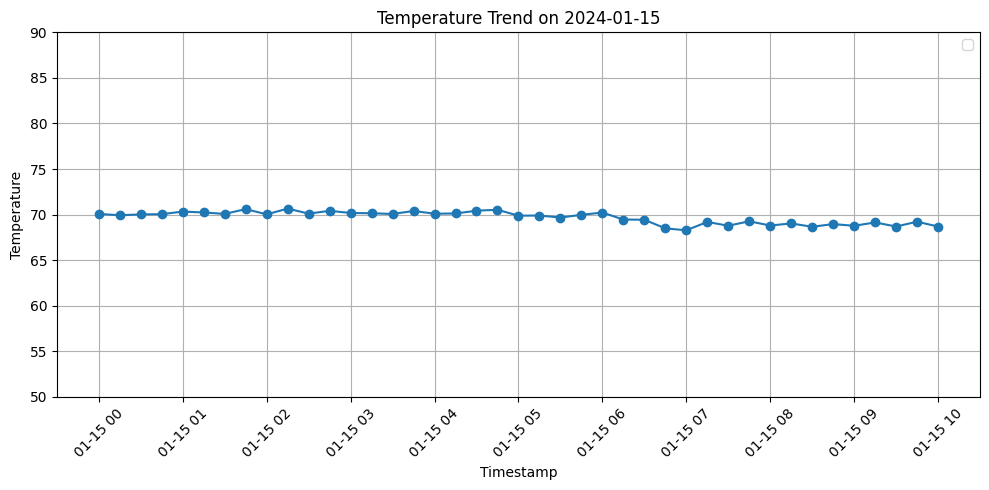

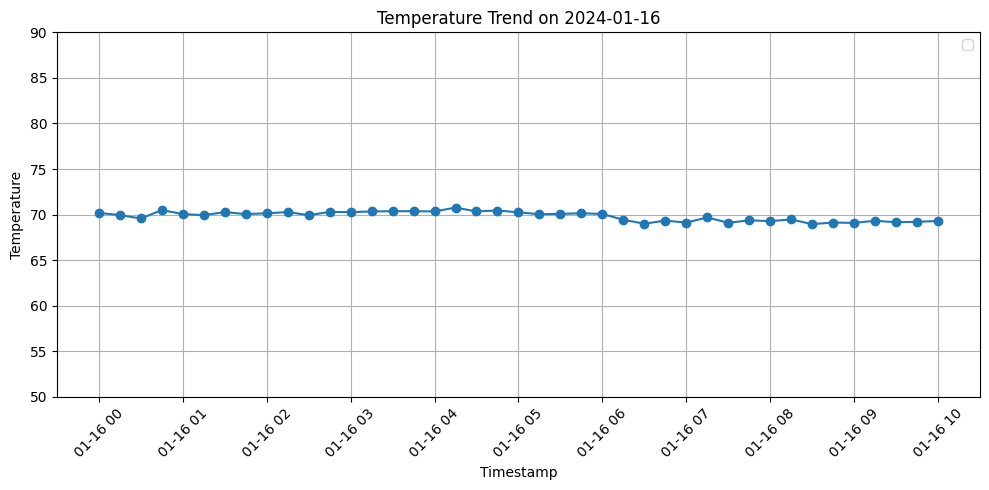

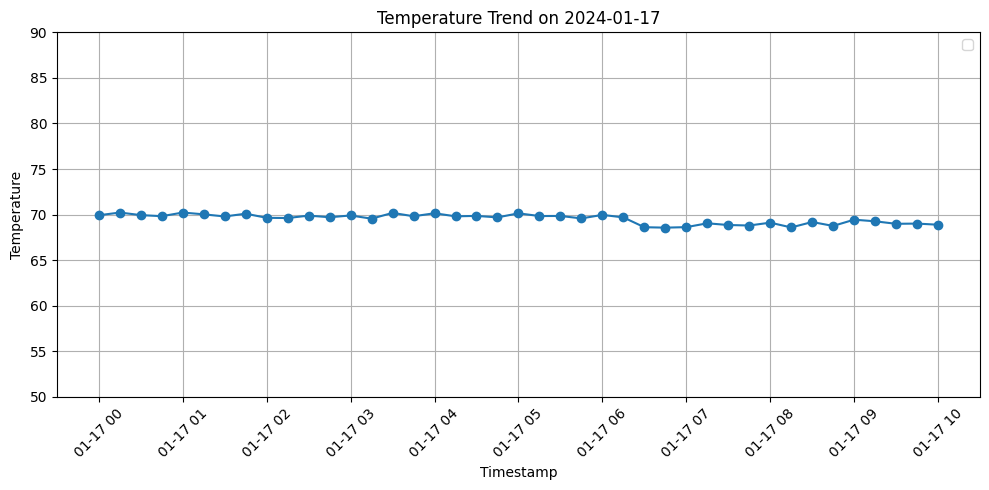

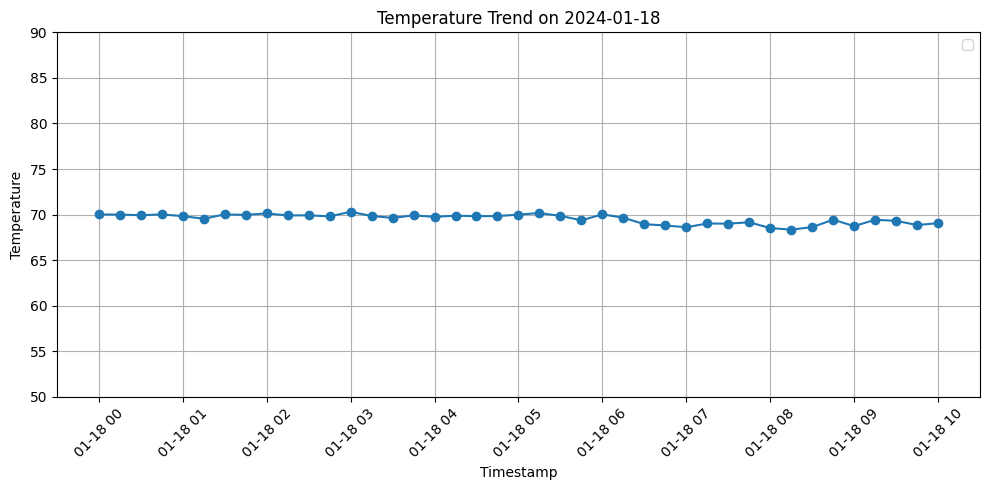

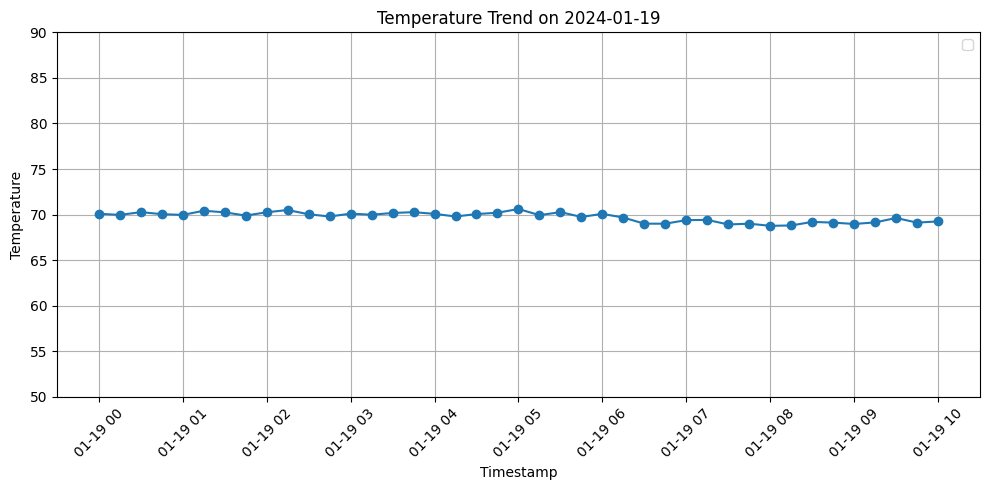

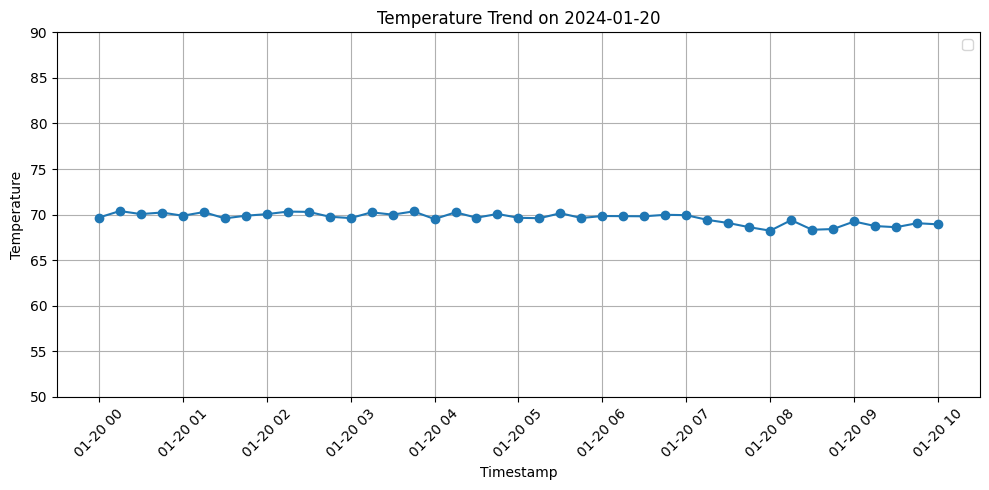

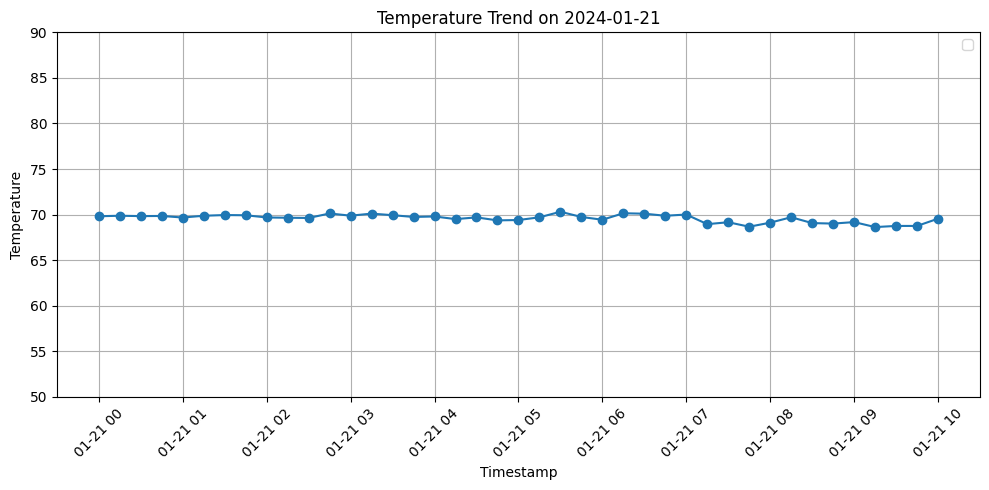

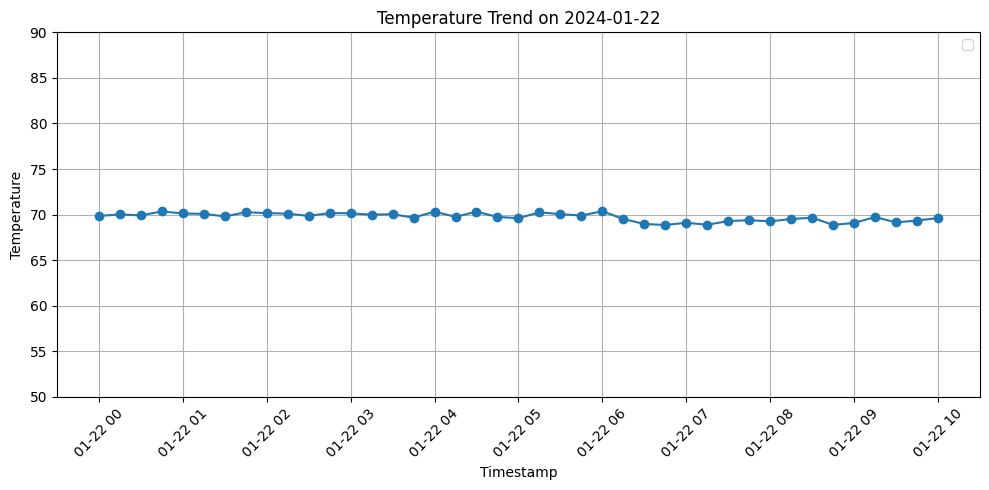

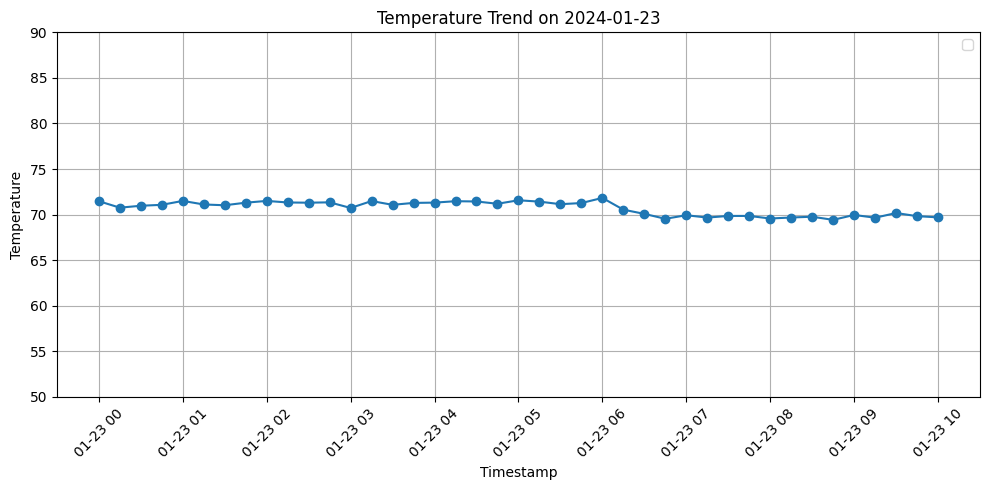

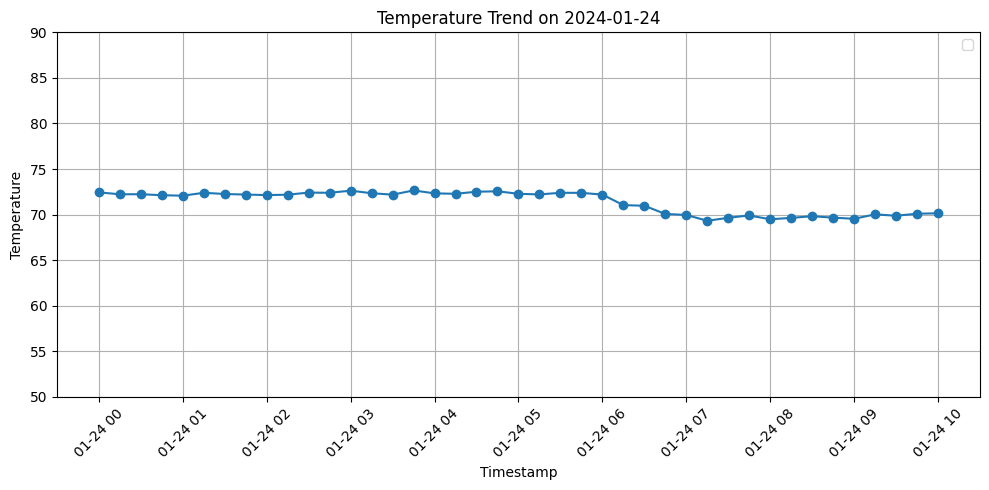

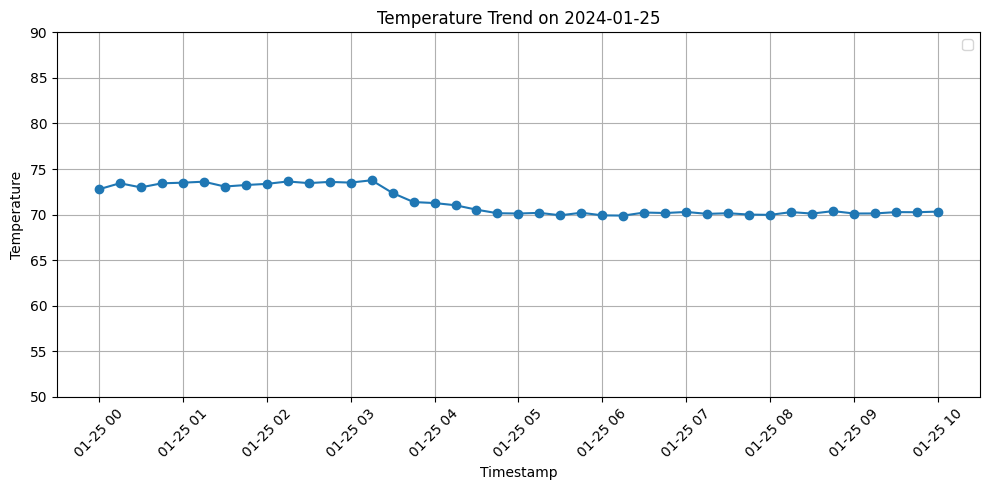

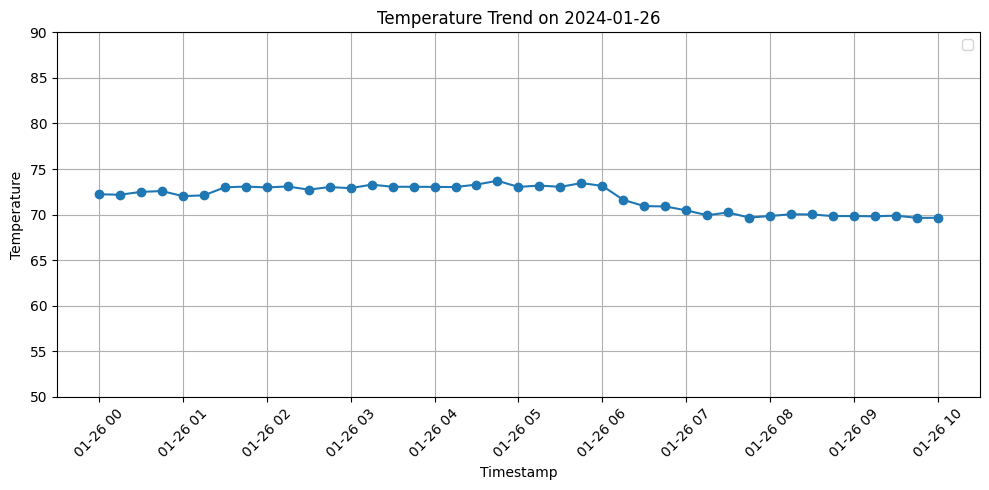

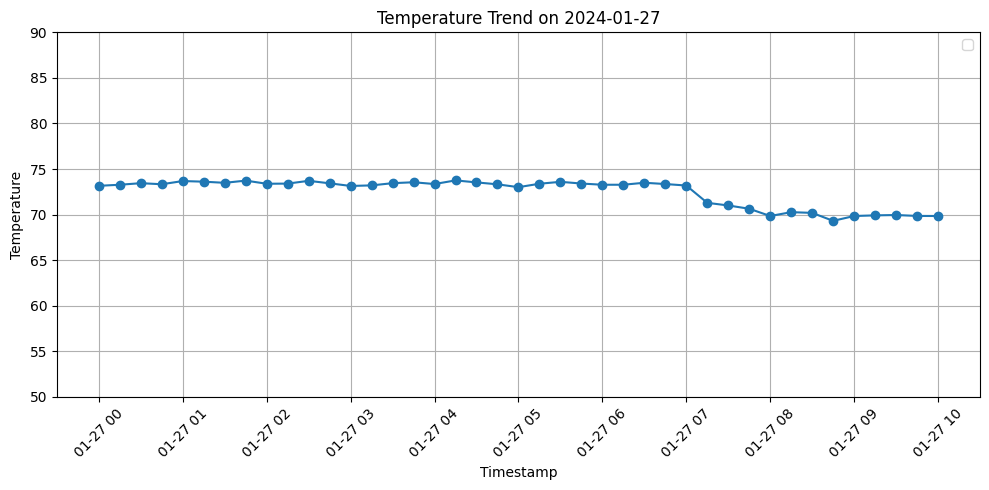

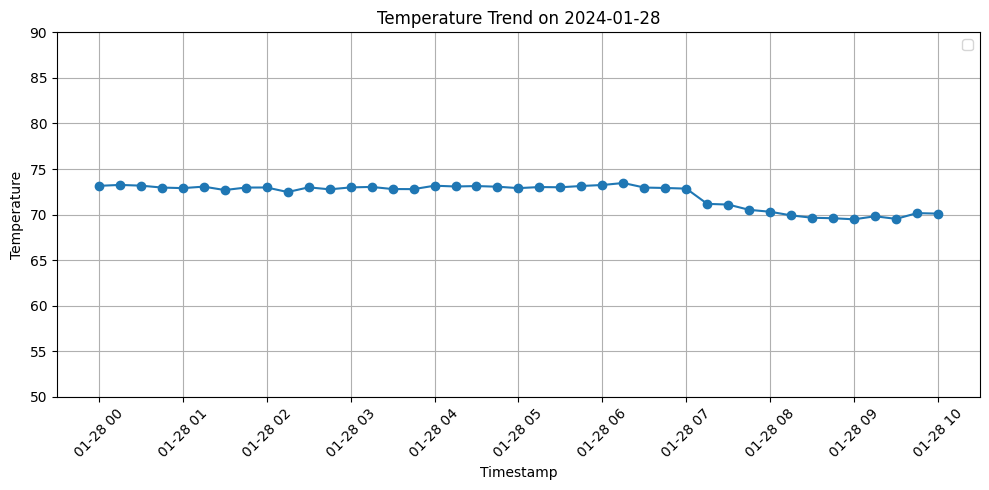

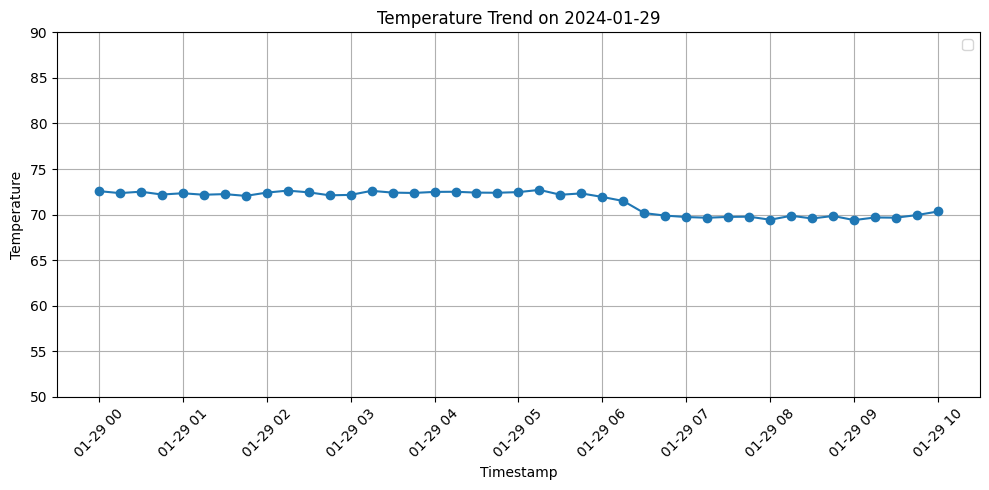

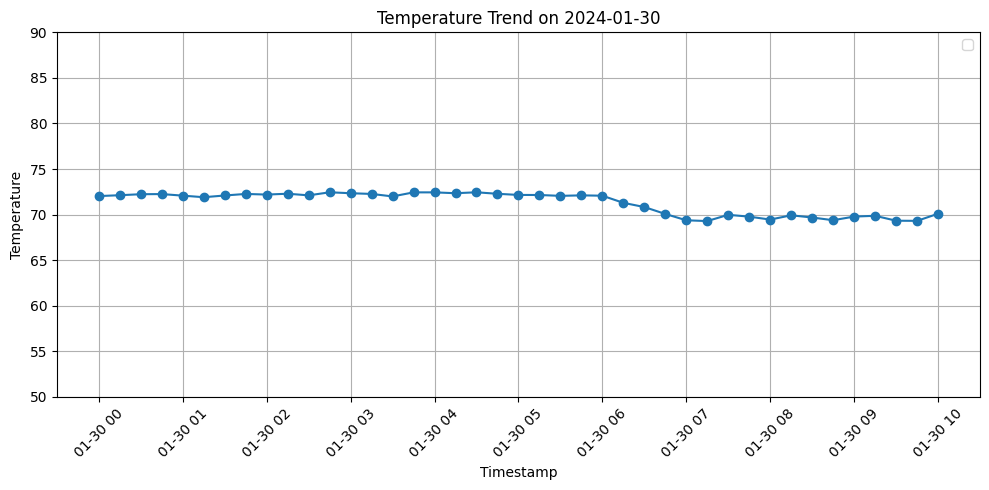

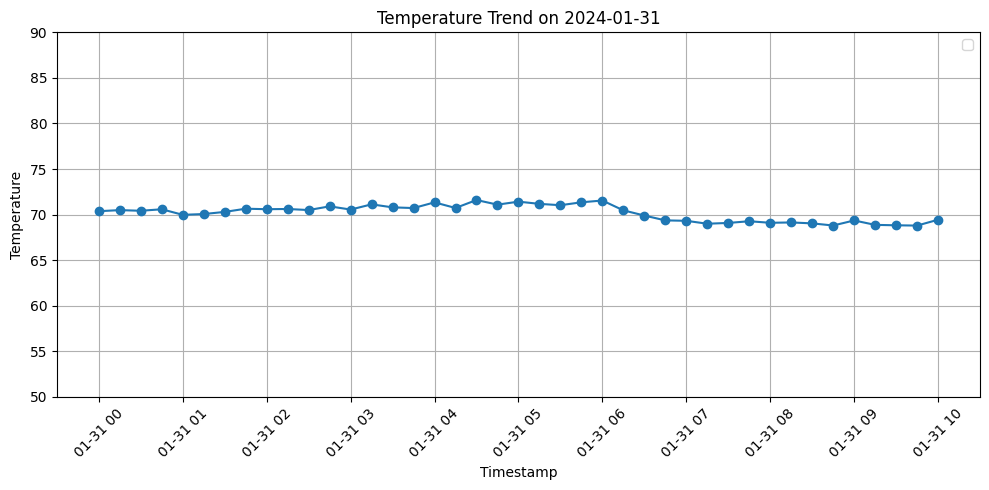

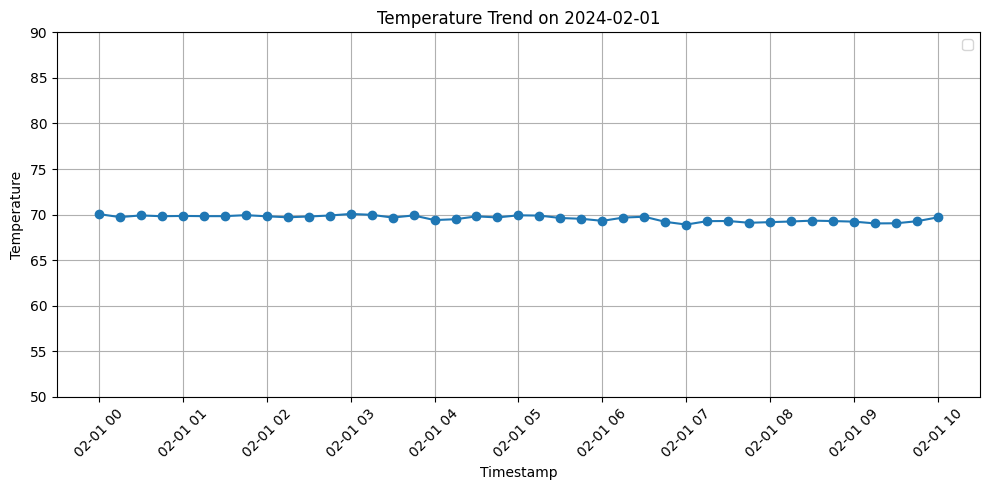

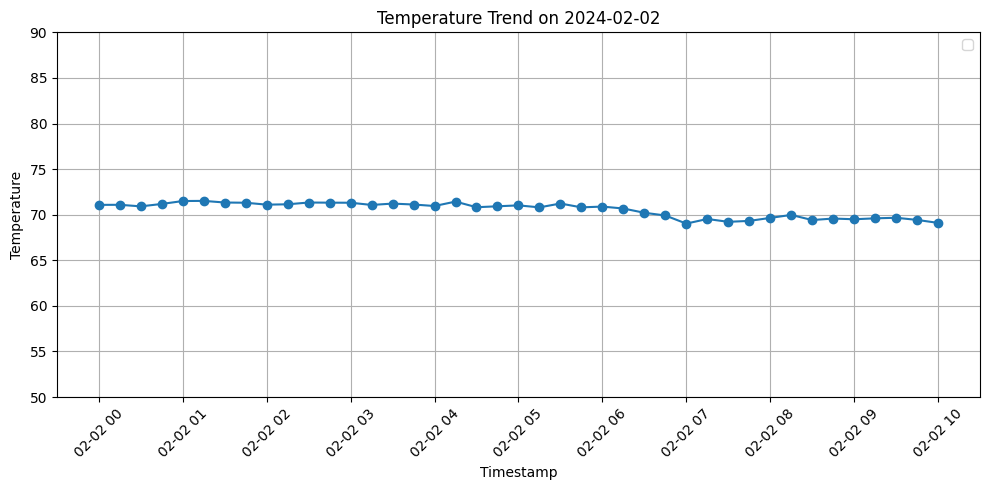

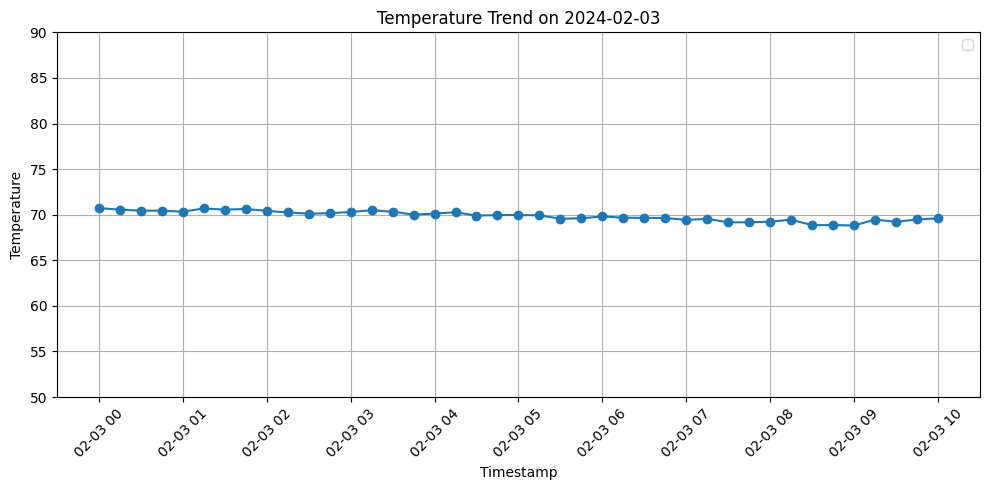

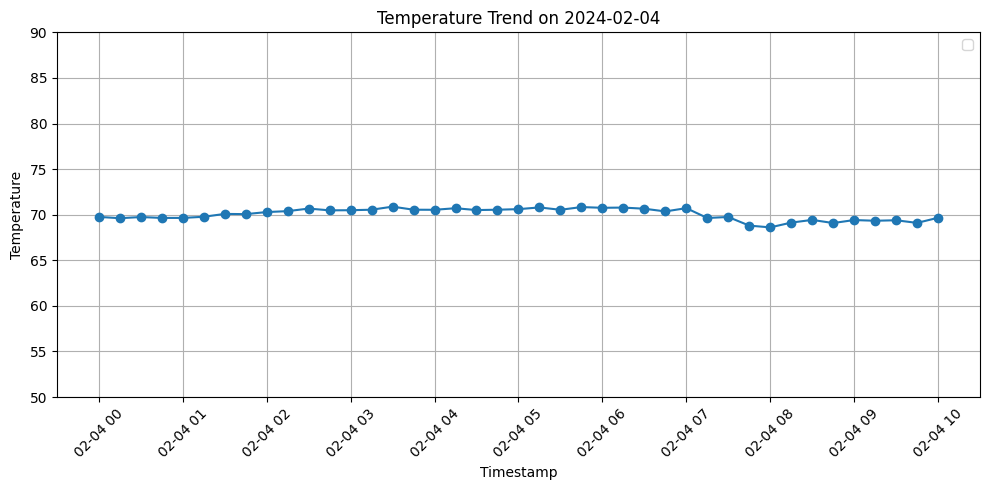

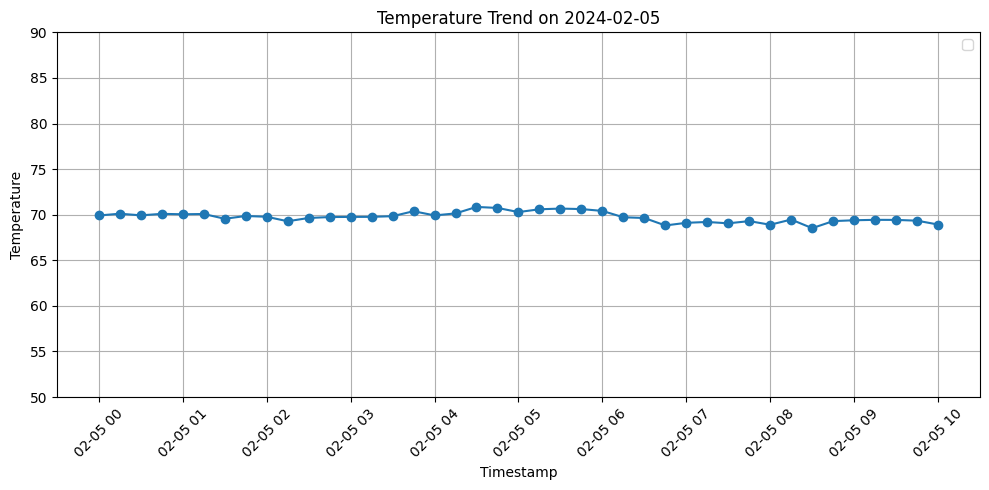

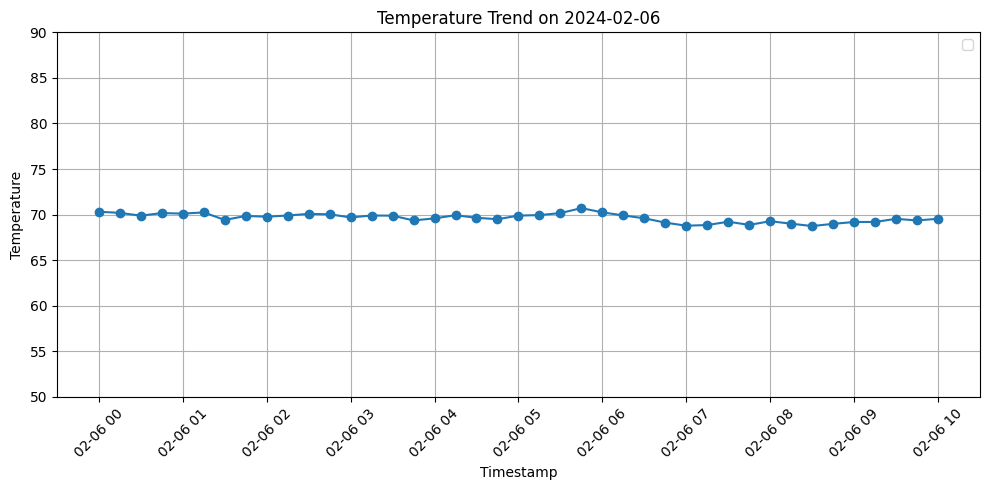

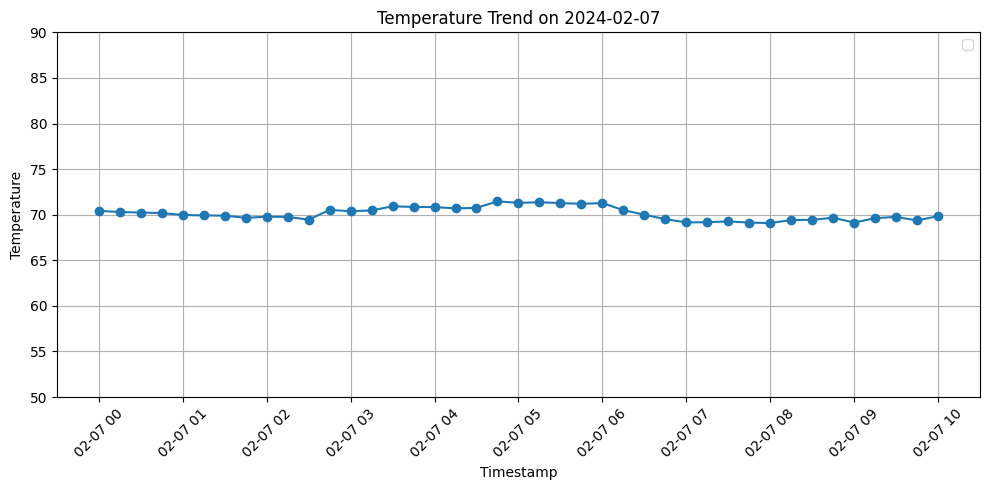

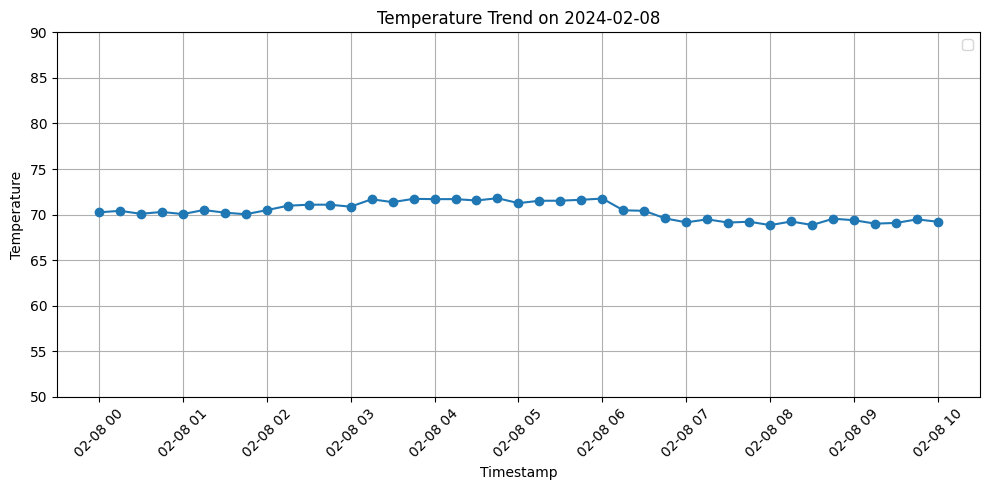

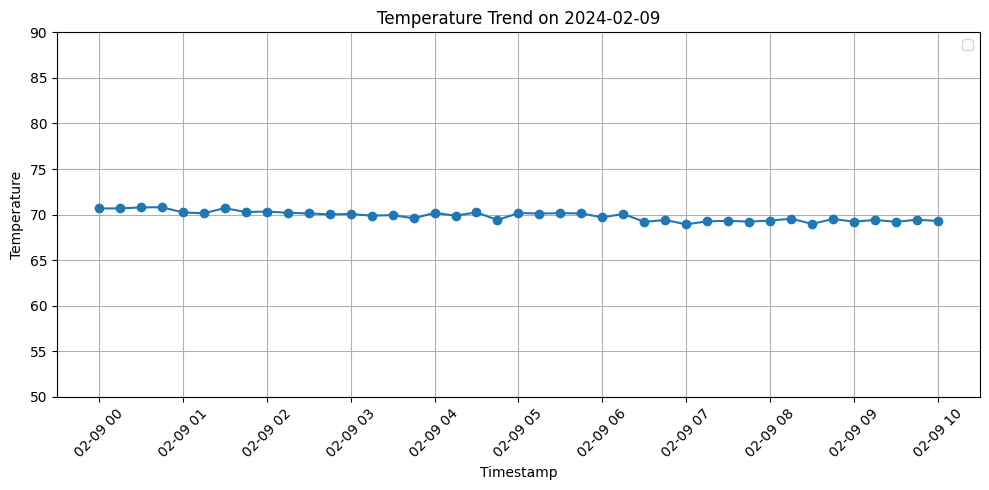

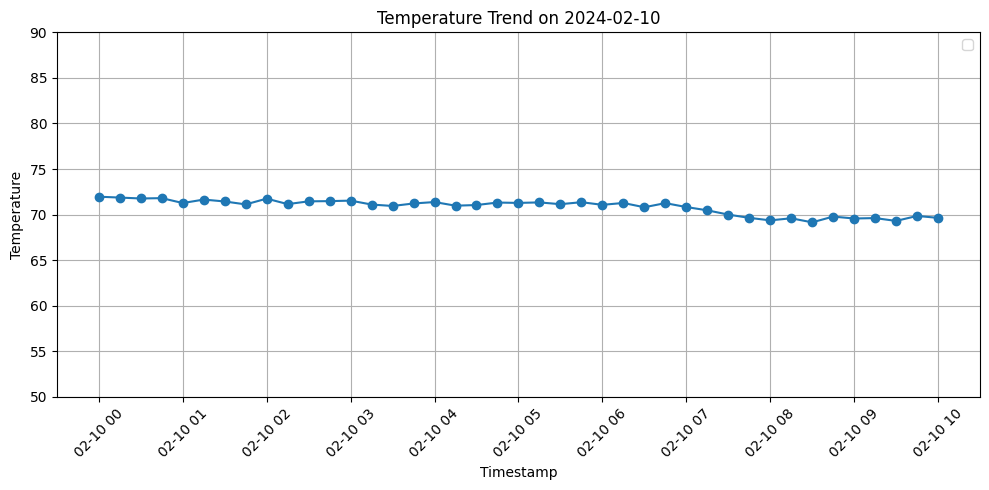

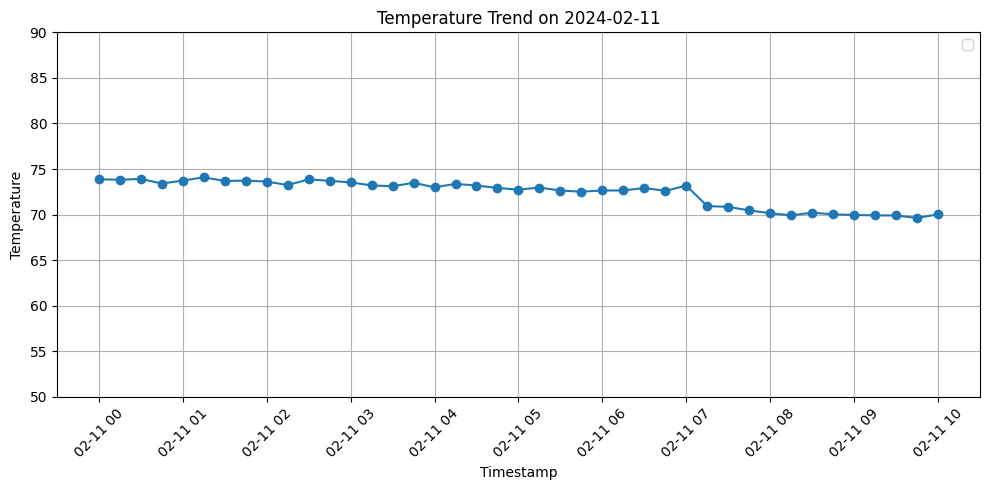

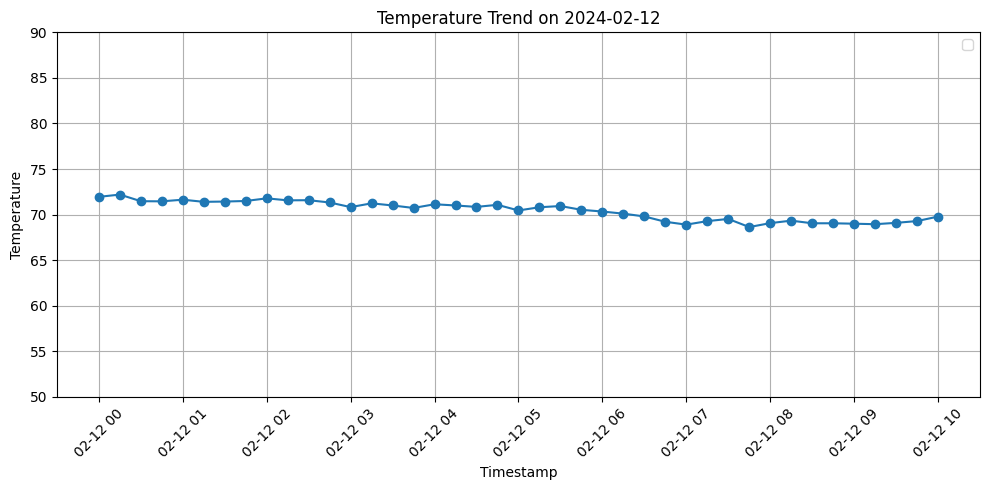

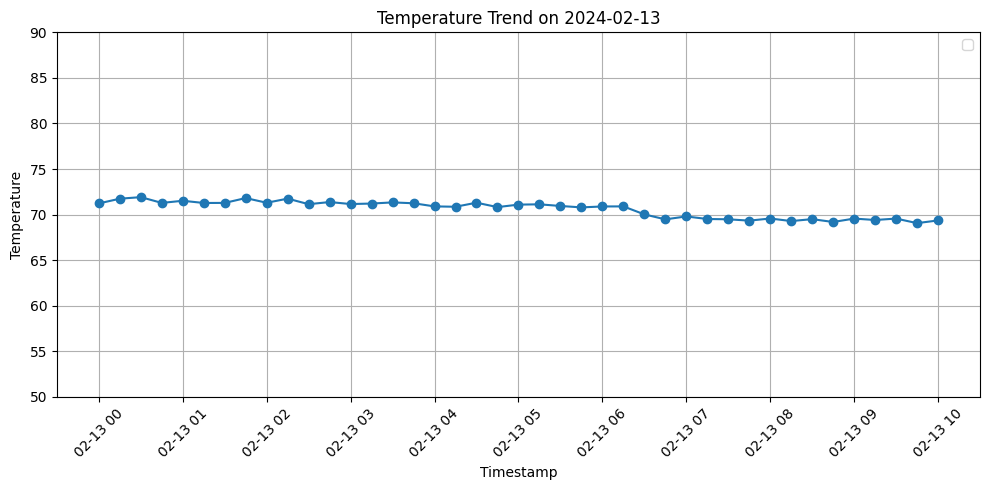

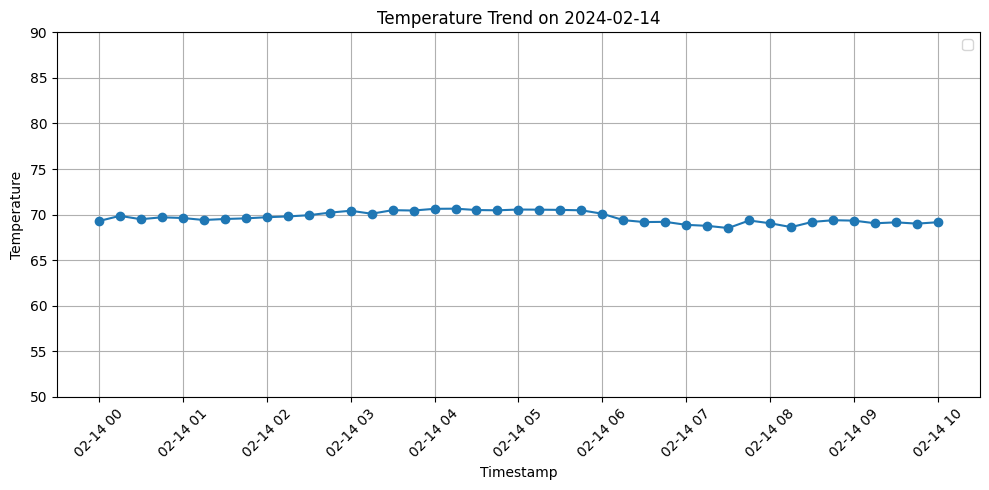

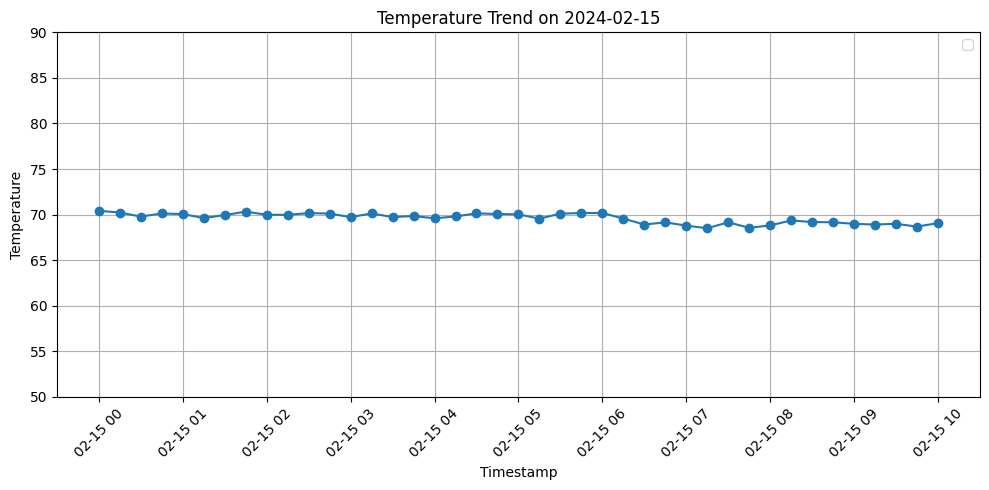

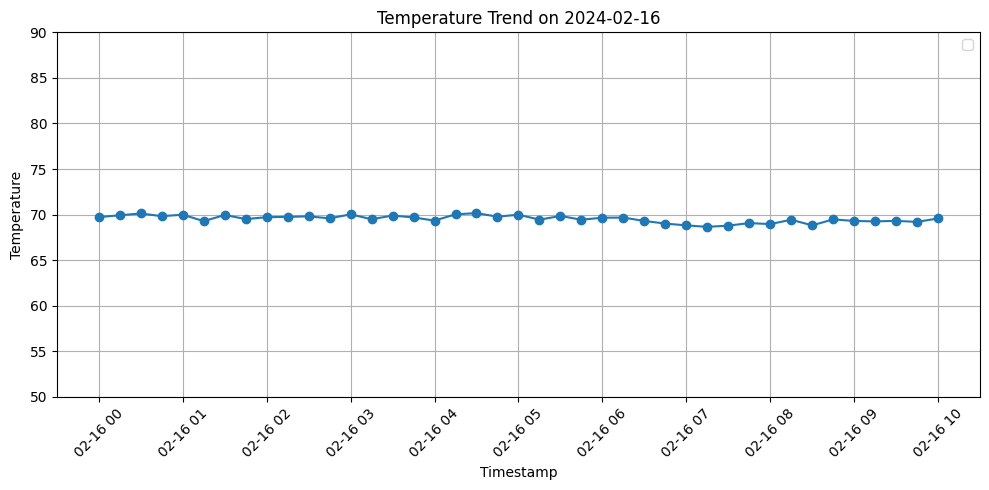

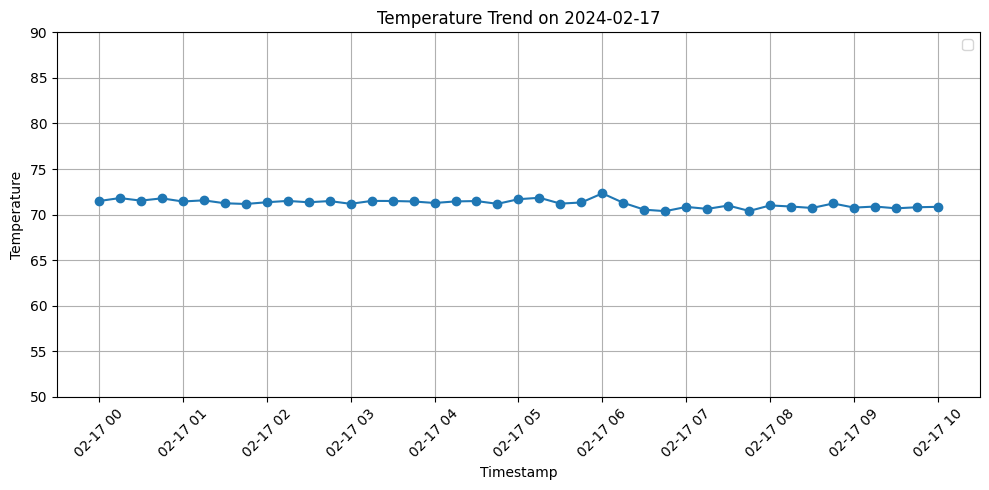

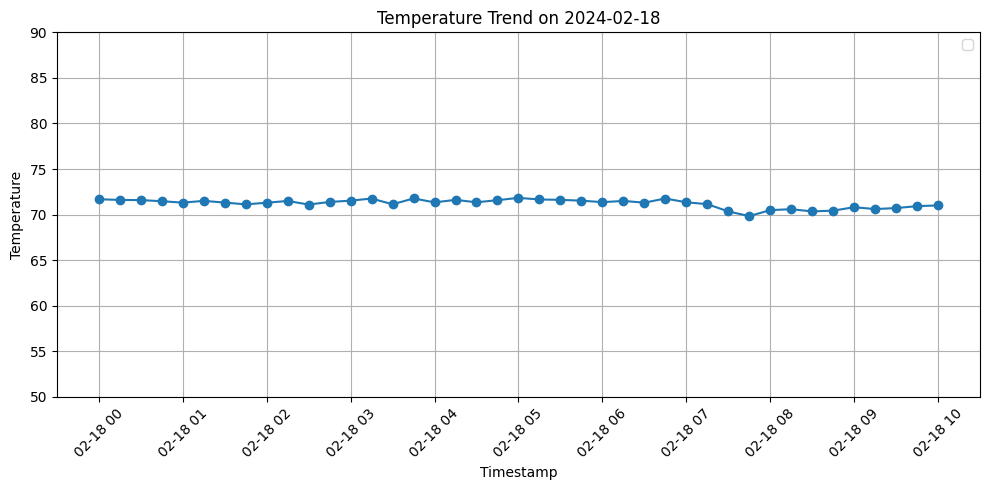

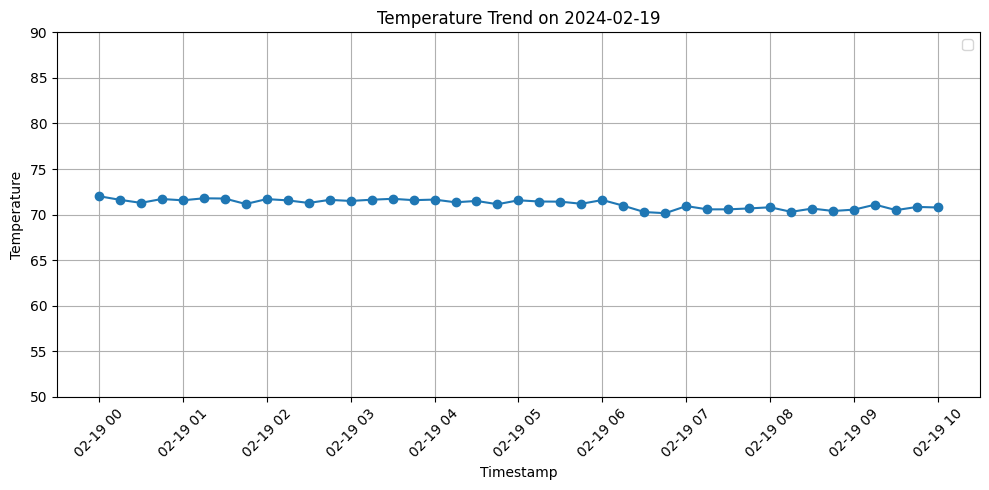

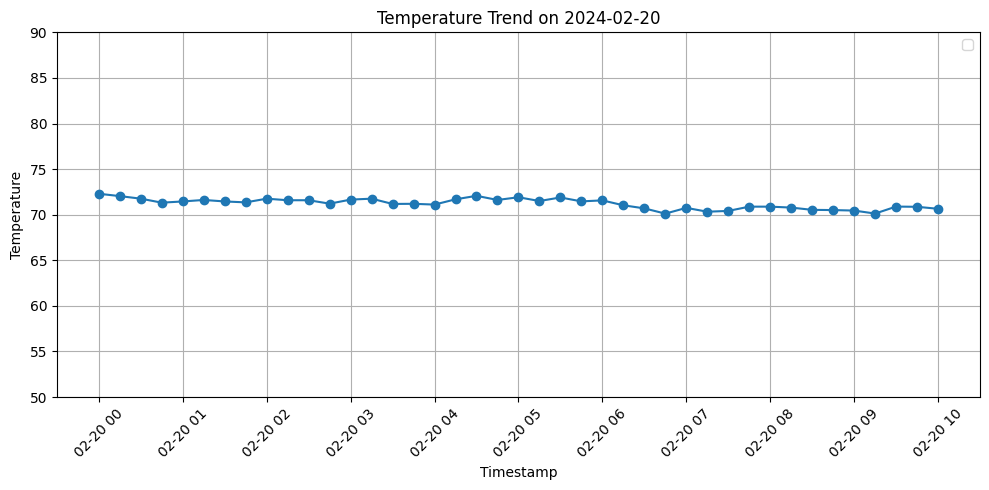

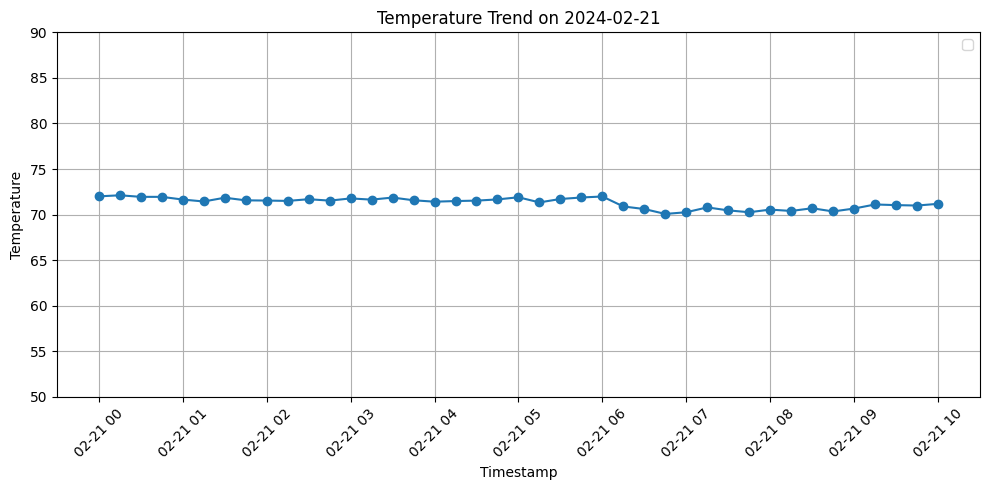

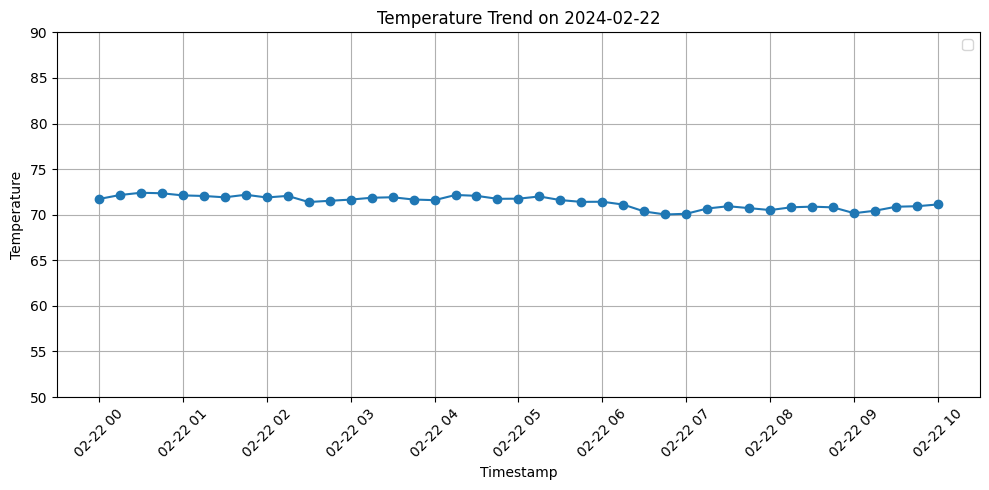

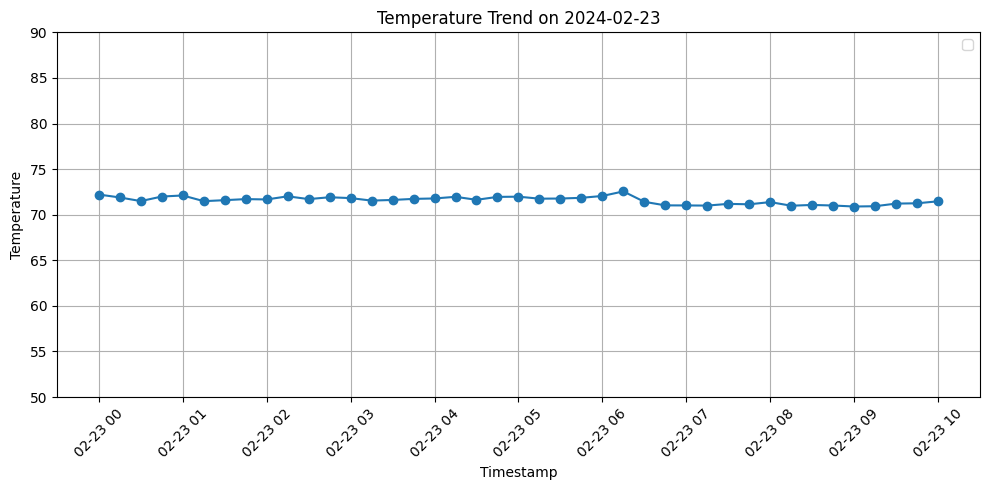

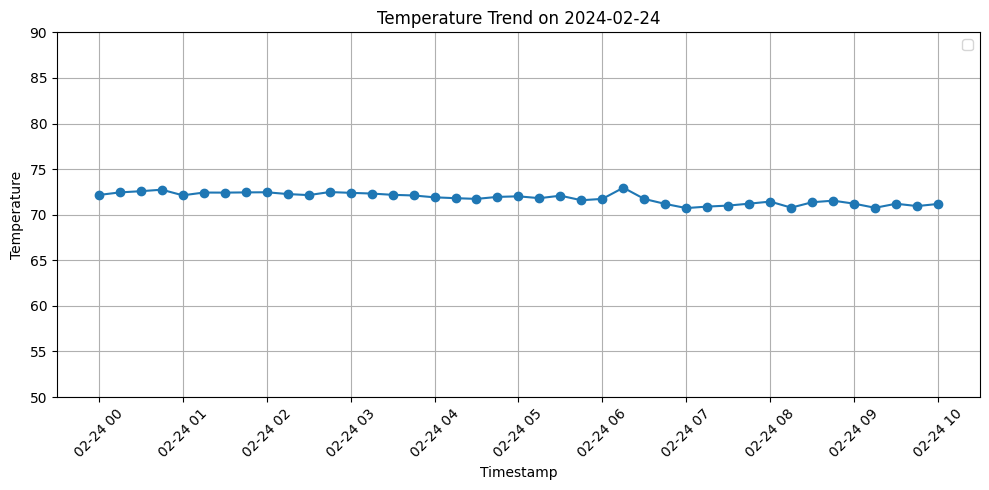

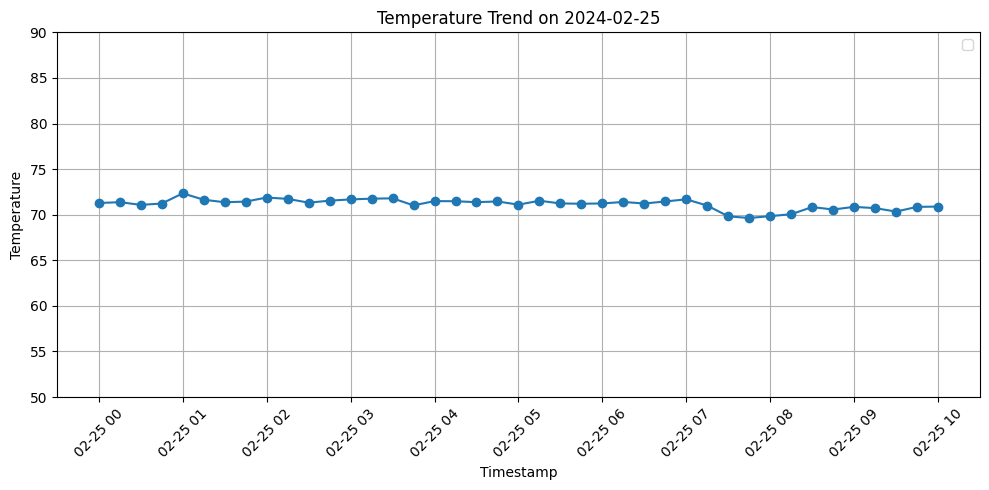

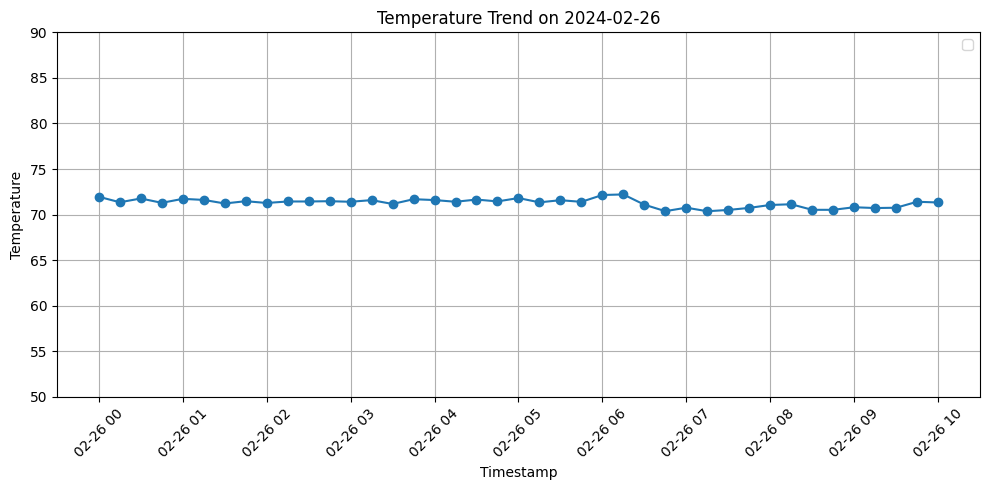

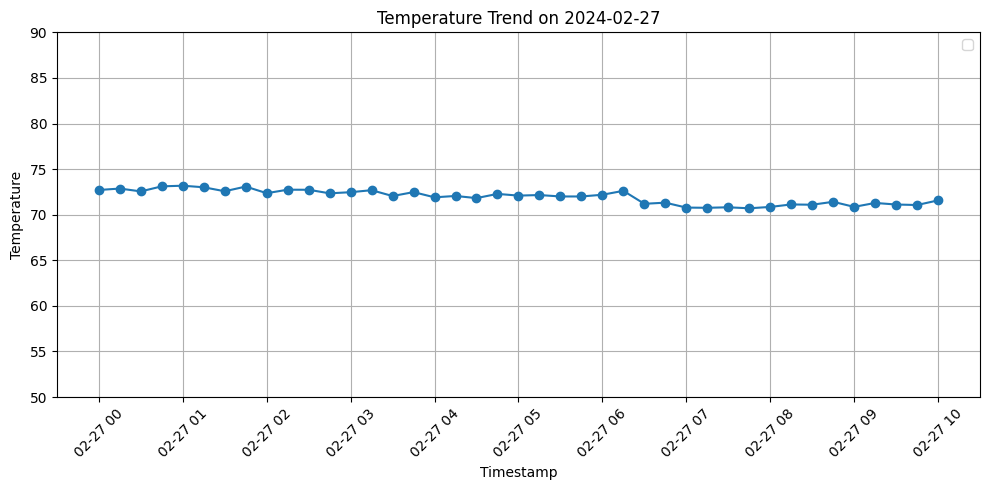

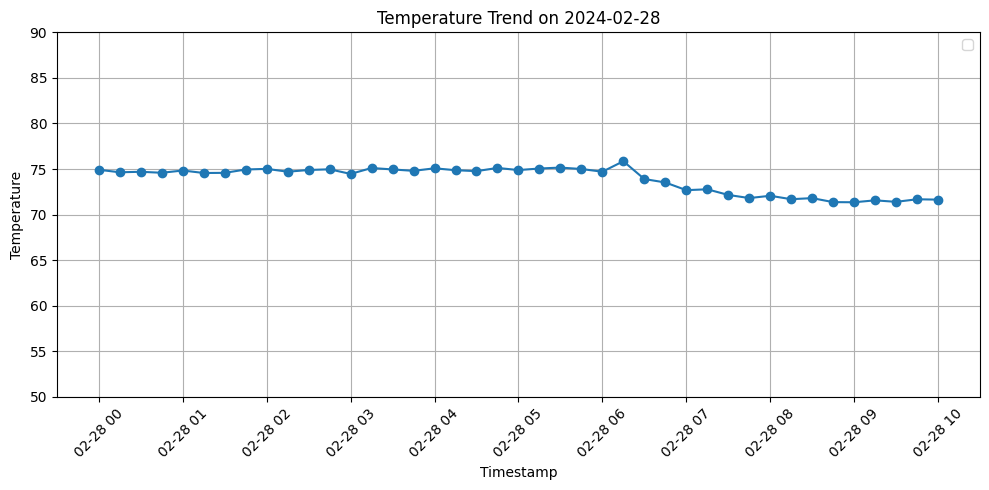

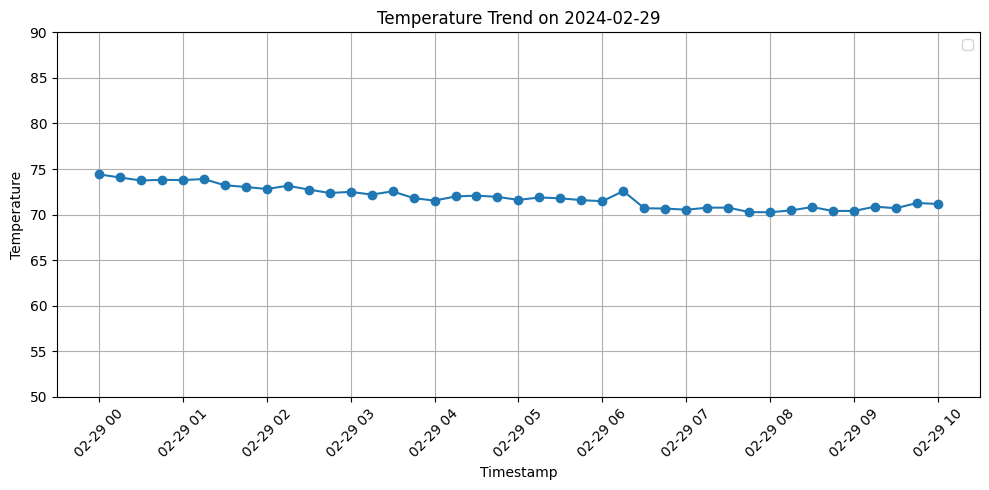

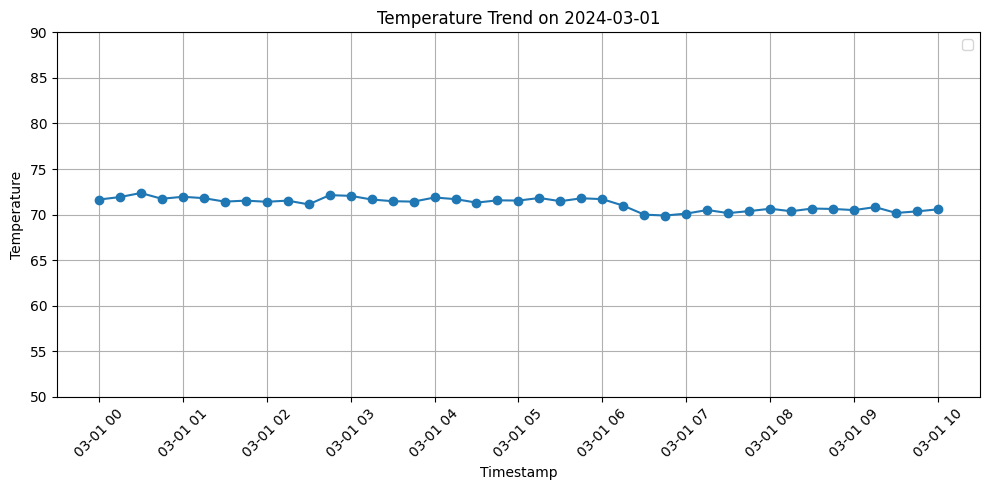

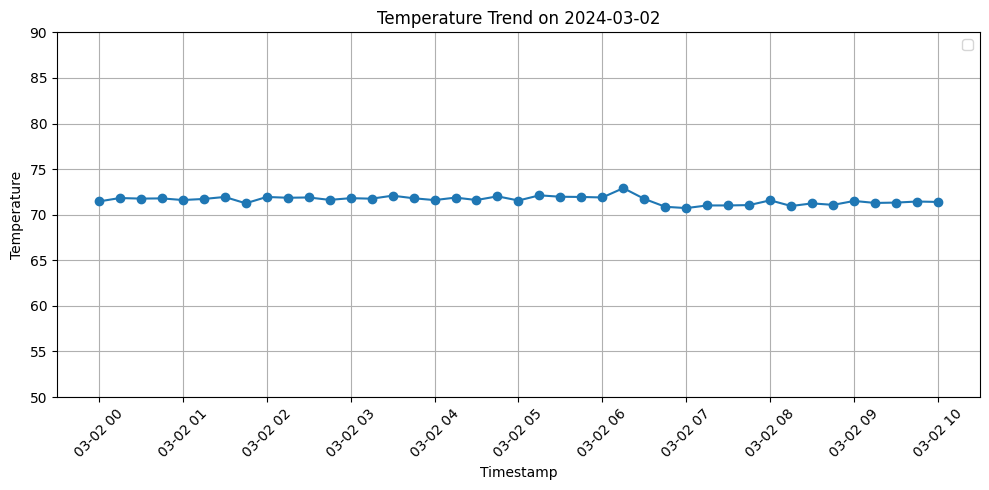

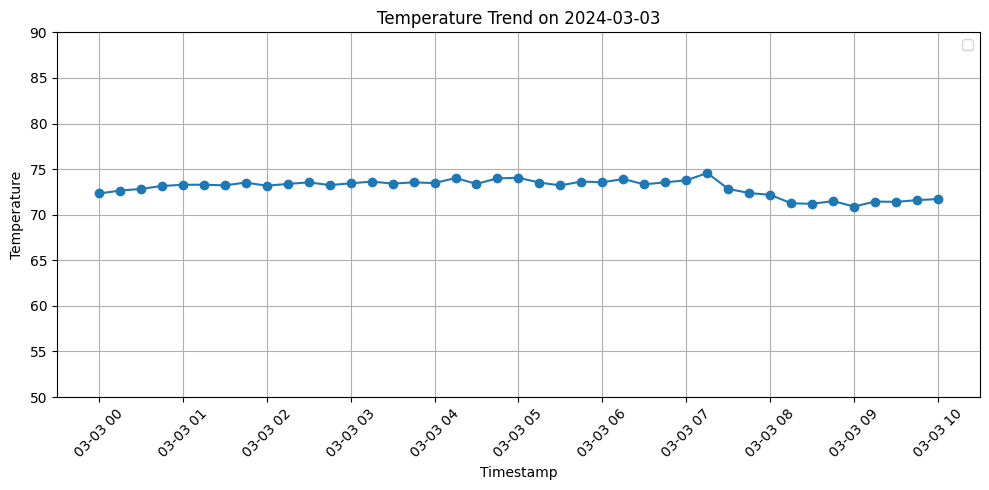

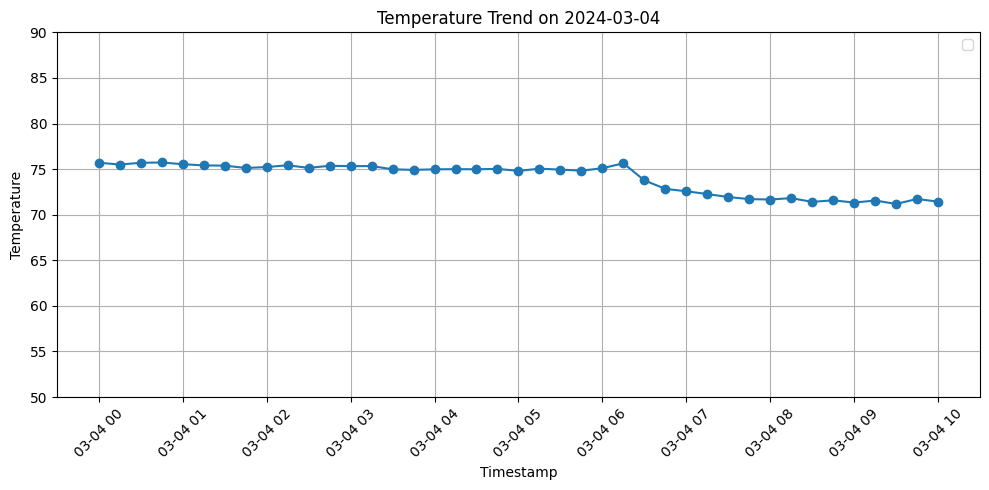

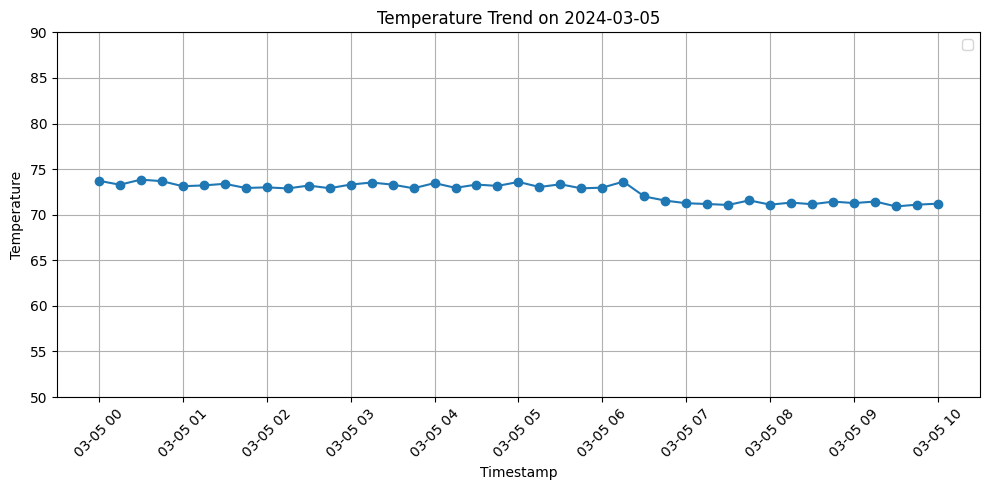

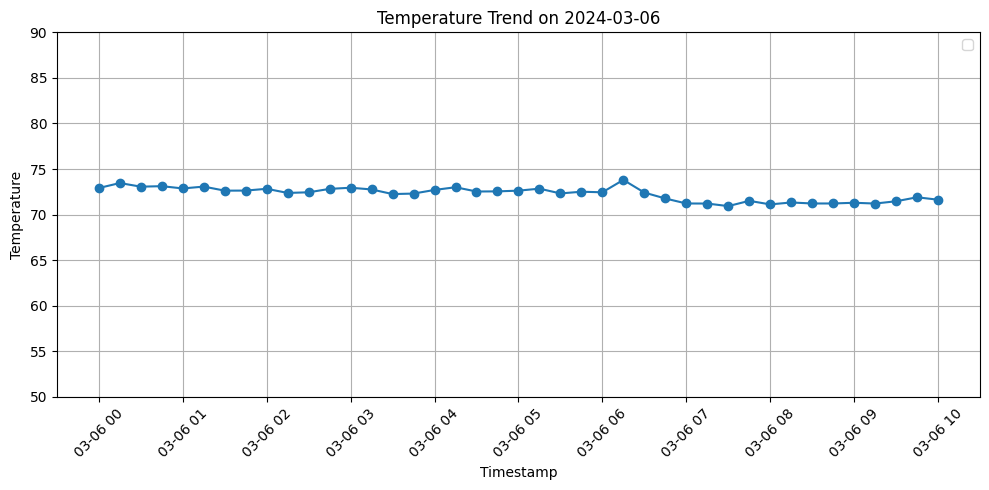

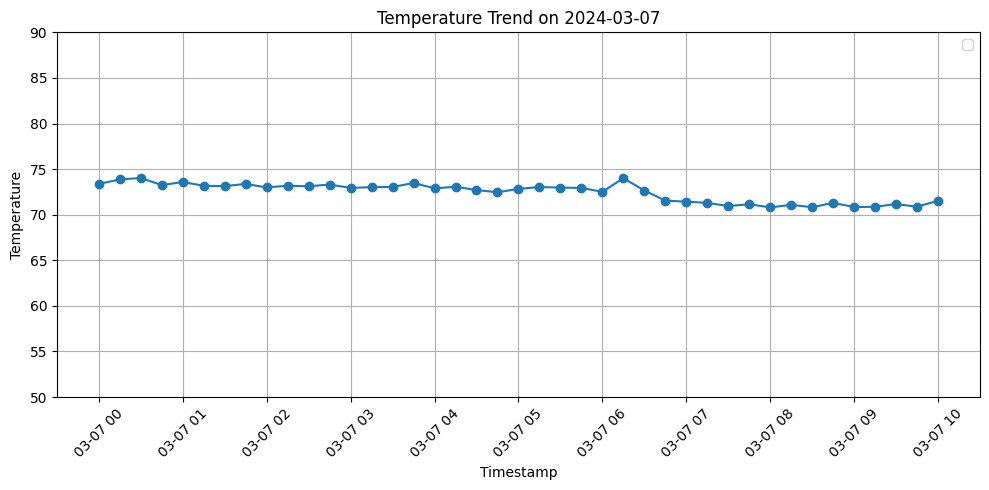

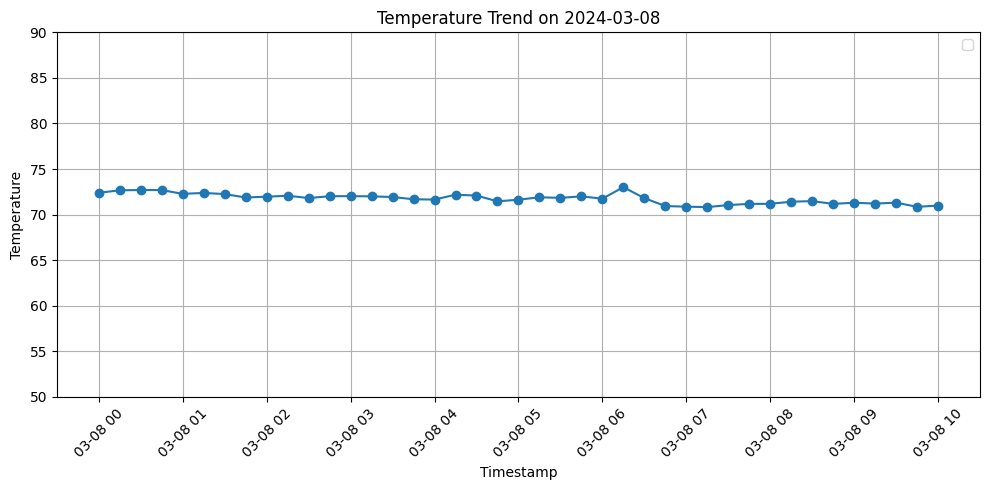

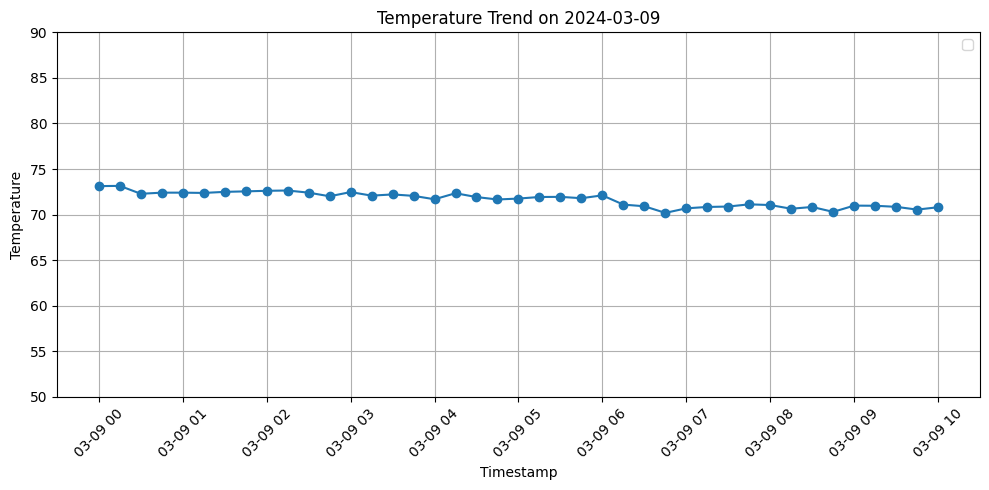

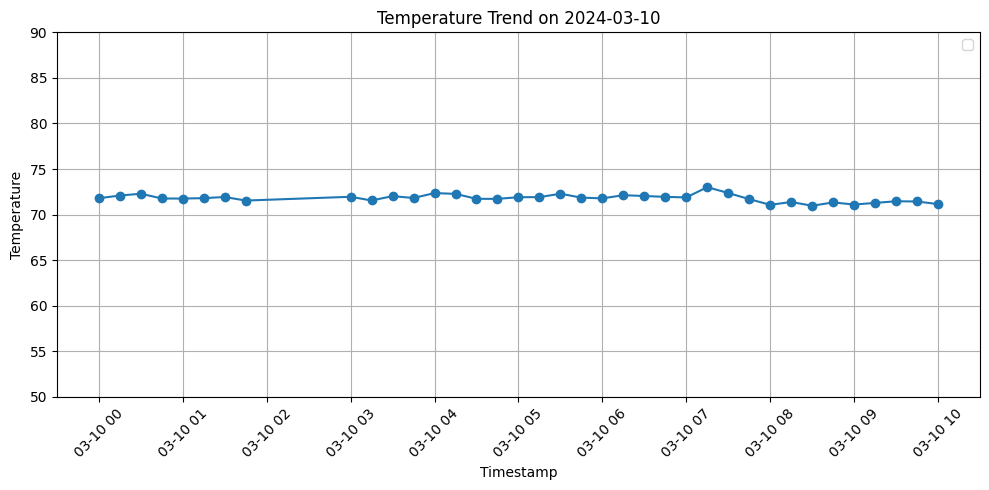

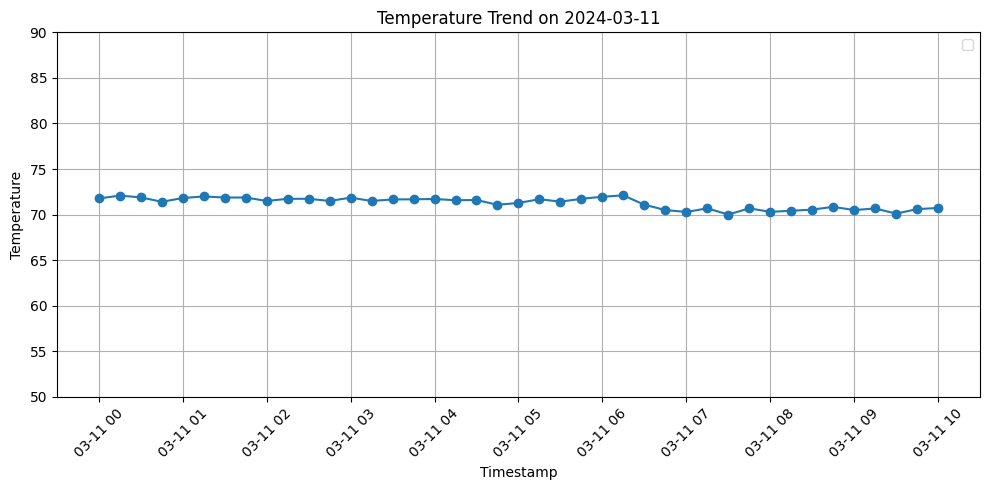

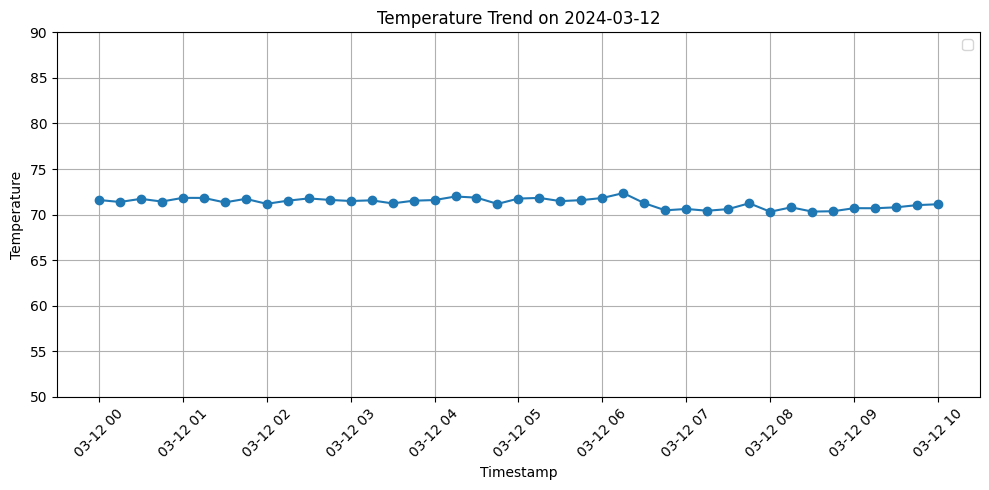

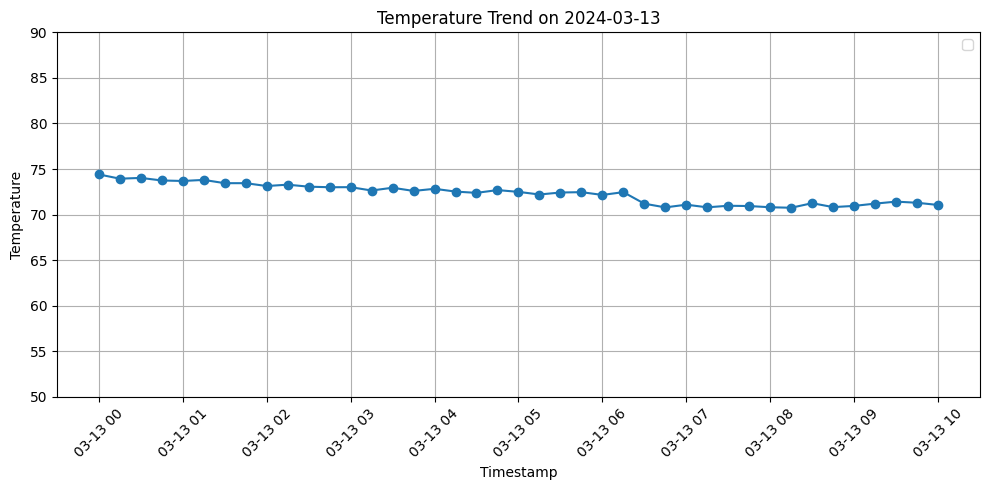

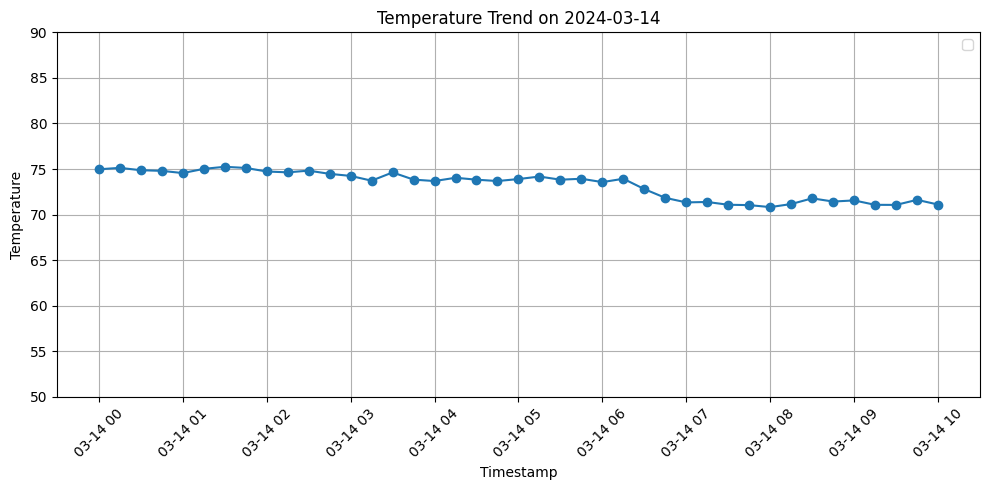

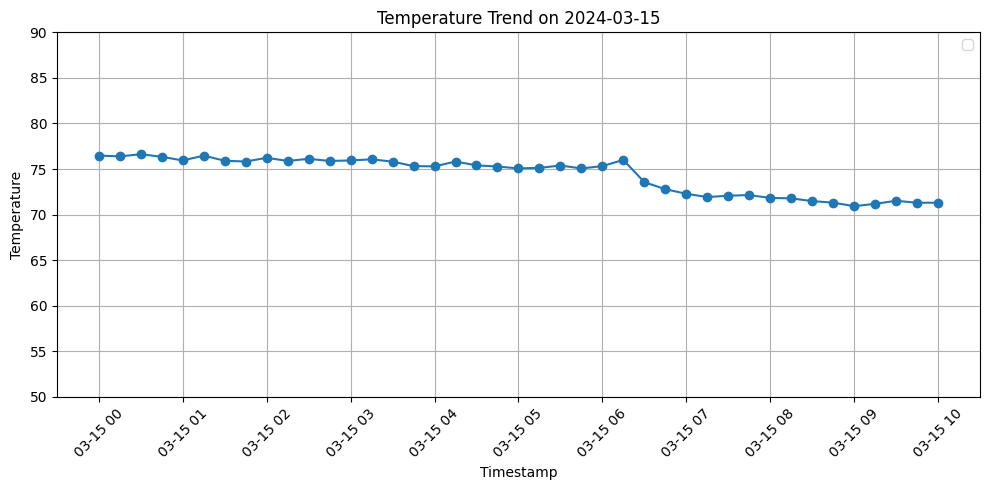

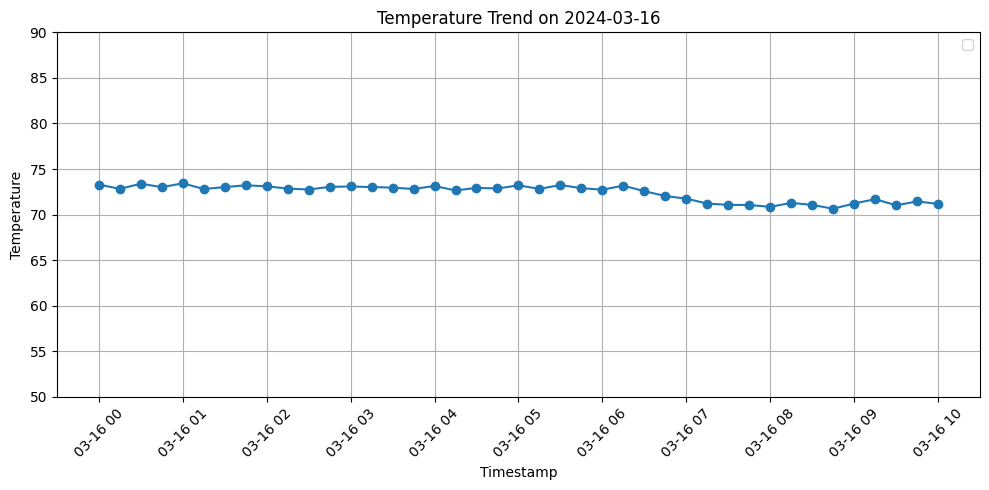

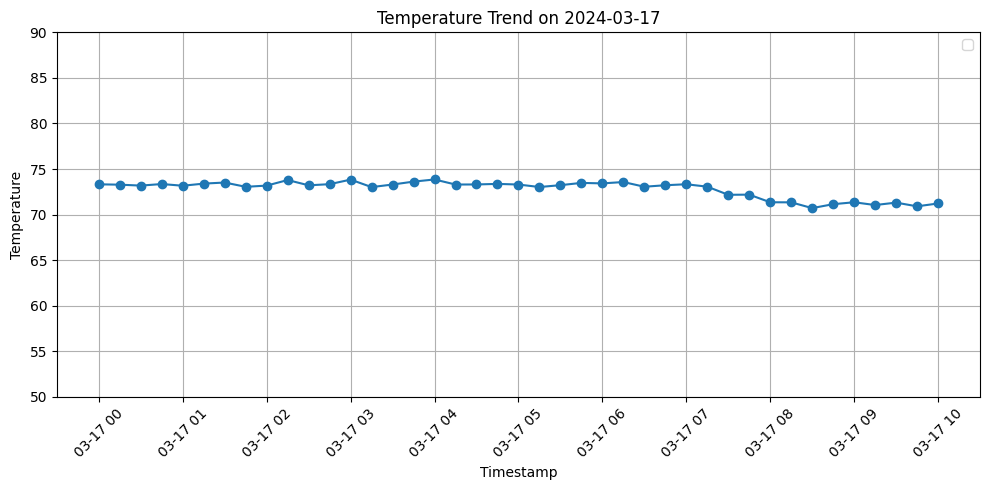

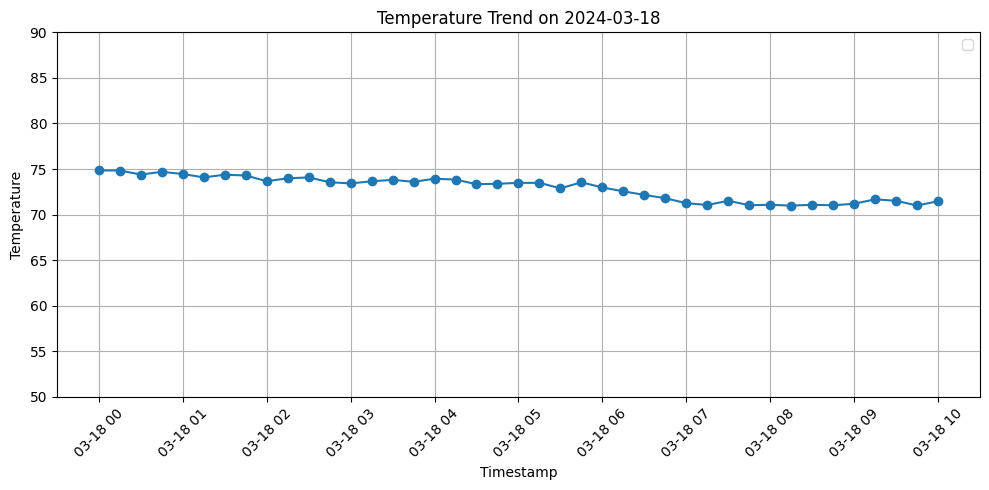

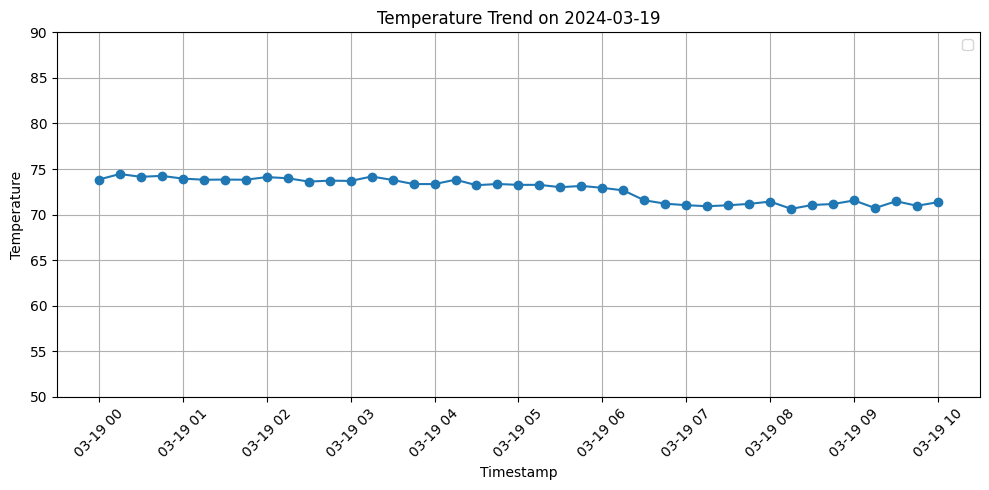

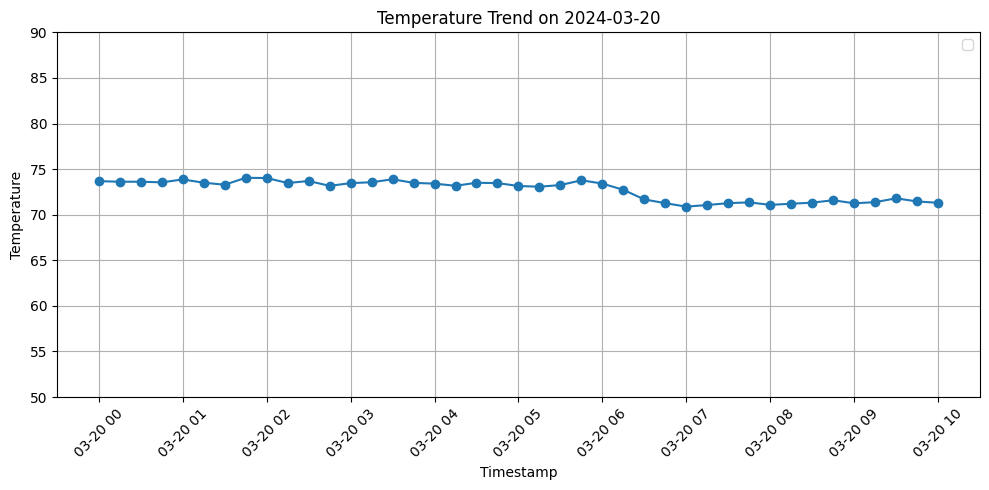

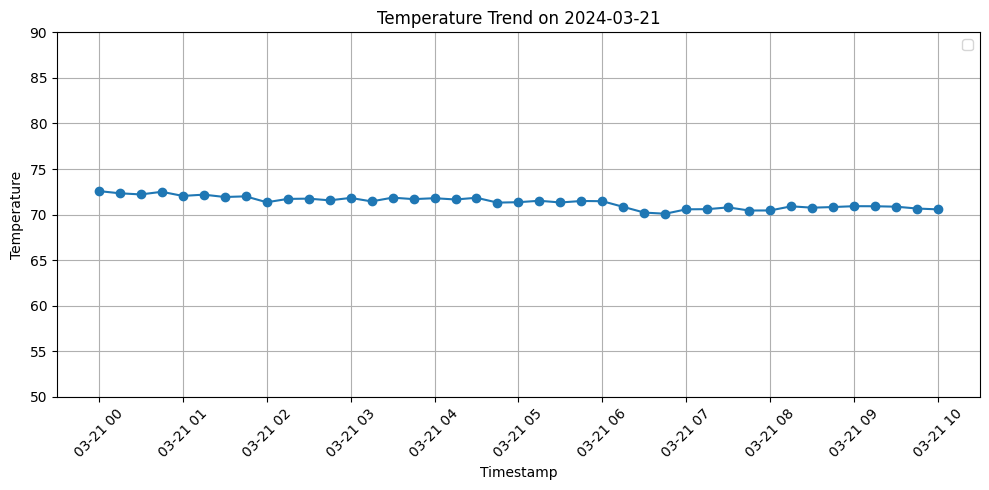

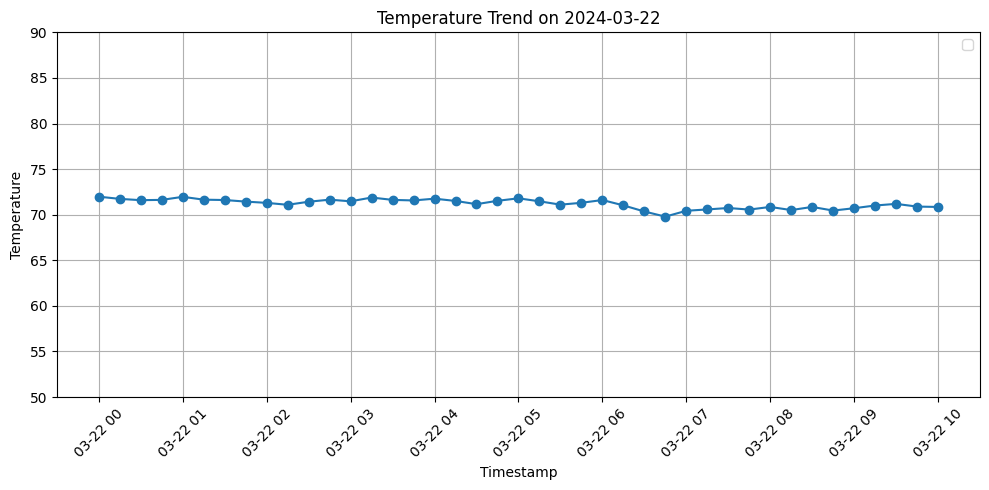

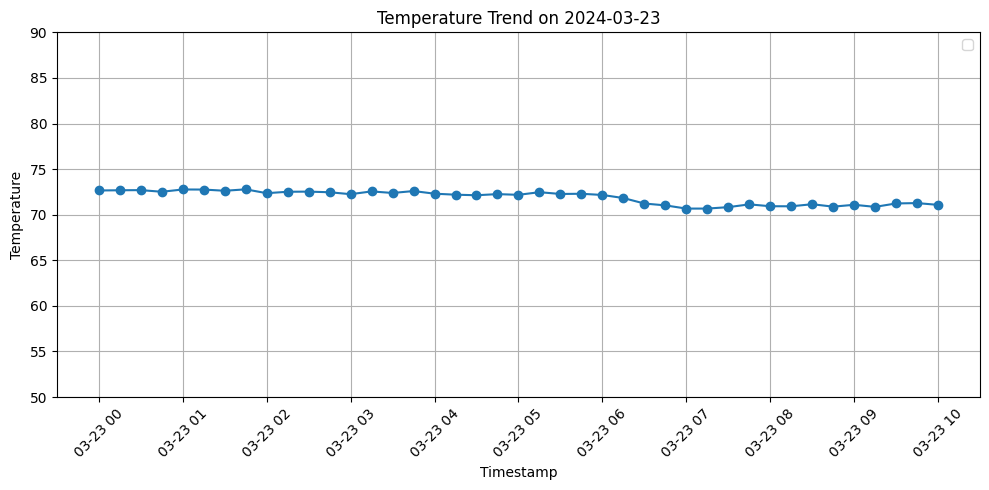

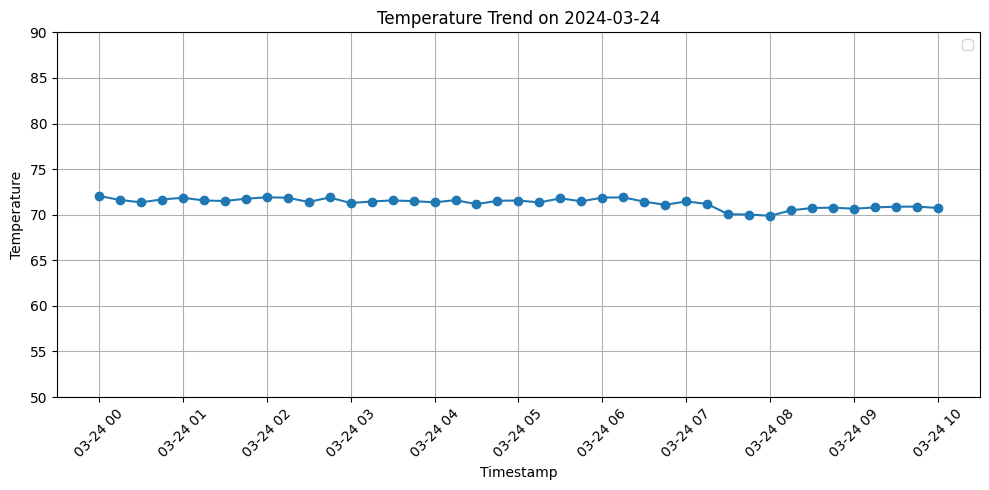

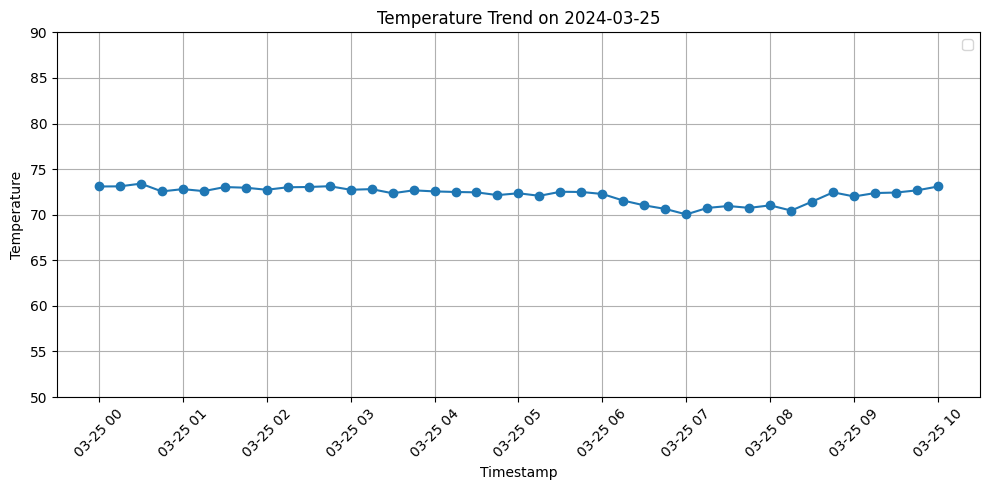

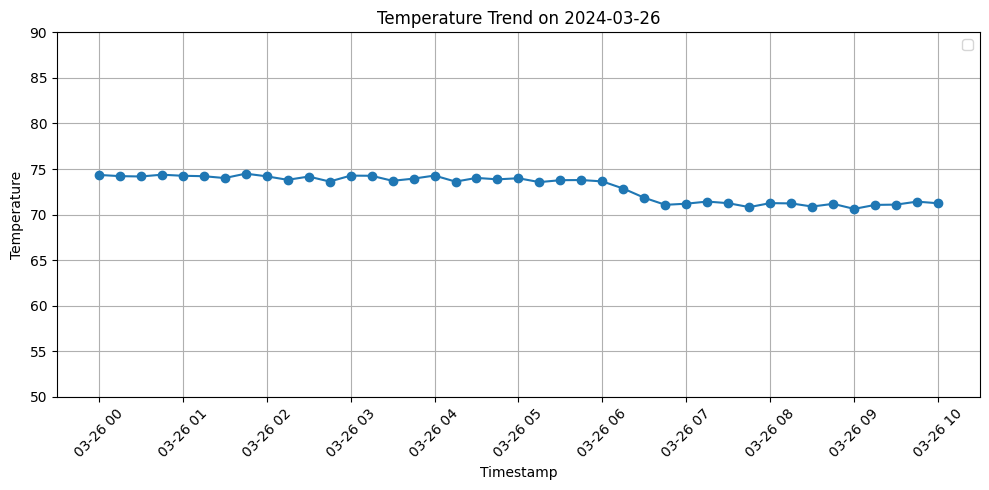

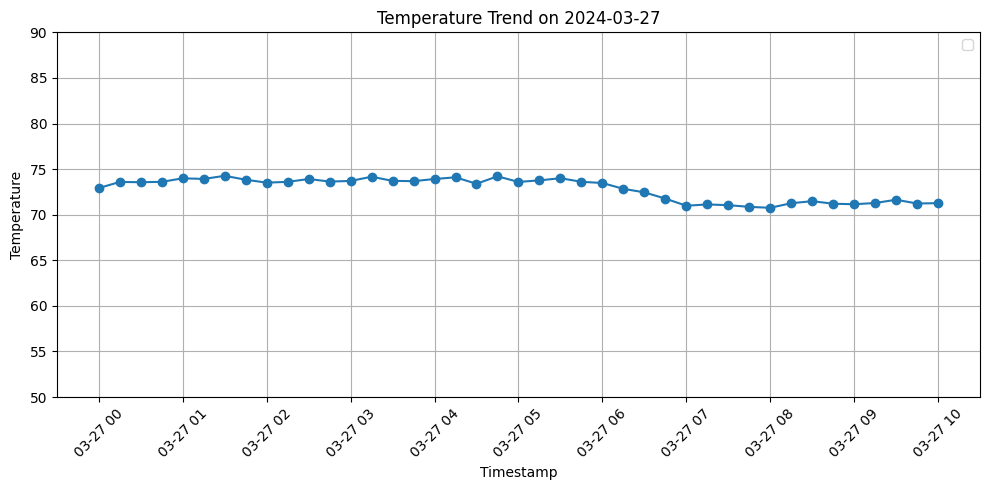

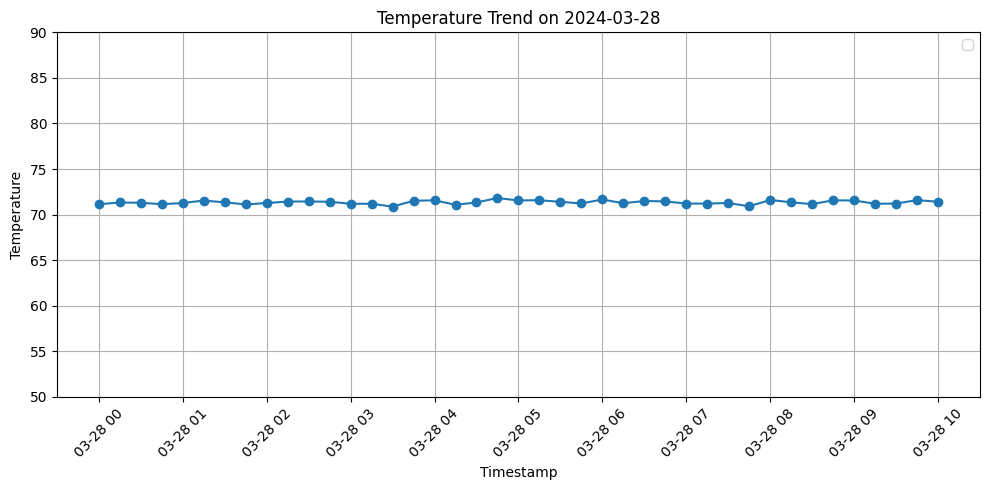

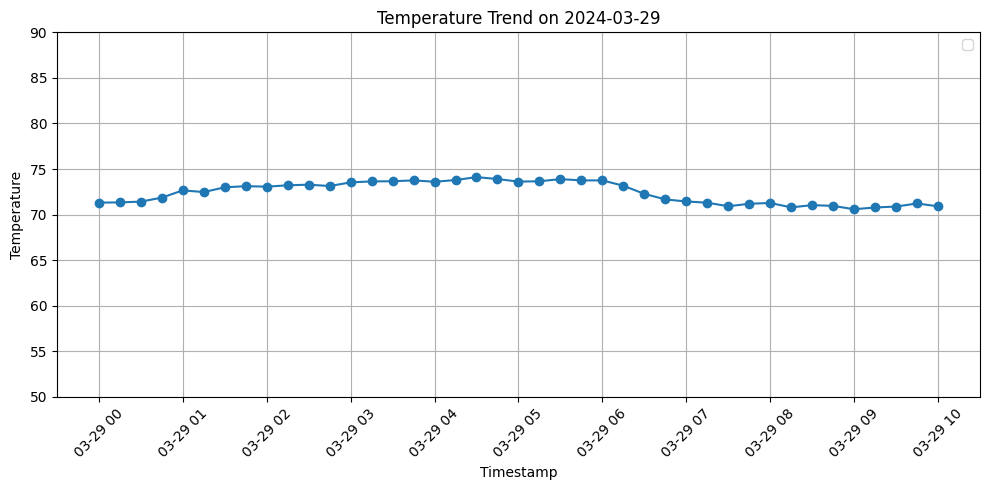

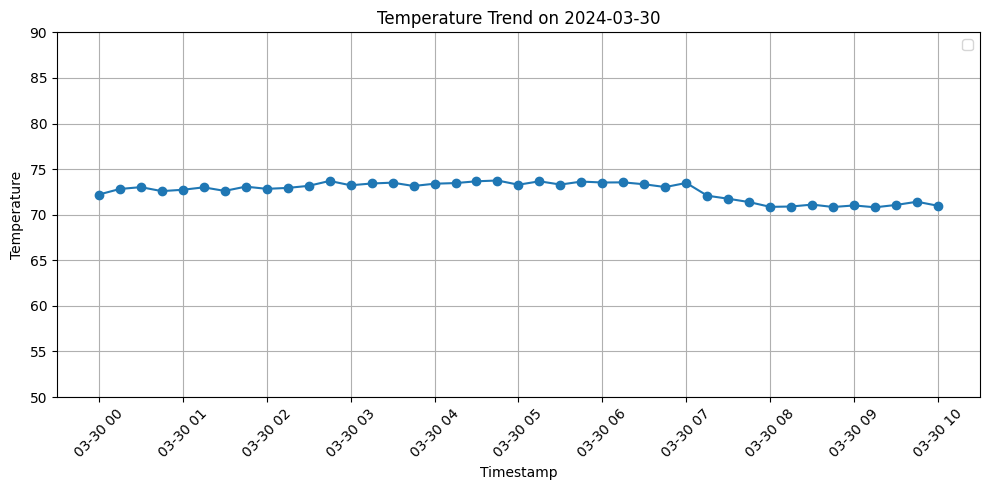

In [15]:
start_date = pd.to_datetime("2023-11-01").date()
end_date = pd.to_datetime("2024-03-30").date()
start_time = "00:00:00"
end_time = "10:00:00"
df_filtered_by_date = filtered_df[
    (filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)
]

for date in pd.date_range(start=start_date, end=end_date).date:
    daily_data  = df_filtered_by_date[(df_filtered_by_date['timestamp'].dt.date == date) & \
                                        (df_filtered_by_date['timestamp'].dt.time >= pd.to_datetime(start_time).time()) & \
                                        (df_filtered_by_date['timestamp'].dt.time <= pd.to_datetime(end_time).time())]
    
    if daily_data.empty:
        continue
    
    # Plotting placeholder
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['timestamp'], daily_data['RmTmp'], marker='o', linestyle='-')
    plt.title(f"Temperature Trend on {date}")
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.ylim(50, 90)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()